In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [19]:
nutrition_drinks = pd.read_csv('starbucks-menu-nutrition-drinks.csv')
nutrition_drinks

Unnamed: 0 Calories Fat (g)  \
0             Cool Lime Starbucks Refreshers™ Beverage       45       0   
1                                     Ombré Pink Drink        -       -   
2                                           Pink Drink        -       -   
3       Strawberry Acai Starbucks Refreshers™ Beverage       80       0   
4    Very Berry Hibiscus Starbucks Refreshers™ Beve...       60       0   
..                                                 ...      ...     ...   
172                                 Chocolate Smoothie      320       5   
173                                Strawberry Smoothie      300       2   
174                                         Ginger Ale        -       -   
175                                          Lemon Ale        -       -   
176                                  Orange Cream Soda        -       -   

    Carb. (g) Fiber (g) Protein Sodium  
0          11         0       0     10  
1           -         -       -      -  
2           -         -       -      -  
3          18         1       0     10  
4          14         1       0     10  
..        ...       ...     ...    ...  
172        53         8      20    170  
173        60         7      16    130  
174         -         -       -      -  
175         -         -       -      -  
176         -         -       -      -  

[177 rows x 7 columns]

In [20]:
nutrition_drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  177 non-null    object
 1   Calories    177 non-null    object
 2   Fat (g)     177 non-null    object
 3   Carb. (g)   177 non-null    object
 4   Fiber (g)   177 non-null    object
 5   Protein     177 non-null    object
 6   Sodium      177 non-null    object
dtypes: object(7)
memory usage: 9.8+ KB


In [21]:
nutrition_drinks.nunique()

Unnamed: 0    154
Calories       30
Fat (g)        15
Carb. (g)      34
Fiber (g)       8
Protein        17
Sodium         25
dtype: int64

In [22]:
nutrition_drinks.describe()

Unnamed: 0 Calories Fat (g) Carb. (g)  \
count                                    177      177     177       177   
unique                                   154       30      15        34   
top     Tazo® Bottled Organic Iced Black Tea        -       -         -   
freq                                       2       85      85        85   

       Fiber (g) Protein Sodium  
count        177     177    177  
unique         8      17     25  
top            -       -      -  
freq          85      85     85

In [24]:
print('Drink name', nutrition_drinks.drink_name.unique())

AttributeError: 'DataFrame' object has no attribute 'drink_name'

### Check for the Duplicates

- drop the duplicates

In [25]:
nutrition_drinks.duplicated().sum()

22

In [26]:
nutrition_drinks.drop_duplicates(inplace=True)

### Dealing with Missing values

In [27]:
nutrition_drinks.isnull().sum()

Unnamed: 0    0
Calories      0
Fat (g)       0
Carb. (g)     0
Fiber (g)     0
Protein       0
Sodium        0
dtype: int64

In [28]:
nutrition_drinks.head(10)

Unnamed: 0 Calories Fat (g)  \
0           Cool Lime Starbucks Refreshers™ Beverage       45       0   
1                                   Ombré Pink Drink        -       -   
2                                         Pink Drink        -       -   
3     Strawberry Acai Starbucks Refreshers™ Beverage       80       0   
4  Very Berry Hibiscus Starbucks Refreshers™ Beve...       60       0   
5                                       Violet Drink        -       -   
6    Evolution Fresh™ Cold-Pressed Apple Berry Juice        -       -   
7                        Evolution Fresh™ Defense Up        -       -   
8            Evolution Fresh™ Organic Ginger Limeade      110       0   
9                                        Iced Coffee        0       0   

  Carb. (g) Fiber (g) Protein Sodium  
0        11         0       0     10  
1         -         -       -      -  
2         -         -       -      -  
3        18         1       0     10  
4        14         1       0     10  
5         -         -       -      -  
6         -         -       -      -  
7         -         -       -      -  
8        28         0       0      5  
9         0         0       0      0

### In numerical columns missing values replaced by mean or meadian of that number

In [13]:
nutrition_drinks['Calories'].replace('-', np.nan, inplace=True)
nutrition_drinks['Calories']     = pd.to_numeric((nutrition_drinks['Calories']))
mean_Calories                    = round(nutrition_drinks['Calories'],0).mean()
nutrition_drinks['Calories'].fillna(mean_Calories, inplace=True)
nutrition_drinks.head(5)

Unnamed: 0    Calories Fat (g)  \
0           Cool Lime Starbucks Refreshers™ Beverage   45.000000       0   
1                                   Ombré Pink Drink  136.866667       -   
2                                         Pink Drink  136.866667       -   
3     Strawberry Acai Starbucks Refreshers™ Beverage   80.000000       0   
4  Very Berry Hibiscus Starbucks Refreshers™ Beve...   60.000000       0   

  Carb. (g) Fiber (g) Protein Sodium  
0        11         0       0     10  
1         -         -       -      -  
2         -         -       -      -  
3        18         1       0     10  
4        14         1       0     10

In [14]:
nutrition_drinks['Fat'].replace('-', np.nan, inplace=True)
nutrition_drinks['Fat']     = pd.to_numeric((nutrition_drinks['Fat']))
mean_Calories                    = round(nutrition_drinks['Fat'],0).mean()
nutrition_drinks['Fat'].fillna(mean_Calories, inplace=True)
nutrition_drinks.head(5)

KeyError: 'Fat'

In [ ]:
numeric_columns = ['Calories','Fat','Carb(g)','Fiber(g)','Protein(g)','Sodium(g)']

for col in numeric_columns:
    nutrition_drinks[col].replace('-', np.nan, inplace=True)
    nutrition_drinks[col] = pd.to_numeric(nutrition_drinks[col])
    mean_value = round(nutrition_drinks[col].mean(), 2)
    nutrition_drinks[col] = nutrition_drinks[col].fillna(mean_value)
nutrition_drinks.head(5)

In [ ]:
numeric_columns = ['Calories', 'Fat', 'Carb(g)', 'Fiber(g)', 'Protein(g)', 'Sodium(g)']

for col in numeric_columns:
    nutrition_drinks[col].replace('-', np.nan, inplace=True)
    nutrition_drinks[col] = pd.to_numeric(nutrition_drinks[col])
    mean_value = round(nutrition_drinks[col].mean())
    nutrition_drinks[col] = nutrition_drinks[col].fillna(mean_value).astype(int)  # Convert to integer after rounding

nutrition_drinks.head(5)


In [ ]:
mode_drink_name = nutrition_drinks.drink_name.dropna().mode()[0]
nutrition_drinks.drink_name.replace(np.nan,mode_drink_name, inplace = True)

### Univariate

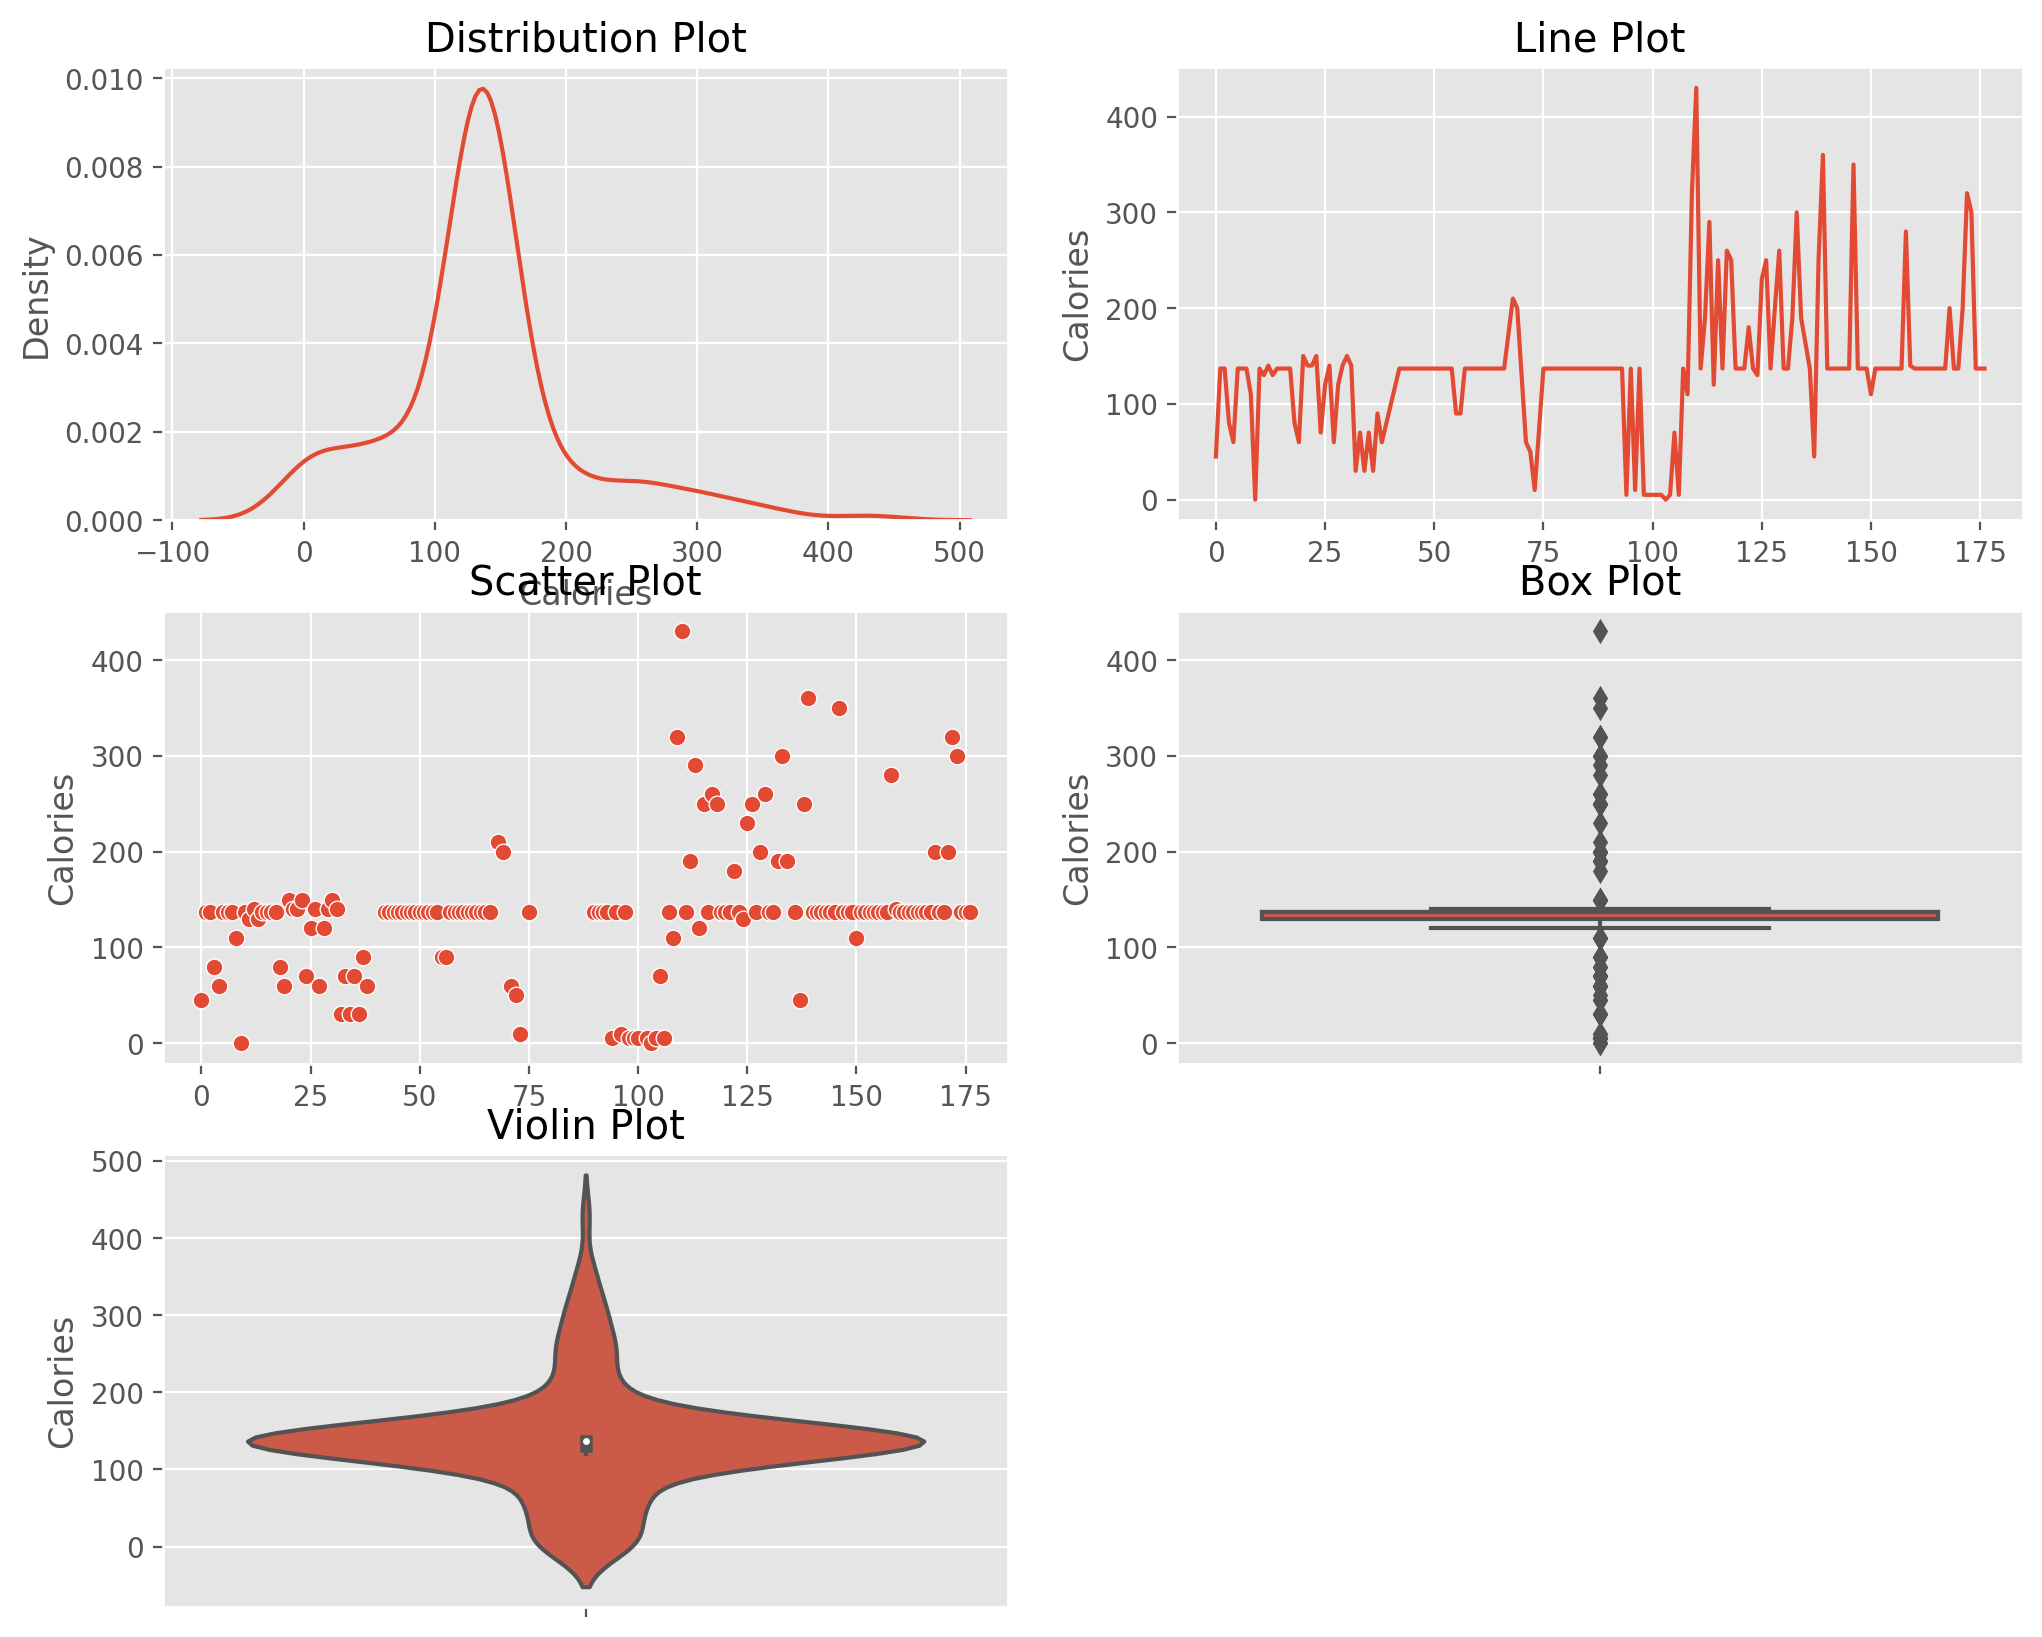

In [15]:

plt.figure(figsize=(12, 10), dpi=200)

# Subplot 1 - Distribution plot
plt.subplot(3, 2, 1)
sns.distplot(nutrition_drinks['Calories'], hist=False)
plt.title('Distribution Plot')

# Subplot 2 - Line plot
plt.subplot(3, 2, 2)
sns.lineplot(data=nutrition_drinks, x=nutrition_drinks.index, y='Calories')
plt.title('Line Plot')

# Subplot 3 - Scatter plot
plt.subplot(3, 2, 3)
sns.scatterplot(data=nutrition_drinks, x=nutrition_drinks.index, y='Calories')
plt.title('Scatter Plot')

# Subplot 4 - Box plot
plt.subplot(3, 2, 4)
sns.boxplot(y=nutrition_drinks['Calories'])
plt.title('Box Plot')

# Subplot 5 - Violin plot
plt.subplot(3, 2, 5)
sns.violinplot(y=nutrition_drinks['Calories'])
plt.title('Violin Plot')


# Show the plots
plt.show()


KeyError: 'Fat'

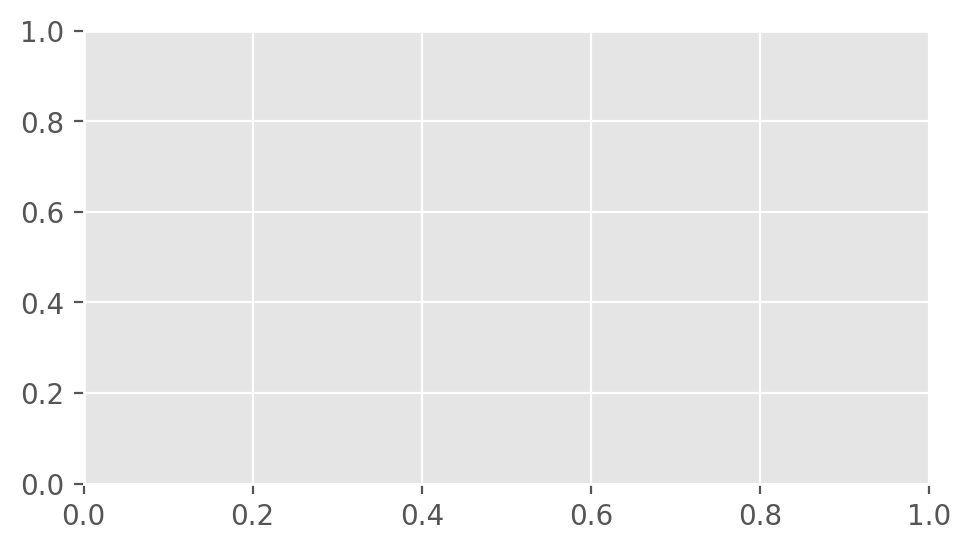

In [16]:
plt.figure(figsize=(12, 10), dpi=200)

# Subplot 1 - Distribution plot
plt.subplot(3, 2, 1)
sns.distplot(nutrition_drinks['Fat'], hist=False)
plt.title('Distribution Plot')

# Subplot 2 - Line plot
plt.subplot(3, 2, 2)
sns.lineplot(data=nutrition_drinks, x=nutrition_drinks.index, y='Fat')
plt.title('Line Plot')


# Subplot 3 - Scatter plot
plt.subplot(3, 2, 3)
sns.scatterplot(data=nutrition_drinks, x=nutrition_drinks.index, y='Fat')
plt.title('Scatter Plot')

# Subplot 4 - Box plot
plt.subplot(3, 2, 4)
sns.boxplot(y=nutrition_drinks['Fat'])
plt.title('Box Plot')


# Subplot 5 - Violin plot
plt.subplot(3, 2, 5)
sns.violinplot(y=nutrition_drinks['Fat'])
plt.title('Violin Plot')


# Show the plots
plt.show()


In [ ]:
plt.figure(figsize=(12, 10), dpi=200)

# Subplot 1 - Distribution plot
plt.subplot(3, 2, 1)
sns.distplot(nutrition_drinks['Carb(g)'], hist=False)
plt.title('Distribution Plot')

# Subplot 2 - Line plot
plt.subplot(3, 2, 2)
sns.lineplot(data=nutrition_drinks, x=nutrition_drinks.index, y='Carb(g)')
plt.title('Line Plot')

# Subplot 3 - Scatter plot
plt.subplot(3, 2, 3)
sns.scatterplot(data=nutrition_drinks, x=nutrition_drinks.index, y='Carb(g)')
plt.title('Scatter Plot')

# Subplot 4 - Box plot
plt.subplot(3, 2, 4)
sns.boxplot(y=nutrition_drinks['Carb(g)'])
plt.title('Box Plot')

# Subplot 5 - Violin plot
plt.subplot(3, 2, 5)
sns.violinplot(y=nutrition_drinks['Carb(g)'])
plt.title('Violin Plot')


# Show the plots
plt.show()


### Bivariate

KeyError: 'Carb(g)'

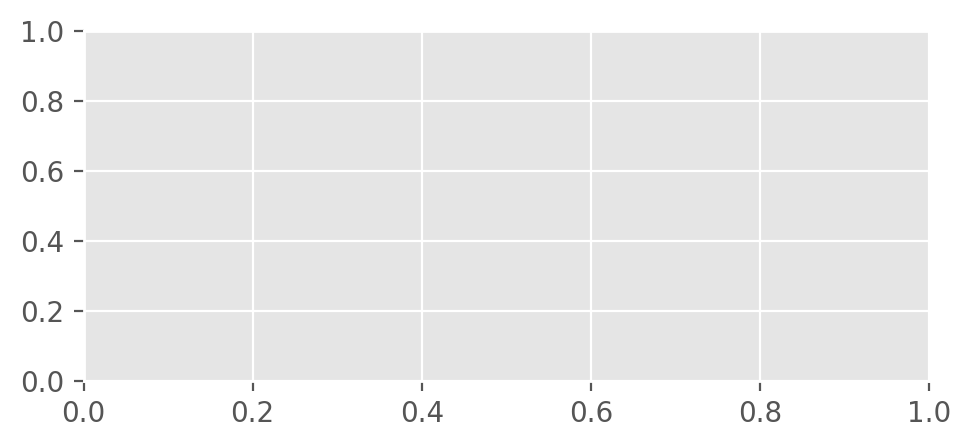

In [17]:
plt.figure(figsize = (12,5), dpi =200)
plt.subplot(2, 2, 1)
sns.lineplot(x=nutrition_drinks['Calories'], y=nutrition_drinks['Carb(g)'])
plt.figure(figsize = (12,5), dpi =200)
plt.subplot(2, 2, 2)
sns.scatterplot(x=nutrition_drinks['Calories'], y=nutrition_drinks['Carb(g)'])

### creating new column

In [106]:
nutrition_drinks['Total_calories'] = (nutrition_drinks['Calories'] +
                                       nutrition_drinks['Fat'] +
                                       nutrition_drinks['Carb(g)'] +
                                       nutrition_drinks['Fiber(g)'] +
                                       nutrition_drinks['Protein(g)'] +
                                       nutrition_drinks['Sodium(g)'])


<Axes: xlabel='Calories', ylabel='Total_calories'>

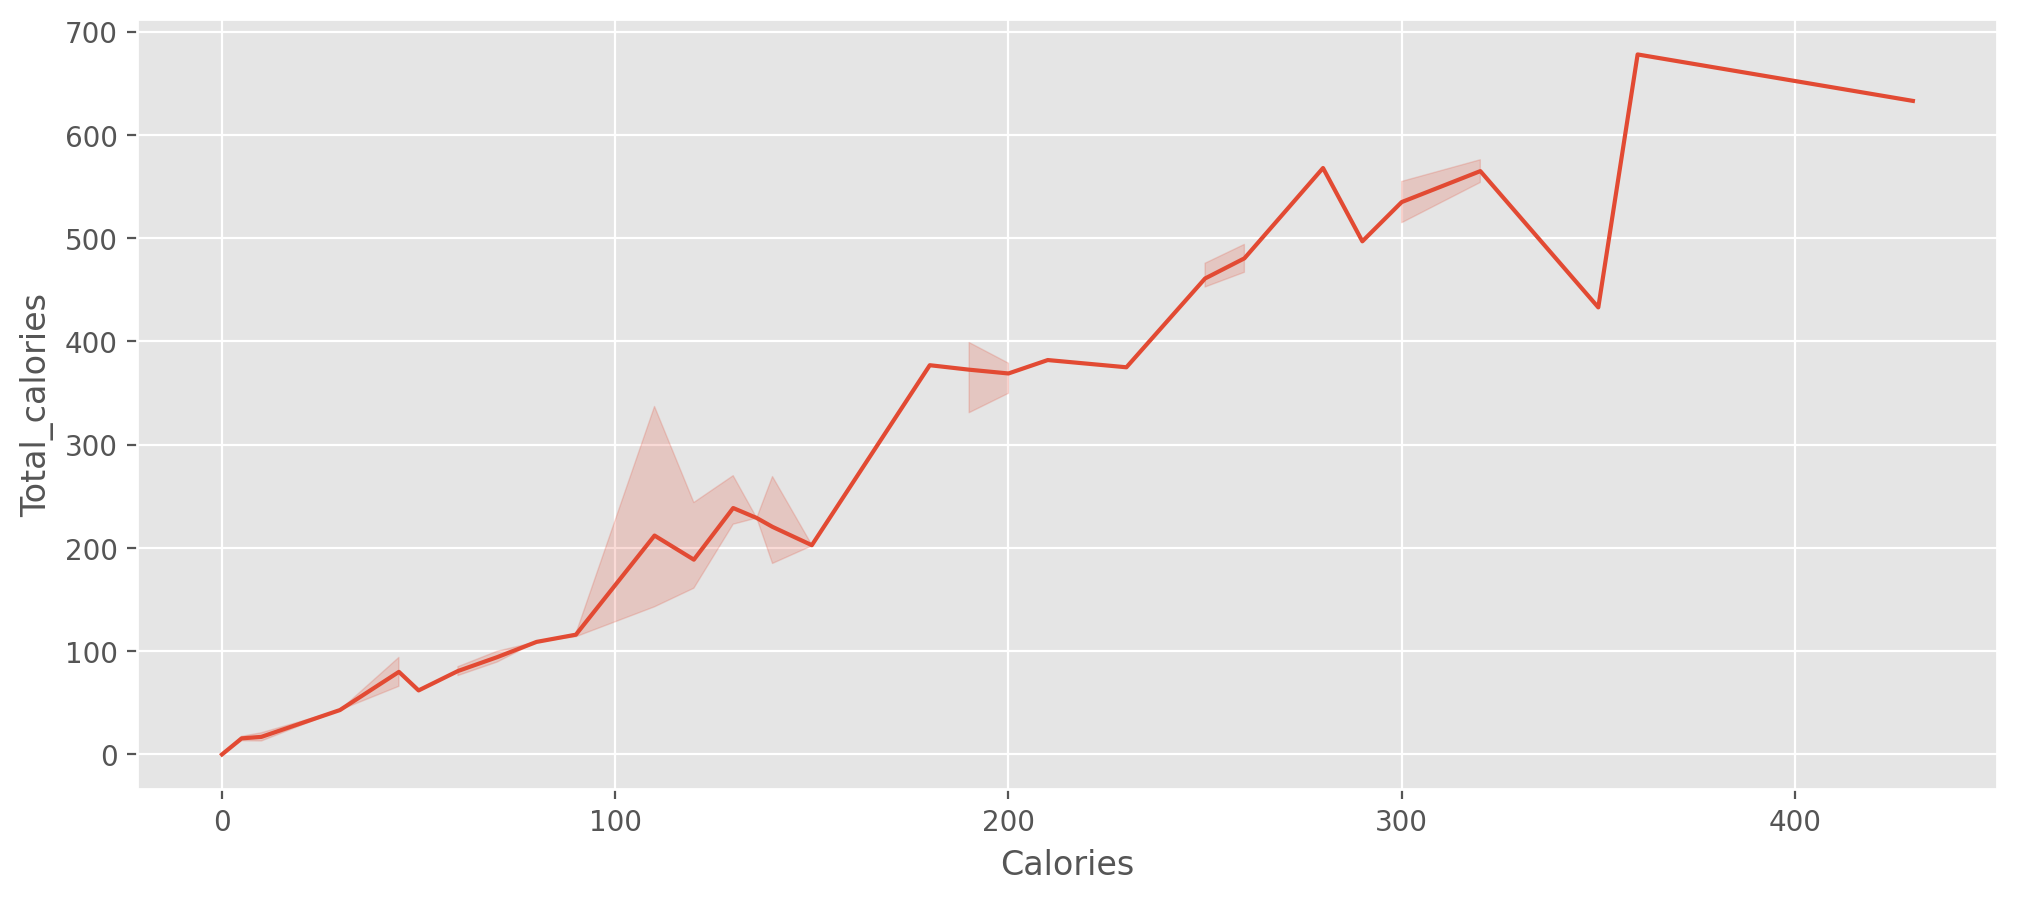

In [107]:
plt.figure(figsize = (12,5), dpi =200)
sns.lineplot(x=nutrition_drinks['Calories'], y=nutrition_drinks['Total_calories'])

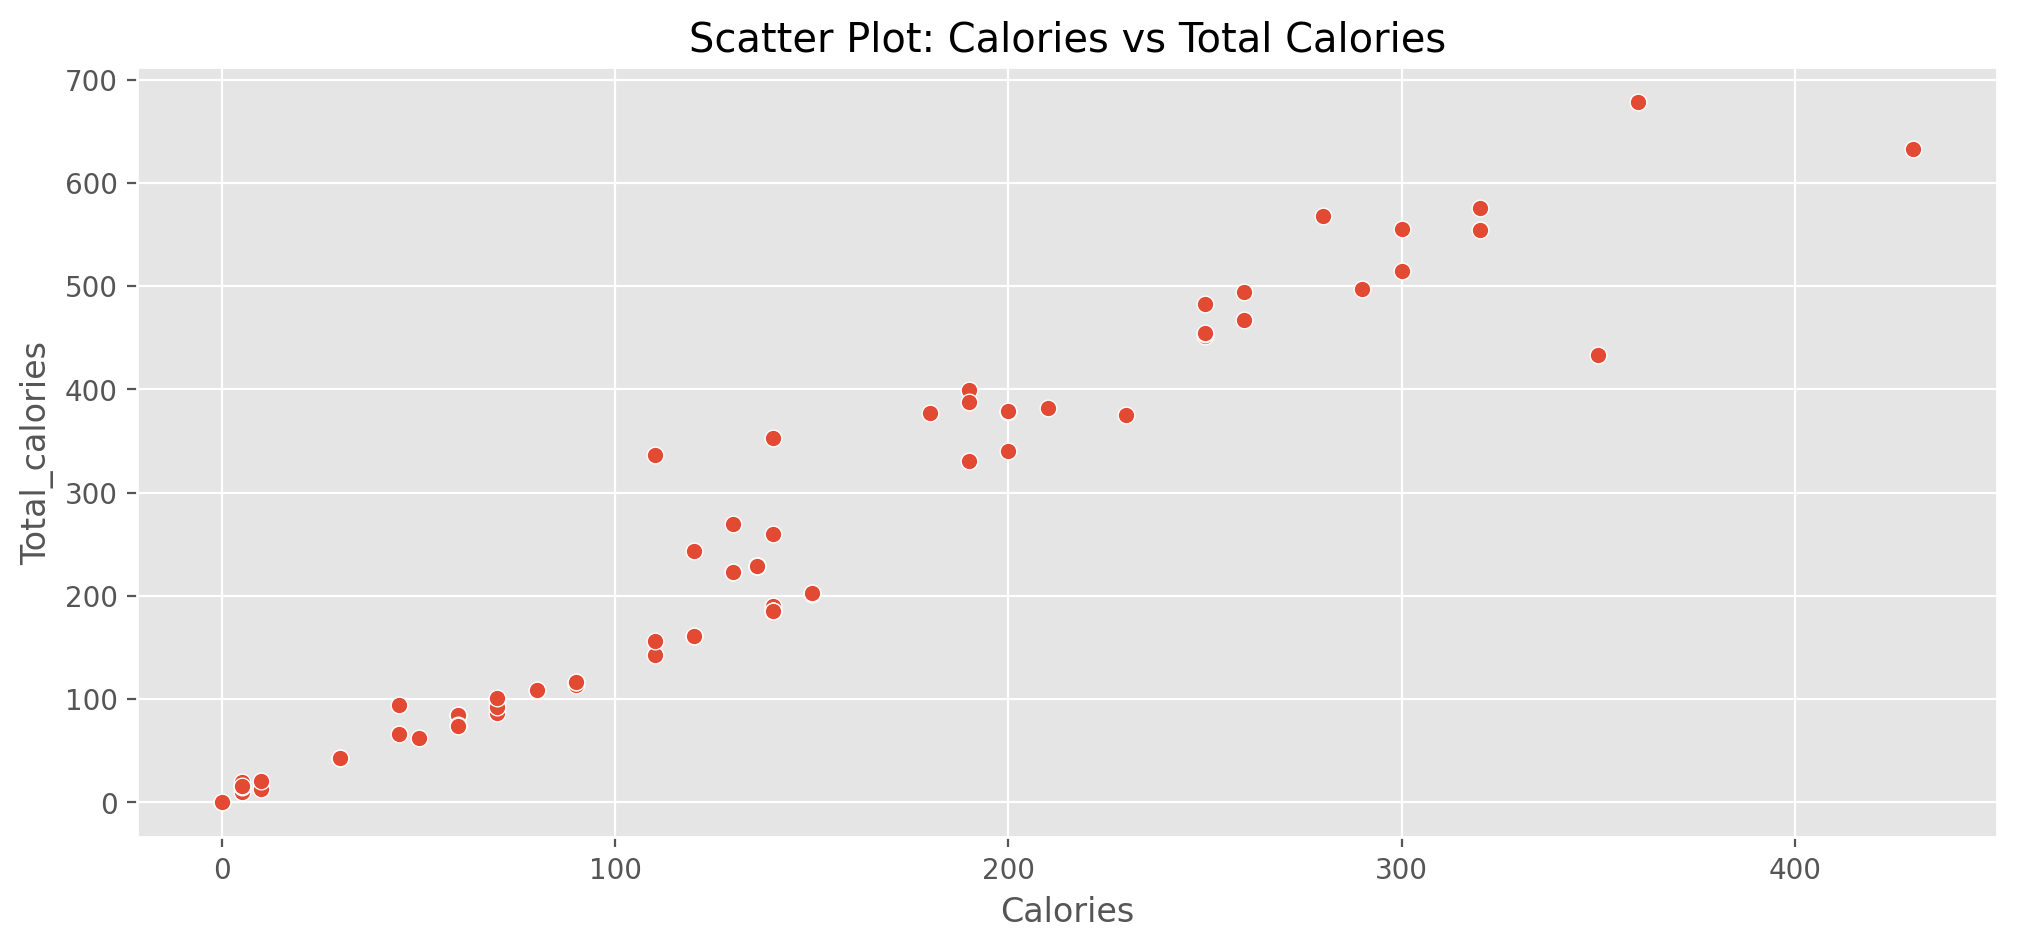

In [108]:
plt.figure(figsize=(12, 5), dpi=200)
sns.scatterplot(x=nutrition_drinks['Calories'], y=nutrition_drinks['Total_calories'])
plt.title('Scatter Plot: Calories vs Total Calories')
plt.show()


<Figure size 2400x1000 with 0 Axes>

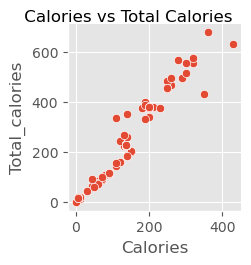

In [109]:
plt.figure(figsize=(12, 5), dpi=200)
sns.pairplot(data=nutrition_drinks, x_vars=['Calories'], y_vars=['Total_calories'])
plt.suptitle(' Calories vs Total Calories', y=1.02)
plt.show()


<Axes: xlabel='Fat', ylabel='Total_calories'>

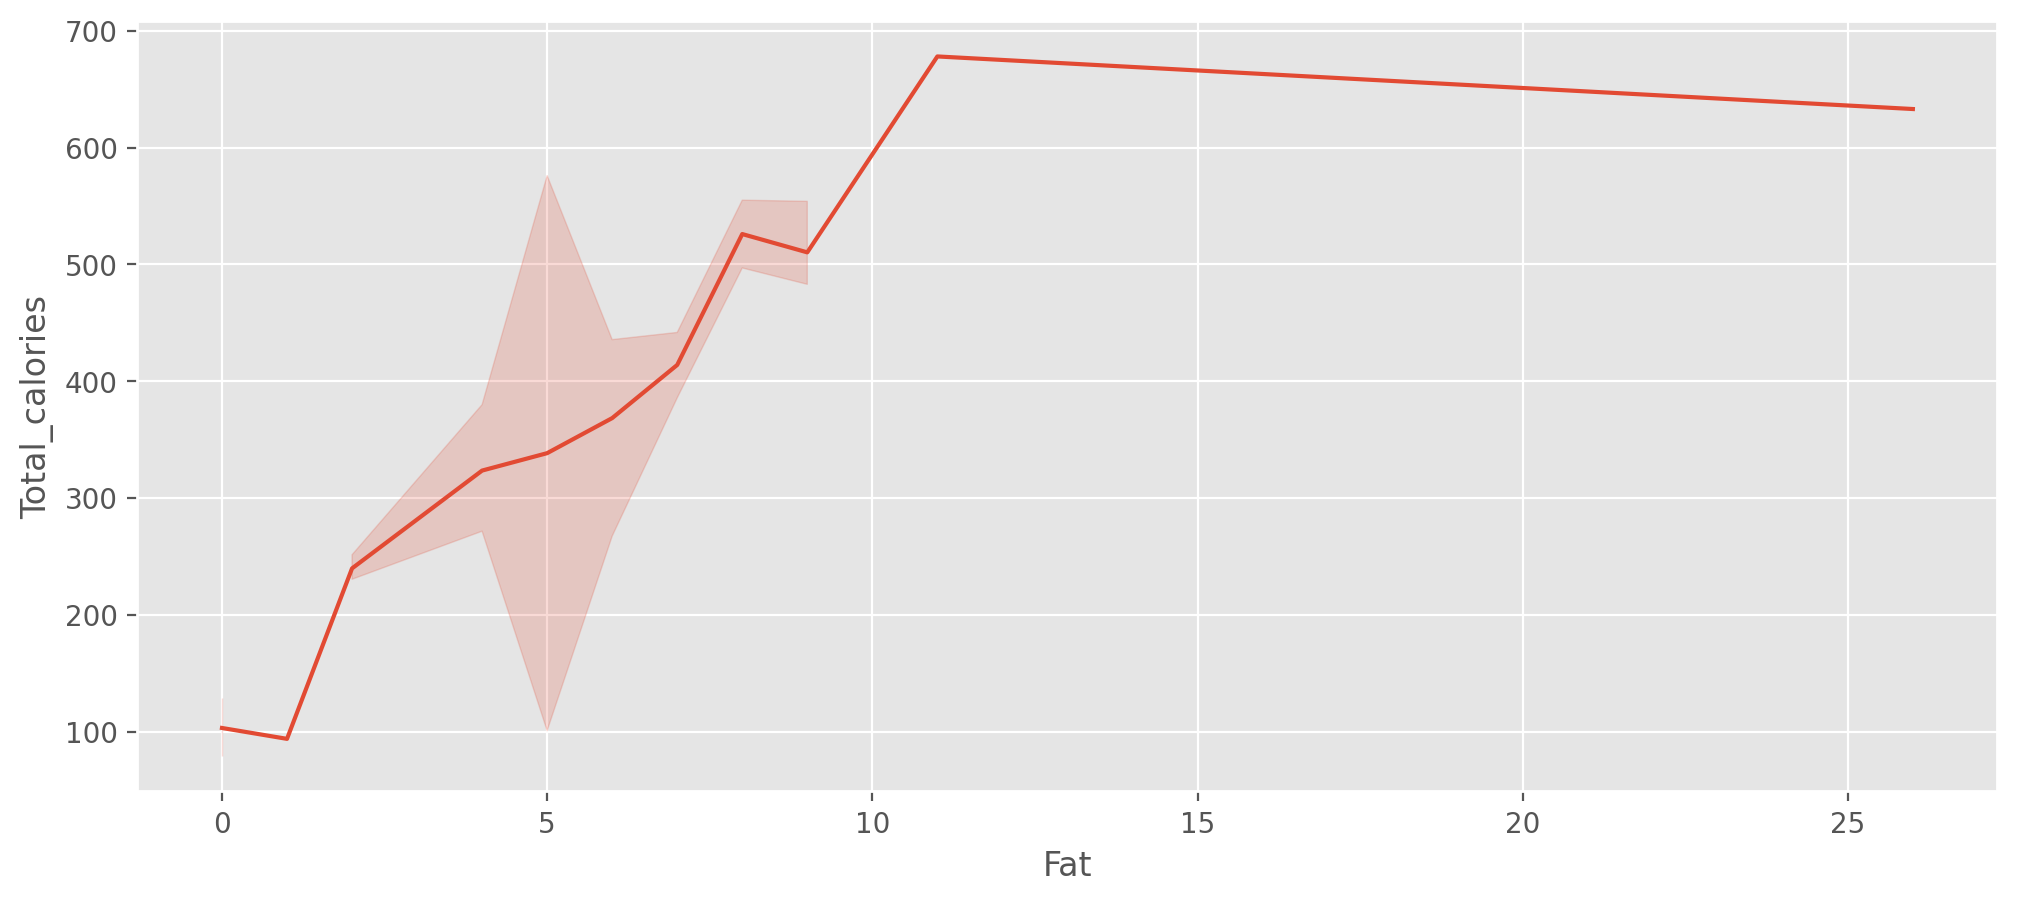

In [110]:
plt.figure(figsize = (12,5), dpi =200)
sns.lineplot(x=nutrition_drinks['Fat'], y=nutrition_drinks['Total_calories'])

<Axes: xlabel='Fat', ylabel='Total_calories'>

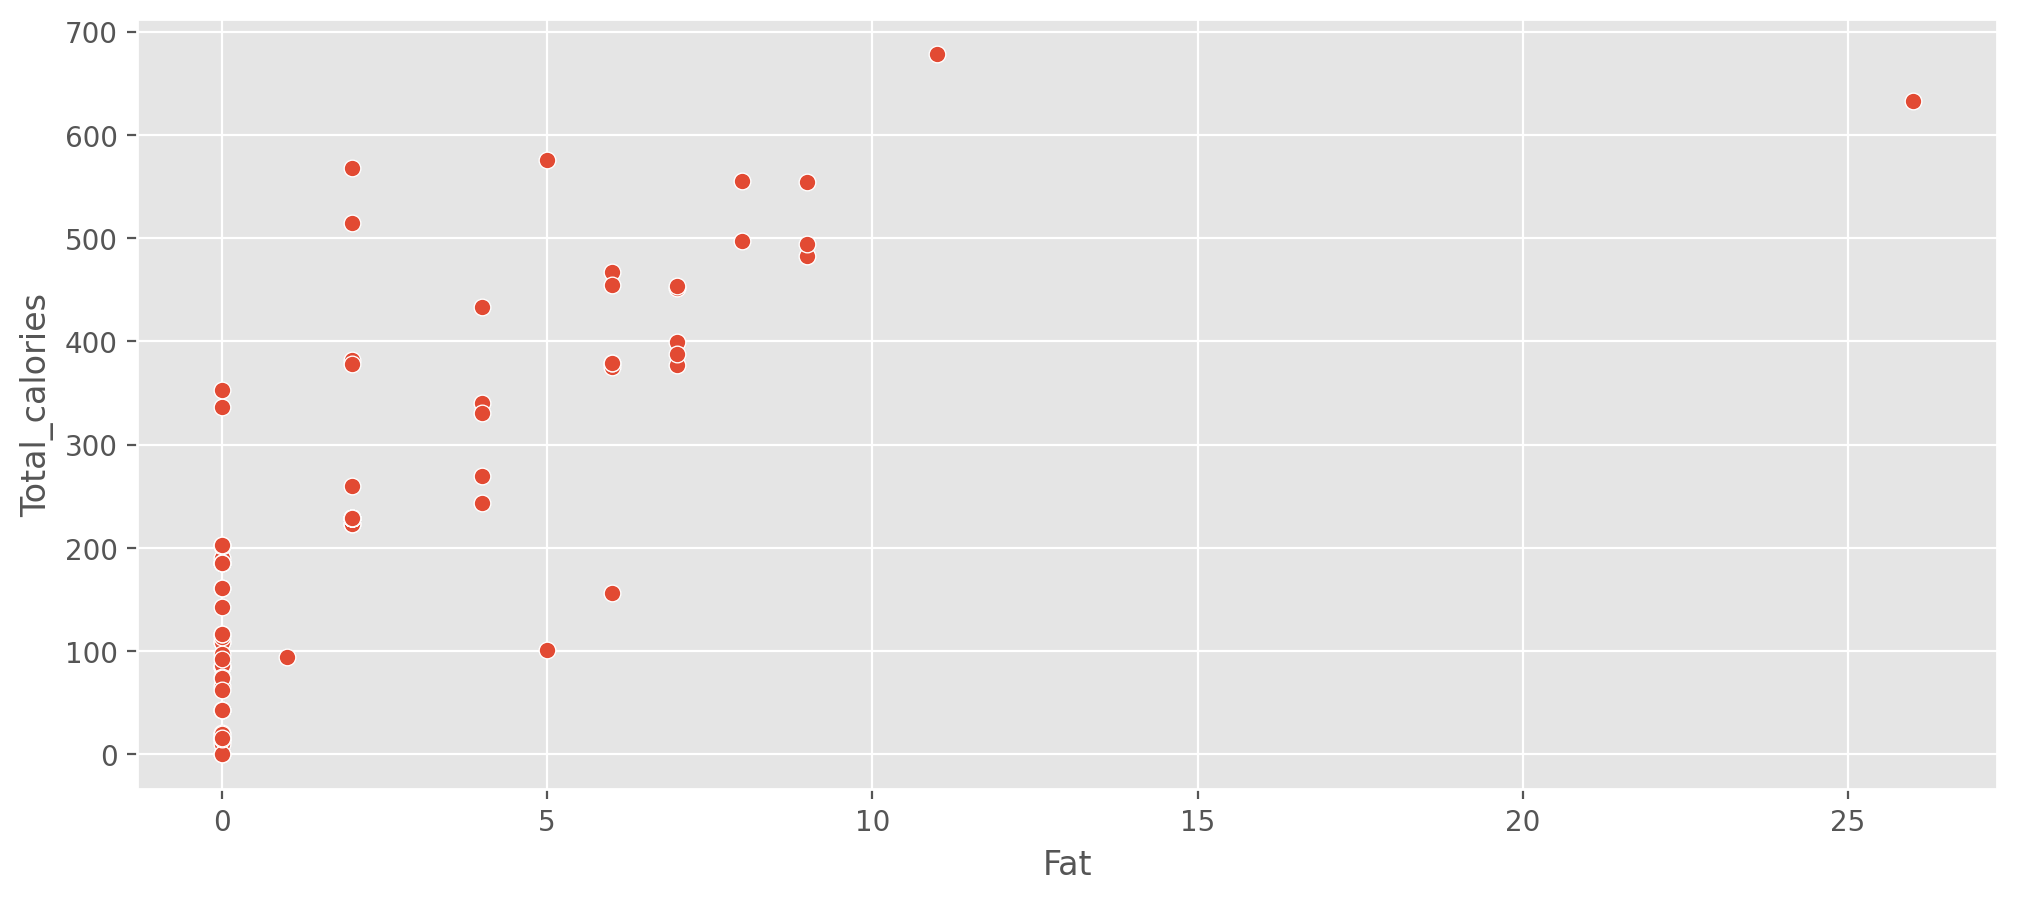

In [111]:
plt.figure(figsize = (12,5), dpi =200)
sns.scatterplot(x=nutrition_drinks['Fat'], y=nutrition_drinks['Total_calories'])

<Axes: xlabel='Fat', ylabel='Total_calories'>

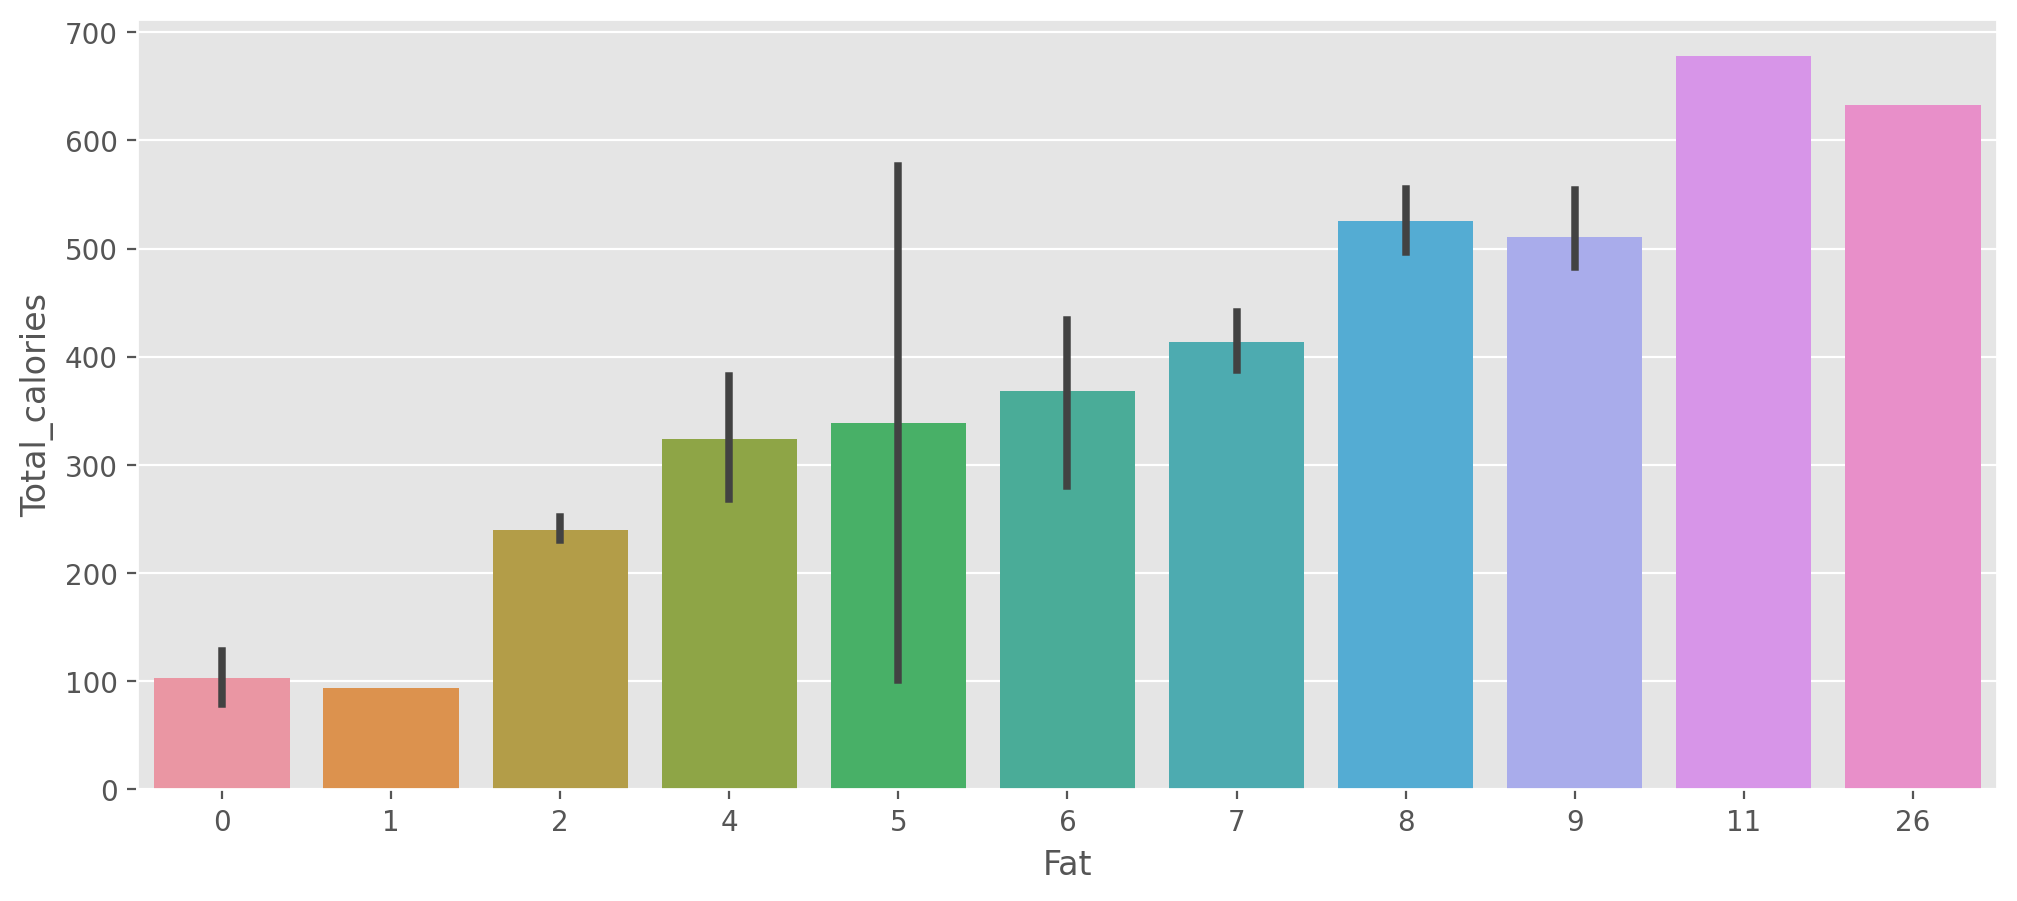

In [112]:
plt.figure(figsize = (12,5), dpi =200)
sns.barplot(x=nutrition_drinks['Fat'], y=nutrition_drinks['Total_calories'])

<Axes: xlabel='Fat', ylabel='Total_calories'>

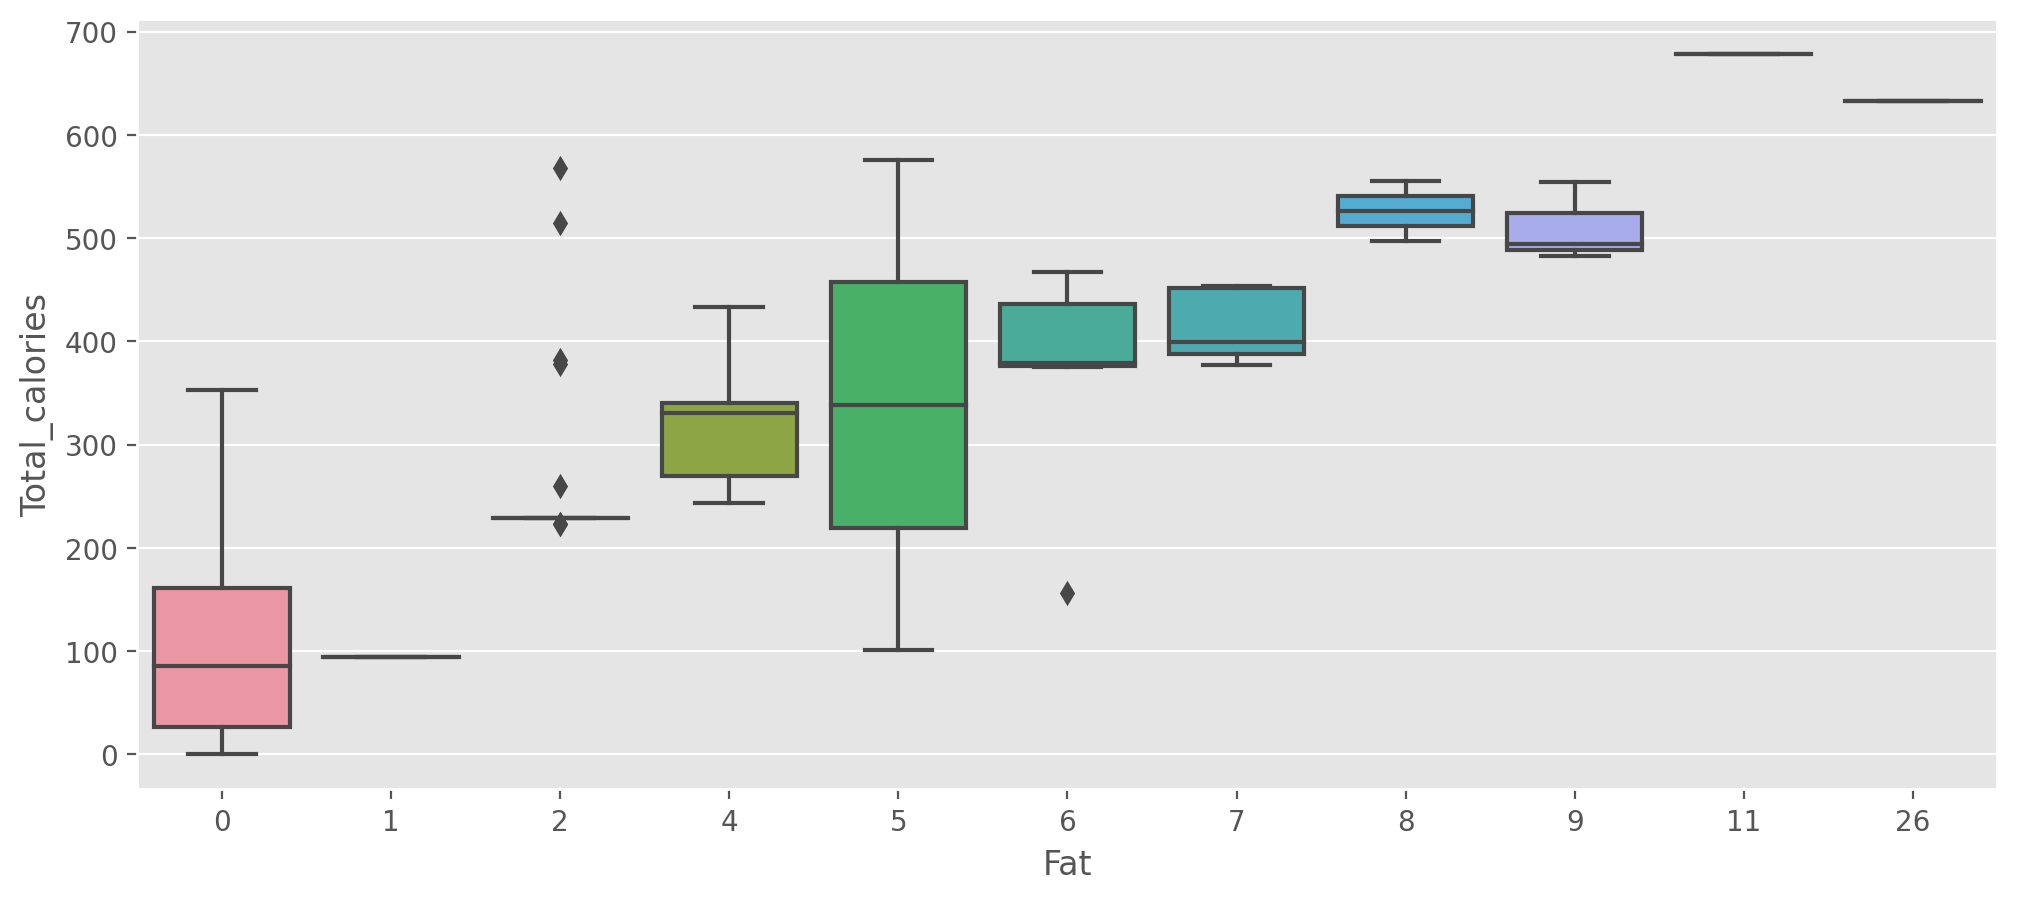

In [113]:
plt.figure(figsize = (12,5), dpi =200)
sns.boxplot(x=nutrition_drinks['Fat'], y=nutrition_drinks['Total_calories'])

In [114]:
nutrition_drinks_extended = pd.read_csv('starbucks_drinkmenu_expanded.csv')
nutrition_drinks_extended

Beverage_category                                      Beverage  \
0                        Coffee                                 Brewed Coffee   
1                        Coffee                                 Brewed Coffee   
2                        Coffee                                 Brewed Coffee   
3                        Coffee                                 Brewed Coffee   
4       Classic Espresso Drinks                                   Caffè Latte   
..                          ...                                           ...   
237  Frappuccino® Blended Crème  Strawberries & Crème (Without Whipped Cream)   
238  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
239  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
240  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
241  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   

          Beverage_prep  Calories  Total Fat (g)  Trans Fat (g)   \
0                 Short         3            0.1             0.0   
1                  Tall         4            0.1             0.0   
2                Grande         5            0.1             0.0   
3                 Venti         5            0.1             0.0   
4     Short Nonfat Milk        70            0.1             0.1   
..                  ...       ...            ...             ...   
237             Soymilk       320            3 2             0.4   
238    Tall Nonfat Milk       170            0.1             0.1   
239          Whole Milk       200            3.5             2.0   
240             Soymilk       180            1.5             0.2   
241  Grande Nonfat Milk       240            0.1             0.1   

     Saturated Fat (g)   Sodium (mg)   Total Carbohydrates (g)   \
0                  0.0             0                          5   
1                  0.0             0                         10   
2                  0.0             0                         10   
3                  0.0             0                         10   
4                  0.0             5                         75   
..                 ...           ...                        ...   
237                0.0             0                        250   
238                0.0             0                        160   
239                0.1            10                        160   
240                0.0             0                        160   
241                0.0             5                        230   

     Cholesterol (mg)   Dietary Fibre (g)   Sugars (g)   Protein (g)   \
0                   0                   0            0            0.3   
1                   0                   0            0            0.5   
2                   0                   0            0            1.0   
3                   0                   0            0            1.0   
4                  10                   0            9            6.0   
..                ...                 ...          ...            ...   
237                67                   1           64            5.0   
238                39                   0           38            4.0   
239                39                   0           38            3.0   
240                37                   1           35            3.0   
241                56                   0           55            5.0   

    Vitamin A (% DV)  Vitamin C (% DV)  Calcium (% DV)  Iron (% DV)   \
0                  0%               0%               0%           0%   
1                  0%               0%               0%           0%   
2                  0%               0%               0%           0%   
3                  0%               0%               2%           0%   
4                 10%               0%              20%           0%   
..                ...              ...              ...          ...   
237                6%               8%

In [115]:
nutrition_drinks_extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [116]:
nutrition_drinks_extended.nunique()

Beverage_category             9
Beverage                     33
Beverage_prep                13
Calories                     48
 Total Fat (g)               24
Trans Fat (g)                18
Saturated Fat (g)             4
 Sodium (mg)                  9
 Total Carbohydrates (g)     51
Cholesterol (mg)             75
 Dietary Fibre (g)            8
 Sugars (g)                  70
 Protein (g)                 26
Vitamin A (% DV)             11
Vitamin C (% DV)             10
 Calcium (% DV)              14
Iron (% DV)                  18
Caffeine (mg)                36
dtype: int64

In [117]:
nutrition_drinks_extended.describe()

Calories  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
count  242.000000      242.000000         242.000000    242.000000   
mean   193.871901        1.307025           0.037603      6.363636   
std    102.863303        1.640259           0.071377      8.630257   
min      0.000000        0.000000           0.000000      0.000000   
25%    120.000000        0.100000           0.000000      0.000000   
50%    185.000000        0.500000           0.000000      5.000000   
75%    260.000000        2.000000           0.100000     10.000000   
max    510.000000        9.000000           0.300000     40.000000   

        Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
count                 242.000000        242.000000          242.000000   
mean                  128.884298         35.991736            0.805785   
std                    82.303223         20.795186            1.445944   
min                     0.000000          0.000000            0.000000   
25%                    70.000000         21.000000            0.000000   
50%                   125.000000         34.000000            0.000000   
75%                   170.000000         50.750000            1.000000   
max                   340.000000         90.000000            8.000000   

        Sugars (g)   Protein (g)   
count   242.000000     242.000000  
mean     32.962810       6.978512  
std      19.730199       4.871659  
min       0.000000       0.000000  
25%      18.000000       3.000000  
50%      32.000000       6.000000  
75%      43.750000      10.000000  
max      84.000000      20.000000

In [118]:
print('Beverage Category', nutrition_drinks_extended.Beverage_category.unique())

Beverage Category ['Coffee' 'Classic Espresso Drinks' 'Signature Espresso Drinks'
 'Tazo® Tea Drinks' 'Shaken Iced Beverages' 'Smoothies'
 'Frappuccino® Blended Coffee' 'Frappuccino® Light Blended Coffee'
 'Frappuccino® Blended Crème']


In [204]:
nutrition_drinks_extended.calories = nutrition_drinks_extended[['Beverage_category','Calories']]
nutrition_drinks_extended.calories.columns = ['DrinkMenu', 'Calories']
nutrition_drinks_extended.calories

DrinkMenu  Calories
0                        Coffee         3
1                        Coffee         4
2                        Coffee         5
3                        Coffee         5
4       Classic Espresso Drinks        70
..                          ...       ...
237  Frappuccino® Blended Crème       320
238  Frappuccino® Blended Crème       170
239  Frappuccino® Blended Crème       200
240  Frappuccino® Blended Crème       180
241  Frappuccino® Blended Crème       240

[242 rows x 2 columns]

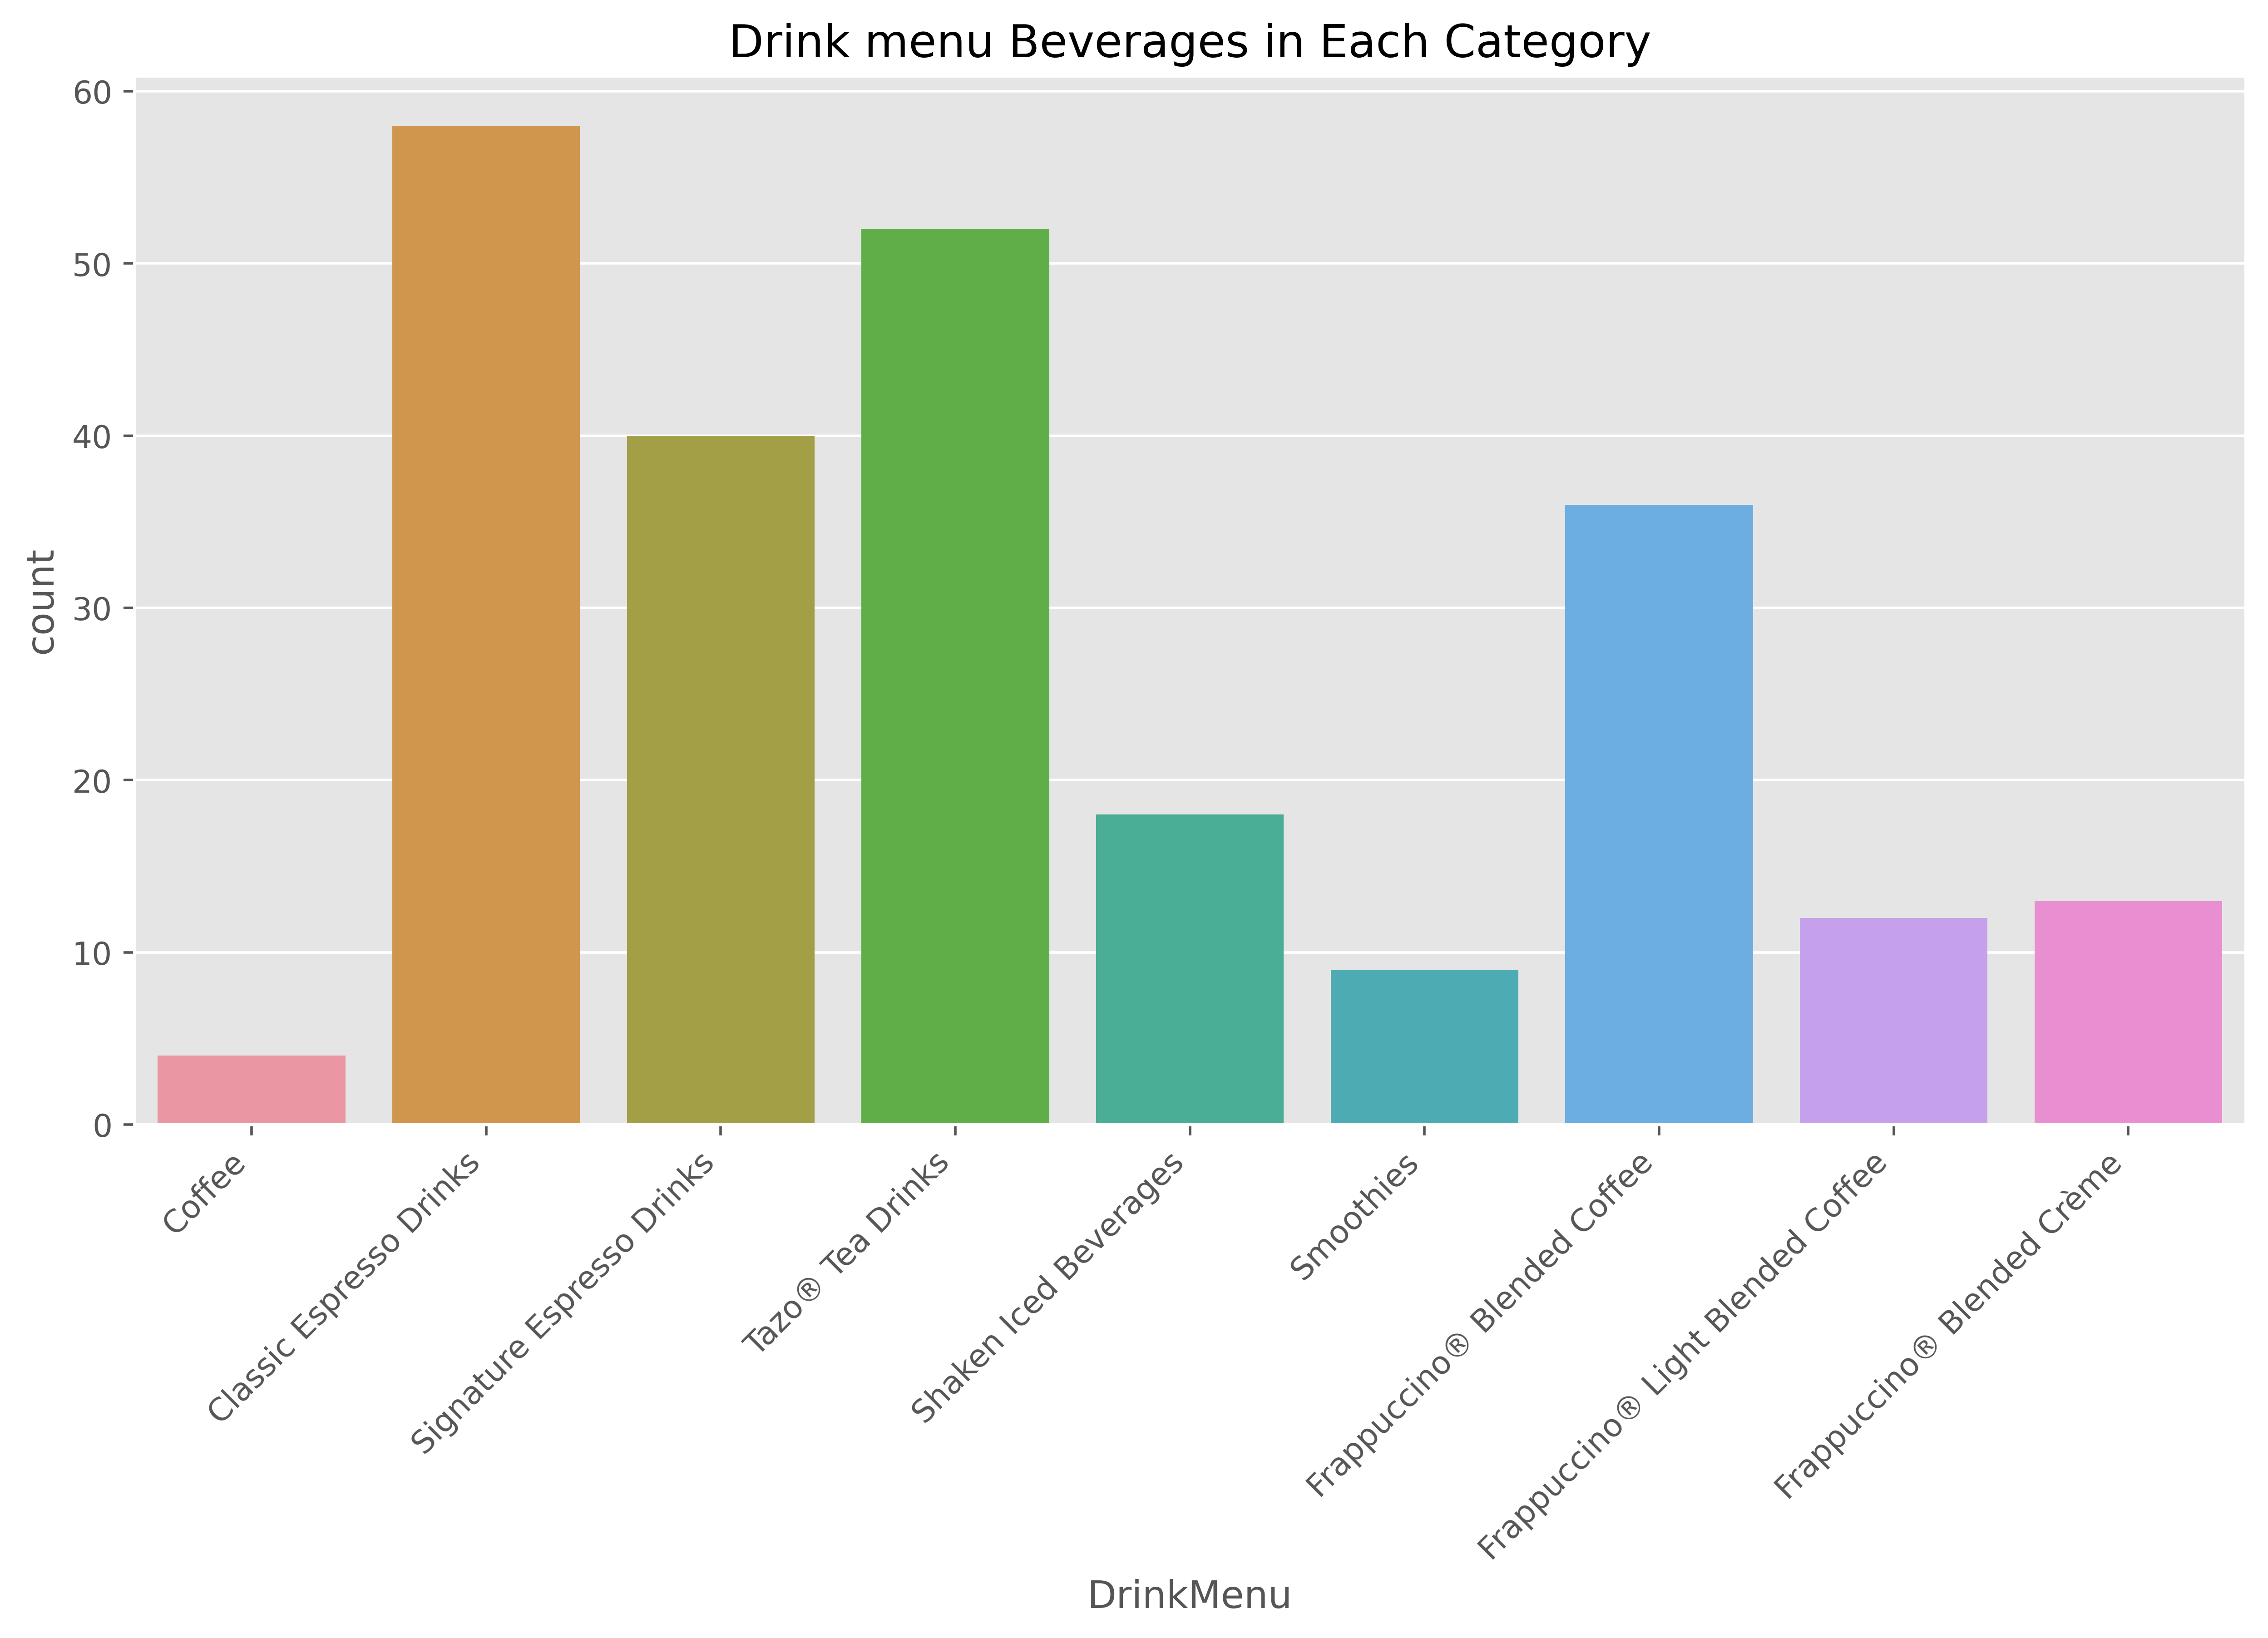

In [207]:
plt.figure(figsize = (12,6), dpi =500)
sns.countplot(x='DrinkMenu', data=nutrition_drinks_extended.calories)
plt.xticks(rotation=45, ha='right')
plt.title('Drink menu Beverages in Each Category')
plt.show()


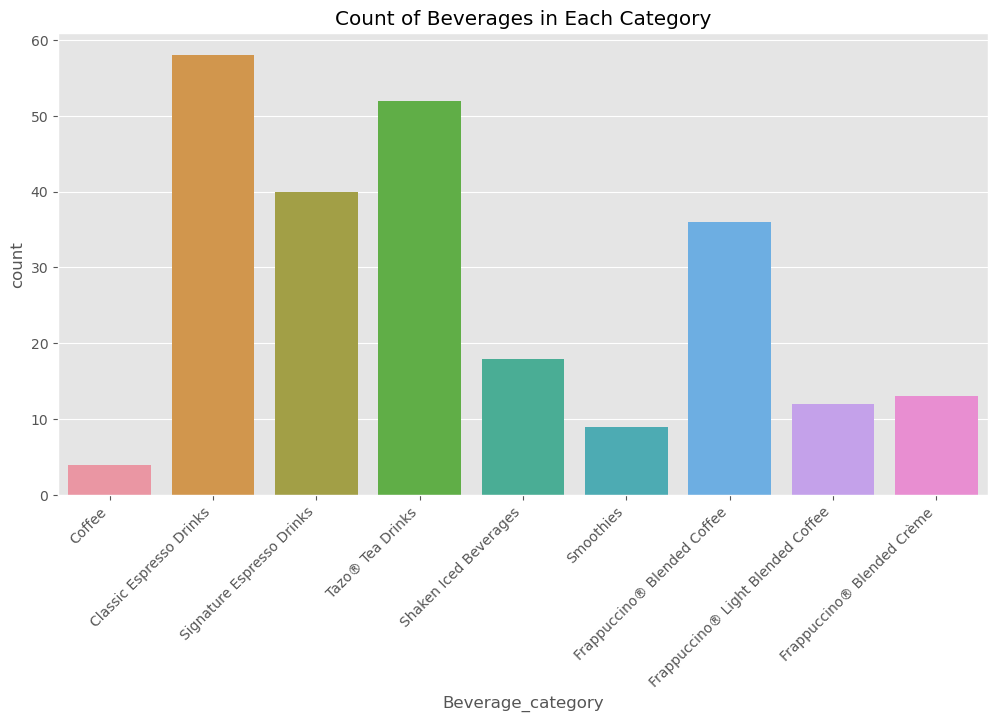

In [119]:
plt.figure(figsize=(12, 6))
sns.countplot(x=nutrition_drinks_extended['Beverage_category'], data=nutrition_drinks_extended)
plt.xticks(rotation=45, ha='right')
plt.title('Count of Beverages in Each Category')
plt.show()


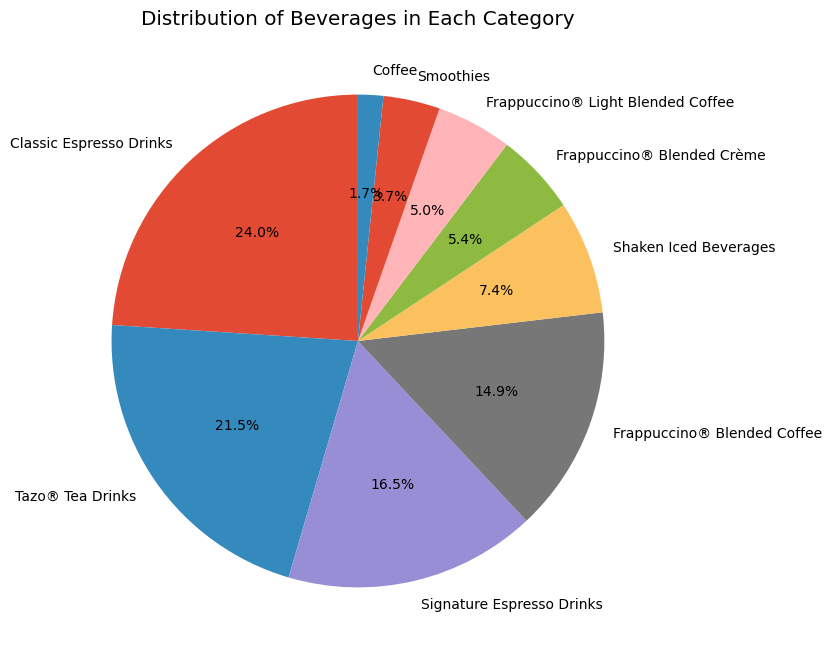

In [120]:
plt.figure(figsize=(8, 8))
category_counts = nutrition_drinks_extended['Beverage_category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Beverages in Each Category')
plt.show()


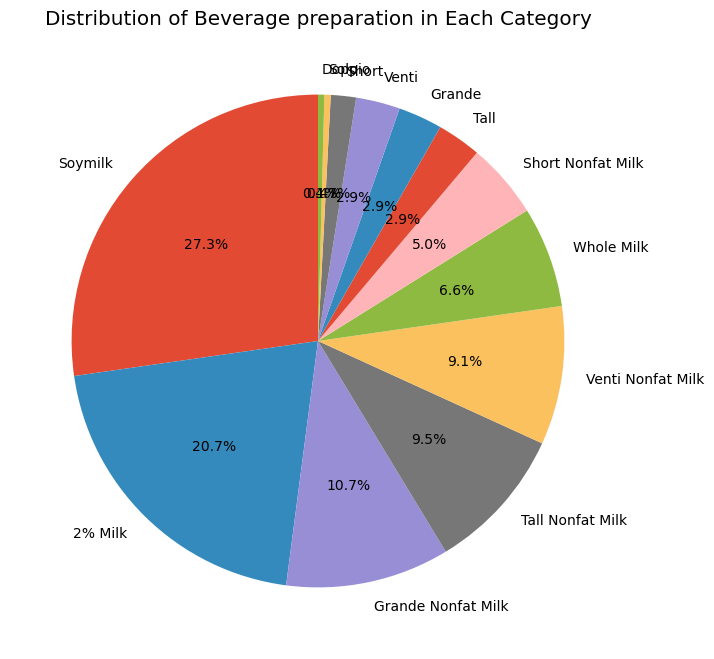

In [121]:
plt.figure(figsize=(8, 8))
category_counts = nutrition_drinks_extended['Beverage_prep'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Beverage preparation in Each Category')
plt.show()


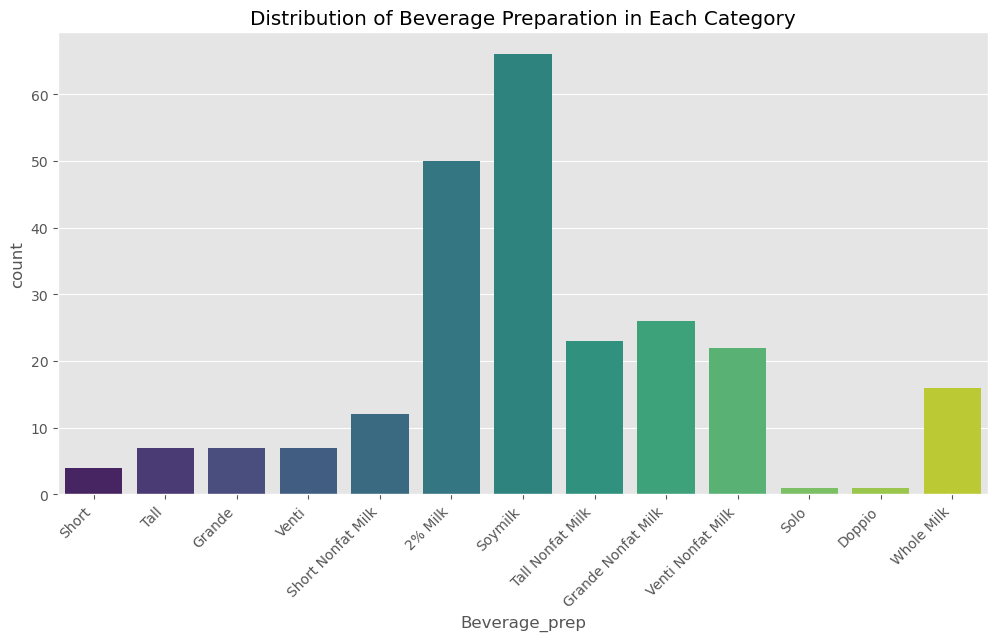

In [122]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Beverage_prep', data=nutrition_drinks_extended, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Beverage Preparation in Each Category')
plt.show()


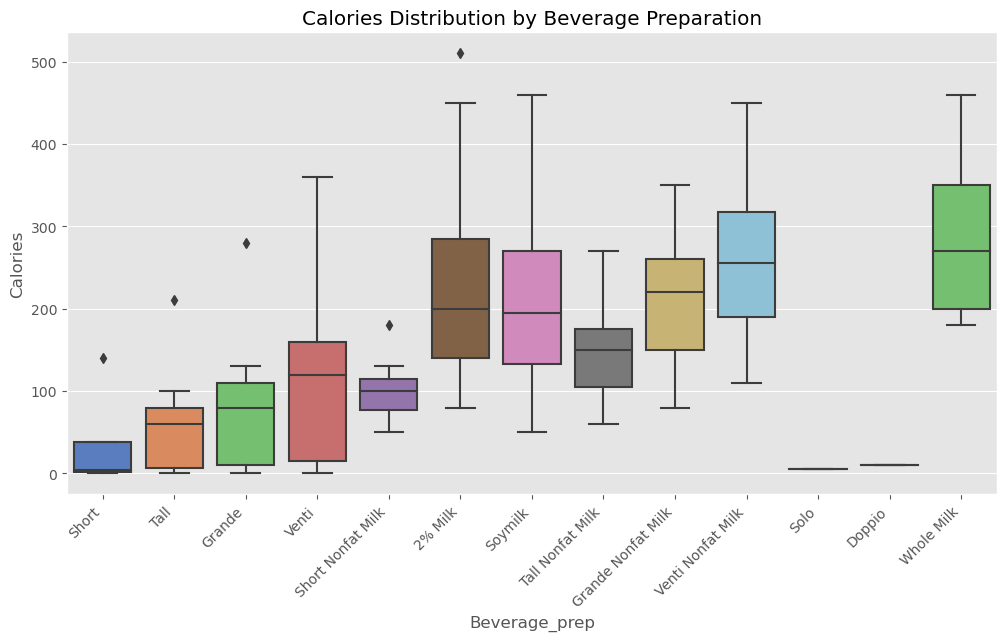

In [123]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Beverage_prep', y='Calories', data=nutrition_drinks_extended, palette='muted')
plt.xticks(rotation=45, ha='right')
plt.title('Calories Distribution by Beverage Preparation')
plt.show()


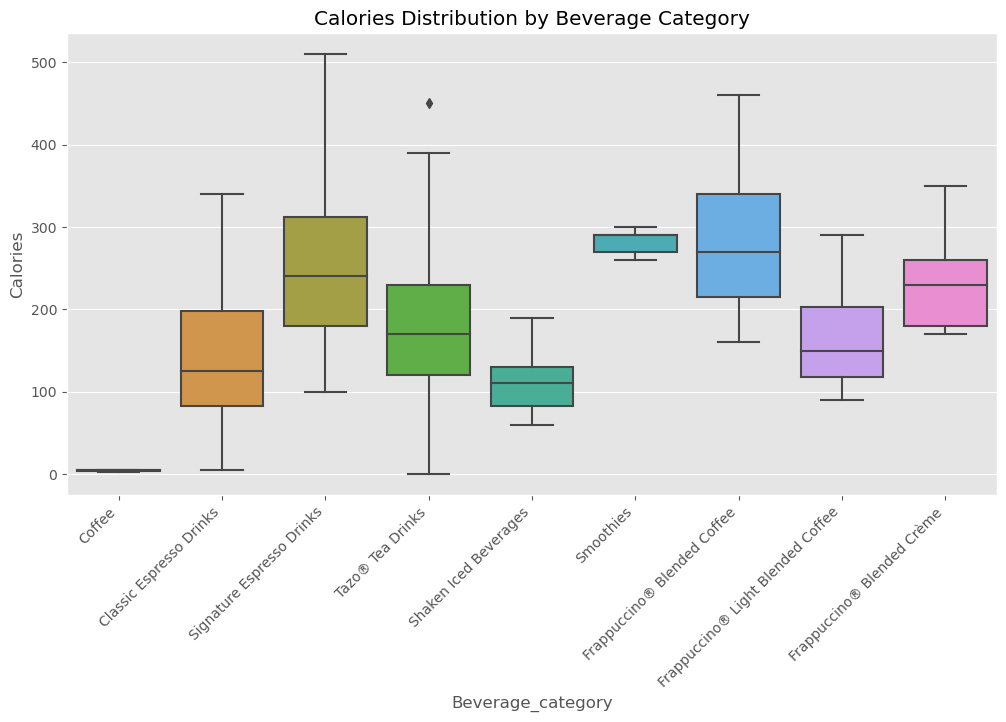

In [124]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Beverage_category', y='Calories', data=nutrition_drinks_extended)
plt.xticks(rotation=45, ha='right')
plt.title('Calories Distribution by Beverage Category')
plt.show()


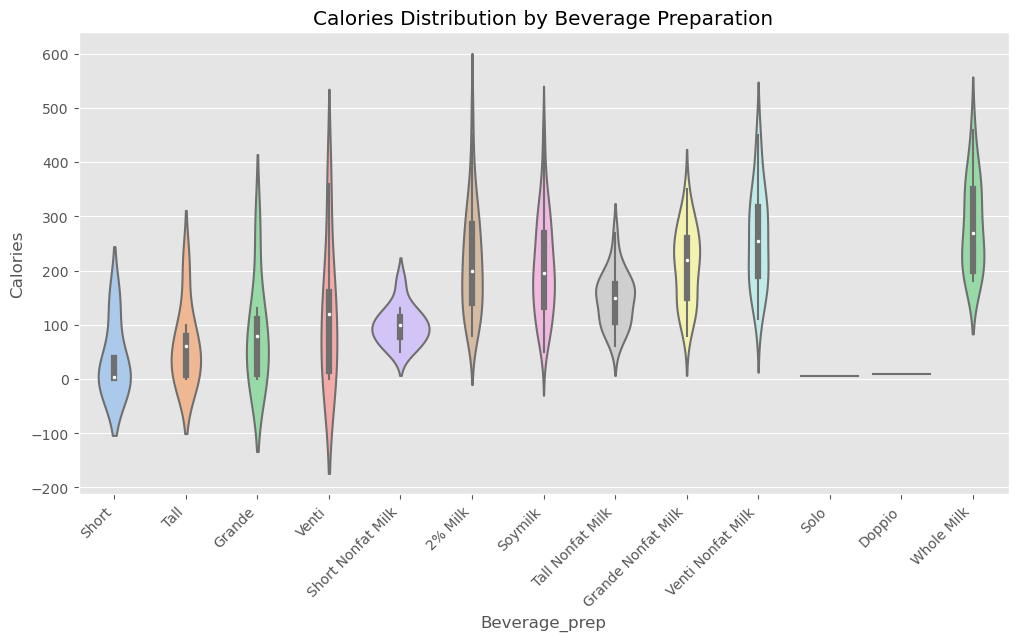

In [125]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Beverage_prep', y='Calories', data=nutrition_drinks_extended, palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.title('Calories Distribution by Beverage Preparation')
plt.show()


In [126]:
nutrition_drinks_extended.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [127]:
nutrition_drinks_extended.groupby('Beverage_prep').Calories.describe()

count        mean         std    min     25%    50%  \
Beverage_prep                                                             
2% Milk              50.0  218.000000   98.850537   80.0  140.00  200.0   
Doppio                1.0   10.000000         NaN   10.0   10.00   10.0   
Grande                7.0   85.714286   98.844515    0.0   10.00   80.0   
Grande Nonfat Milk   26.0  209.615385   70.454568   80.0  150.00  220.0   
Short                 4.0   37.000000   68.697404    0.0    2.25    4.0   
Short Nonfat Milk    12.0   99.166667   35.791907   50.0   77.50  100.0   
Solo                  1.0    5.000000         NaN    5.0    5.00    5.0   
Soymilk              66.0  207.272727   92.479444   50.0  132.50  195.0   
Tall                  7.0   63.428571   74.446529    0.0    7.00   60.0   
Tall Nonfat Milk     23.0  147.826087   50.086881   60.0  105.00  150.0   
Venti                 7.0  118.571429  128.605154    0.0   15.00  120.0   
Venti Nonfat Milk    22.0  260.000000   90.501250  110.0  190.00  255.0   
Whole Milk           16.0  283.750000   84.370216  180.0  200.00  270.0   

                       75%    max  
Beverage_prep                      
2% Milk             285.00  510.0  
Doppio               10.00   10.0  
Grande              110.00  280.0  
Grande Nonfat Milk  260.00  350.0  
Short                38.75  140.0  
Short Nonfat Milk   115.00  180.0  
Solo                  5.00    5.0  
Soymilk             270.00  460.0  
Tall                 80.00  210.0  
Tall Nonfat Milk    175.00  270.0  
Venti               160.00  360.0  
Venti Nonfat Milk   317.50  450.0  
Whole Milk          350.00  460.0

In [128]:
nutrition_drinks_extended[nutrition_drinks_extended['Calories'] == 510]

Beverage_category                                       Beverage  \
84  Signature Espresso Drinks  White Chocolate Mocha (Without Whipped Cream)   

   Beverage_prep  Calories  Total Fat (g)  Trans Fat (g)   Saturated Fat (g)  \
84       2% Milk       510             15             9.0                0.2   

     Sodium (mg)   Total Carbohydrates (g)   Cholesterol (mg)  \
84            35                        330                77   

     Dietary Fibre (g)   Sugars (g)   Protein (g)  Vitamin A (% DV)   \
84                   0           74           19.0               20%   

   Vitamin C (% DV)  Calcium (% DV)  Iron (% DV)  Caffeine (mg)  
84               4%              60%           2%           150

<Axes: xlabel='Calories', ylabel='Beverage_prep'>

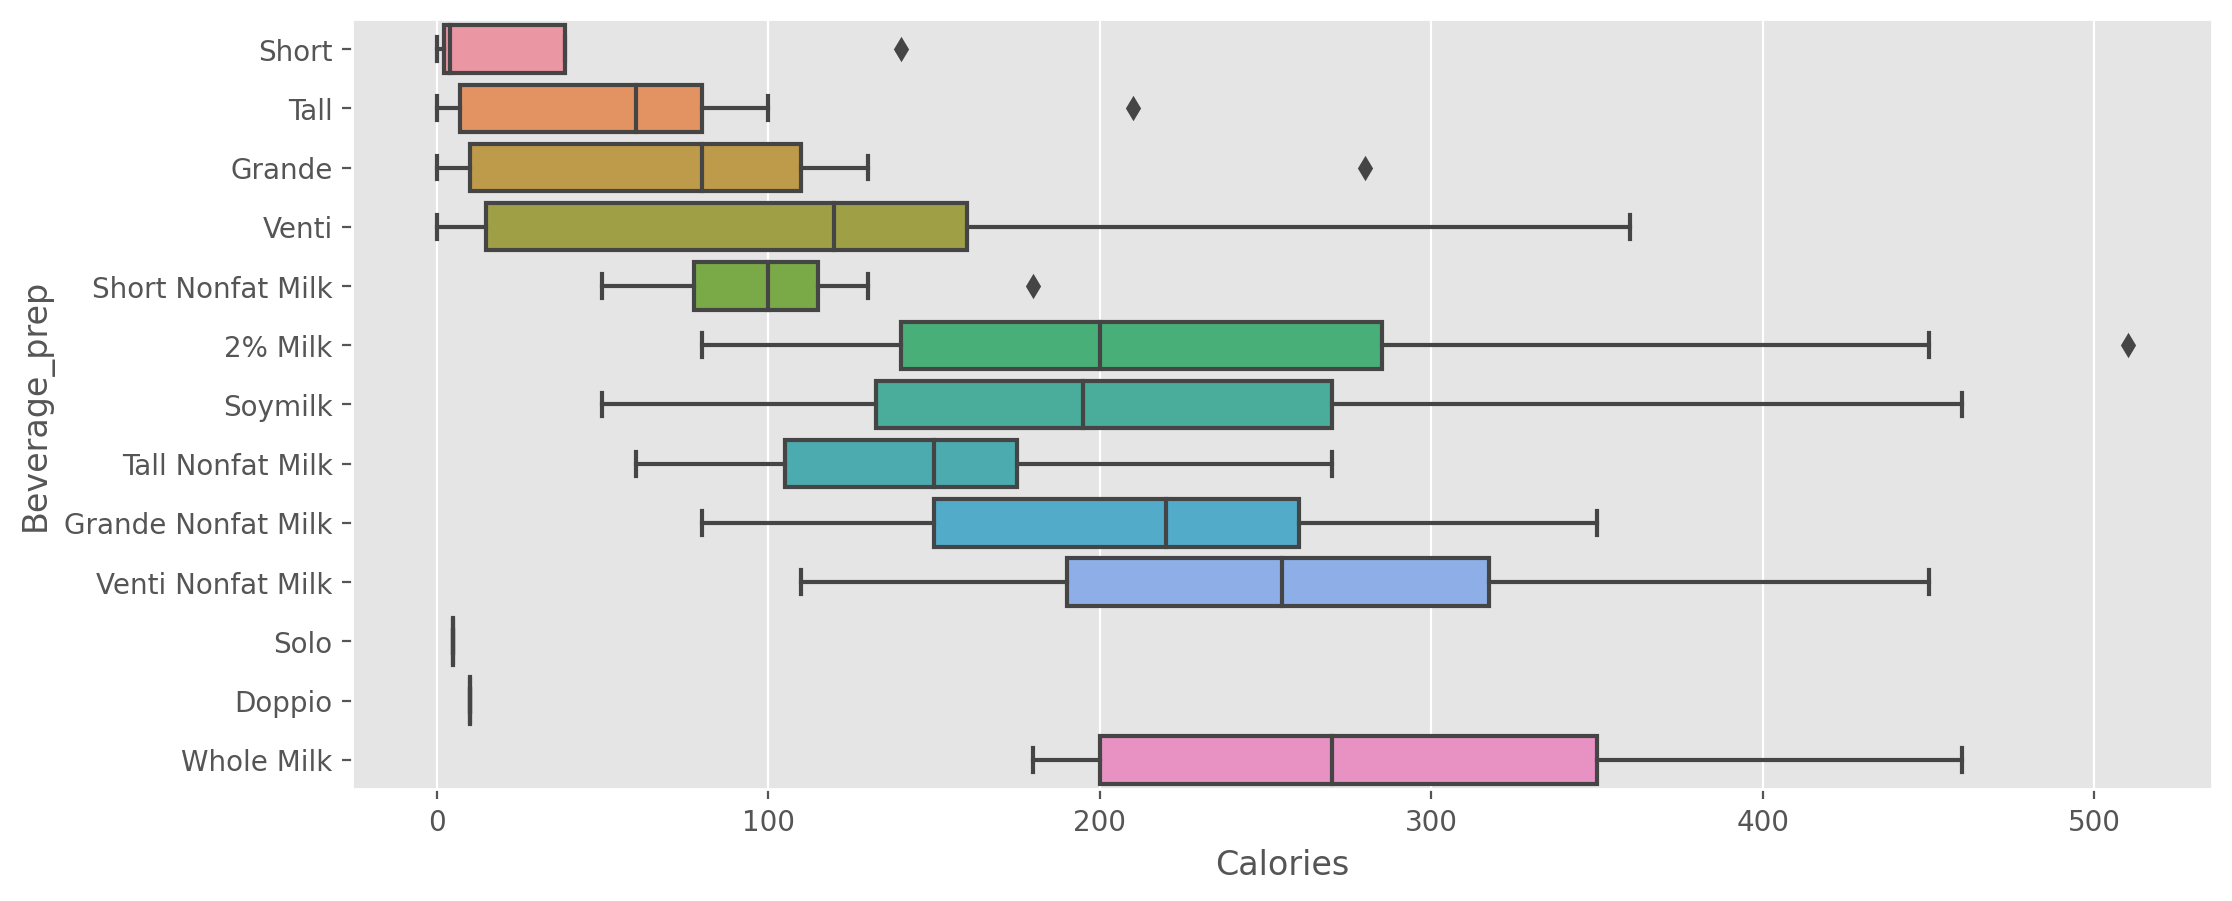

In [129]:
plt.figure(figsize = (12,5), dpi =200)
sns.boxplot(x=nutrition_drinks_extended['Calories'], y=nutrition_drinks_extended['Beverage_prep'])

In [130]:
nutrition_drinks_extended['Beverage'].value_counts()

Beverage
Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)        12
White Chocolate Mocha (Without Whipped Cream)          12
Tazo® Full-Leaf Tea Latte                              12
Tazo® Green Tea Latte                                  12
Tazo® Chai Tea Latte                                   12
Coffee                                                 12
Hot Chocolate (Without Whipped Cream)                  12
Caramel Macchiato                                      12
Cappuccino                                             12
Vanilla Latte (Or Other Flavoured Latte)               12
Caffè Mocha (Without Whipped Cream)                    12
Caffè Latte                                            12
Iced Brewed Coffee (With Milk & Classic Syrup)          9
Caramel (Without Whipped Cream)                         9
Java Chip (Without Whipped Cream)                       9
Mocha (Without Whipped Cream)                           9
Strawberries & Crème (Without Whipped Cream)            9
Brewe

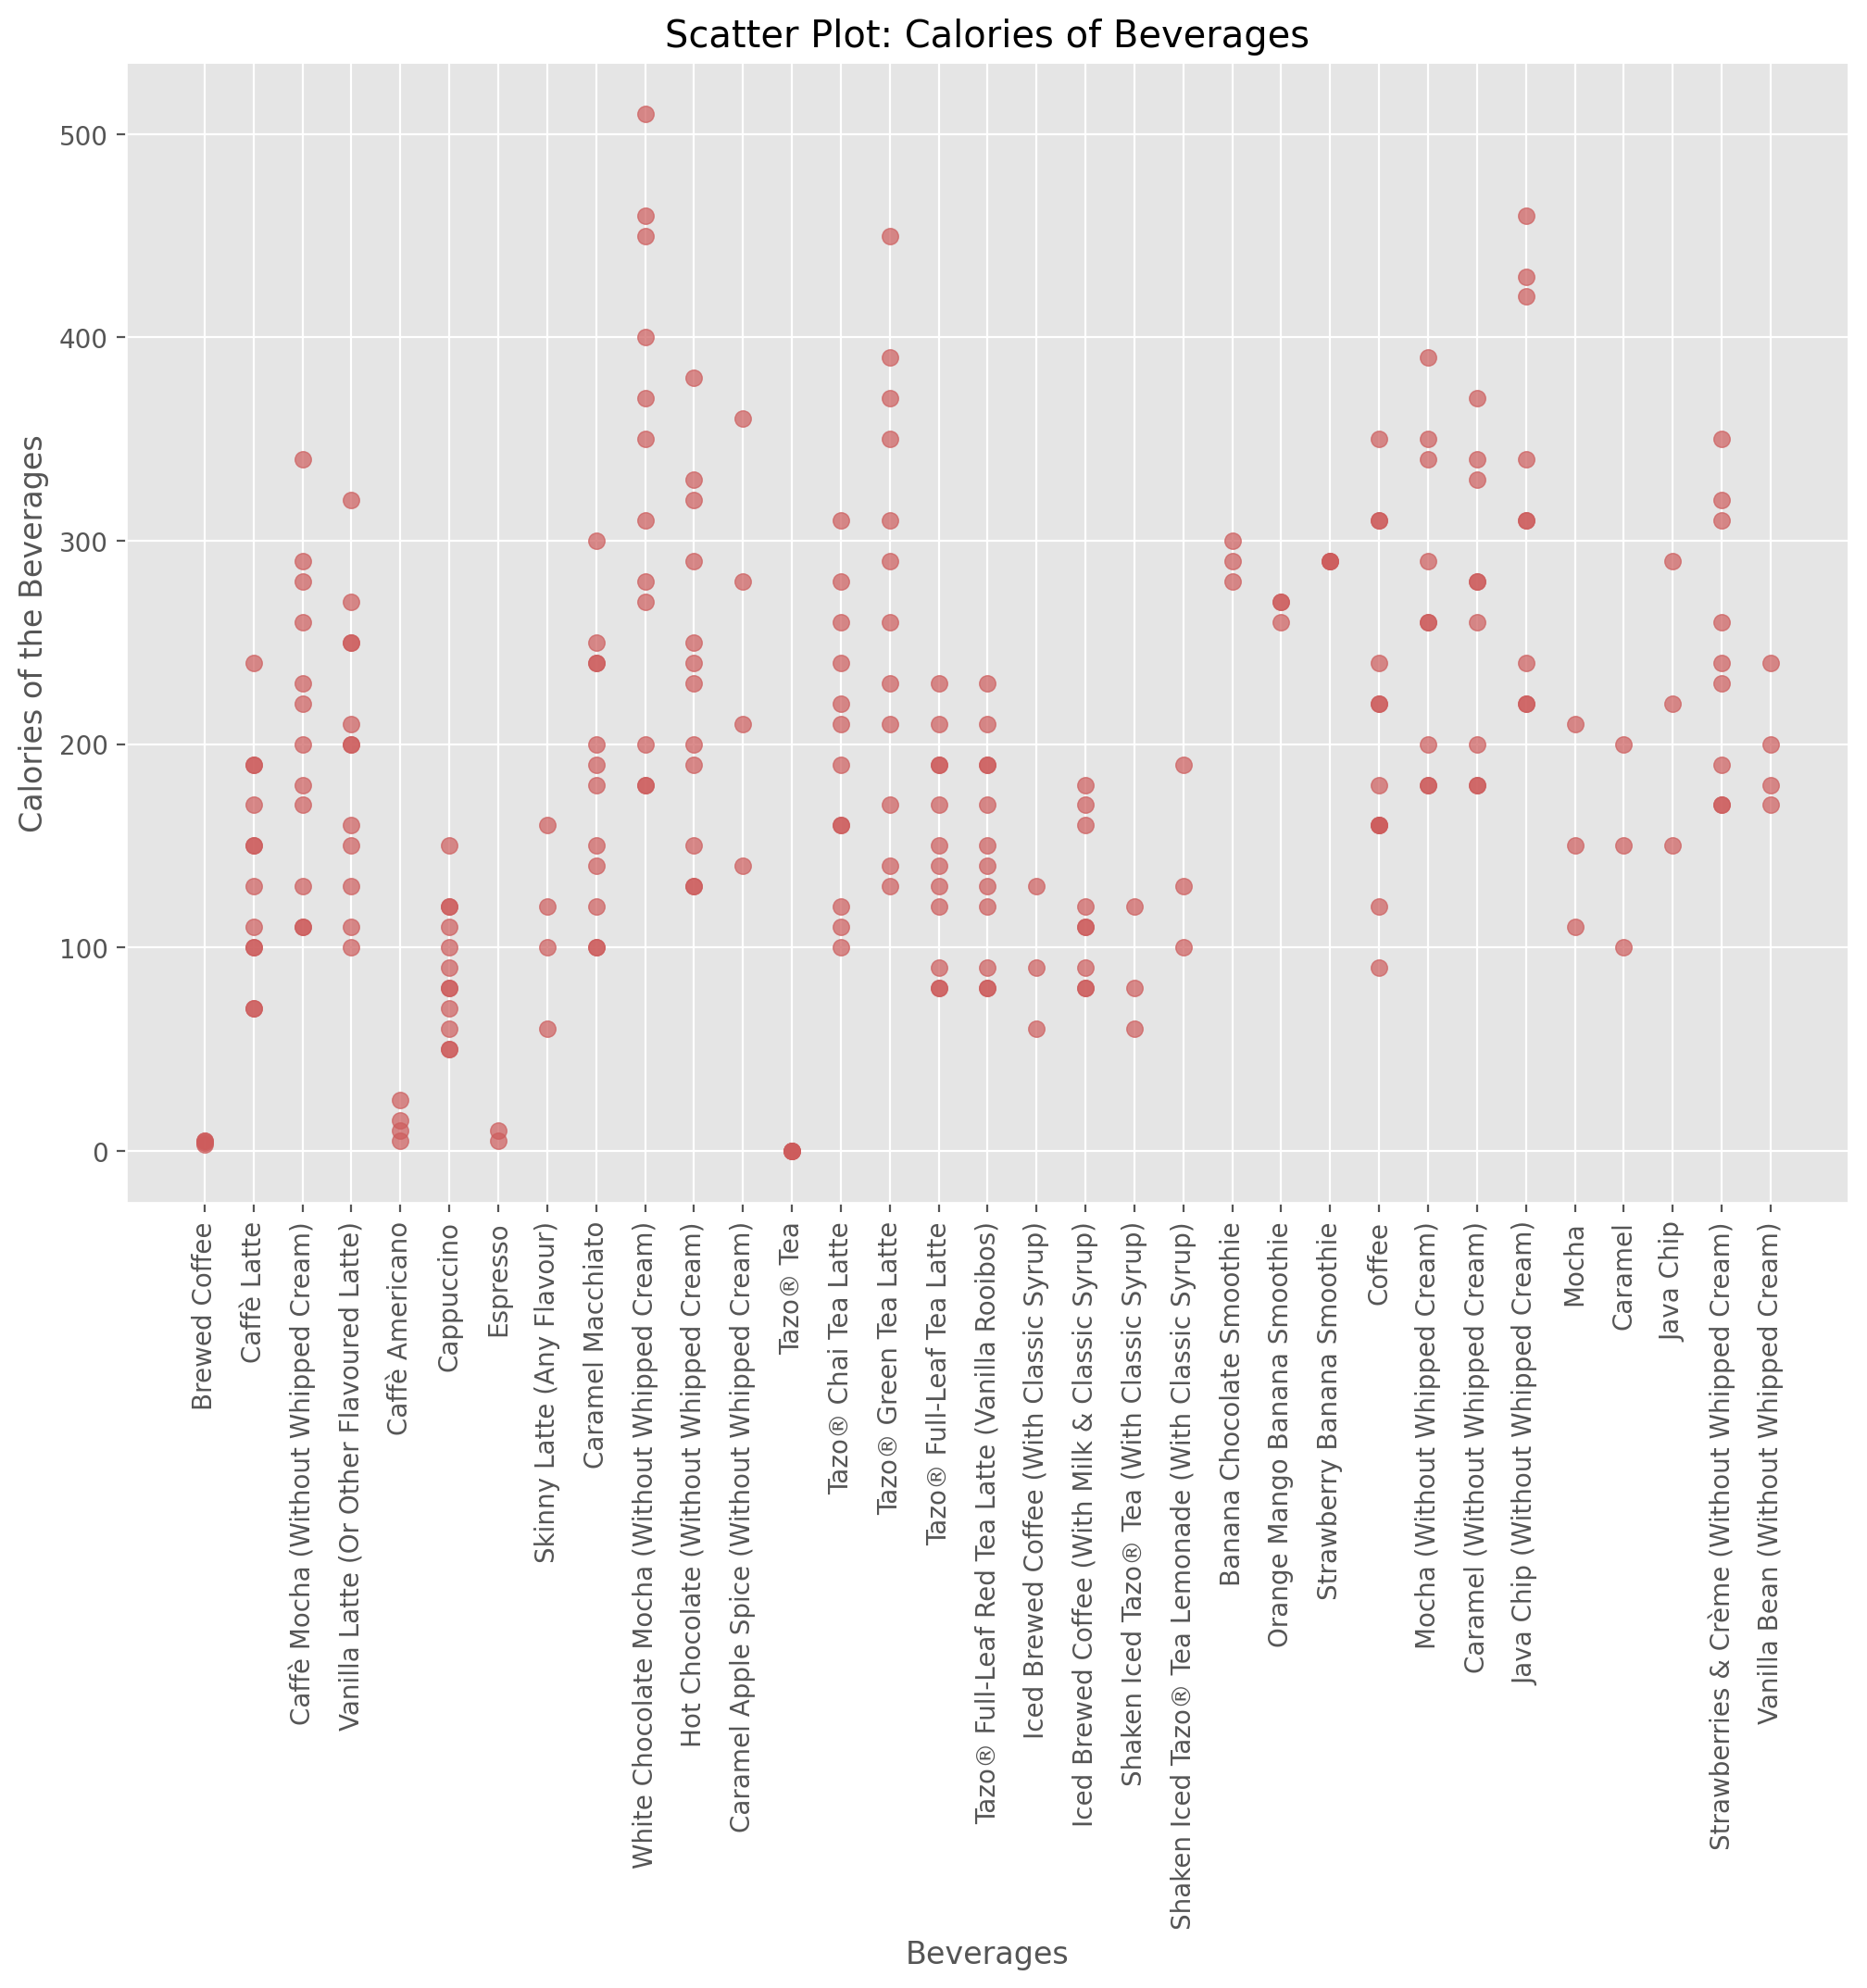

In [131]:

Beverage = nutrition_drinks_extended['Beverage']
Calories = nutrition_drinks_extended['Calories']

plt.figure(figsize=(12, 8), dpi=200)
plt.scatter(x=Beverage, y=Calories, color='indianred', s=40, alpha=0.7)

plt.xlabel('Beverages')
plt.xticks(rotation=90)
plt.ylabel('Calories of the Beverages')
plt.title('Scatter Plot: Calories of Beverages')
plt.show()


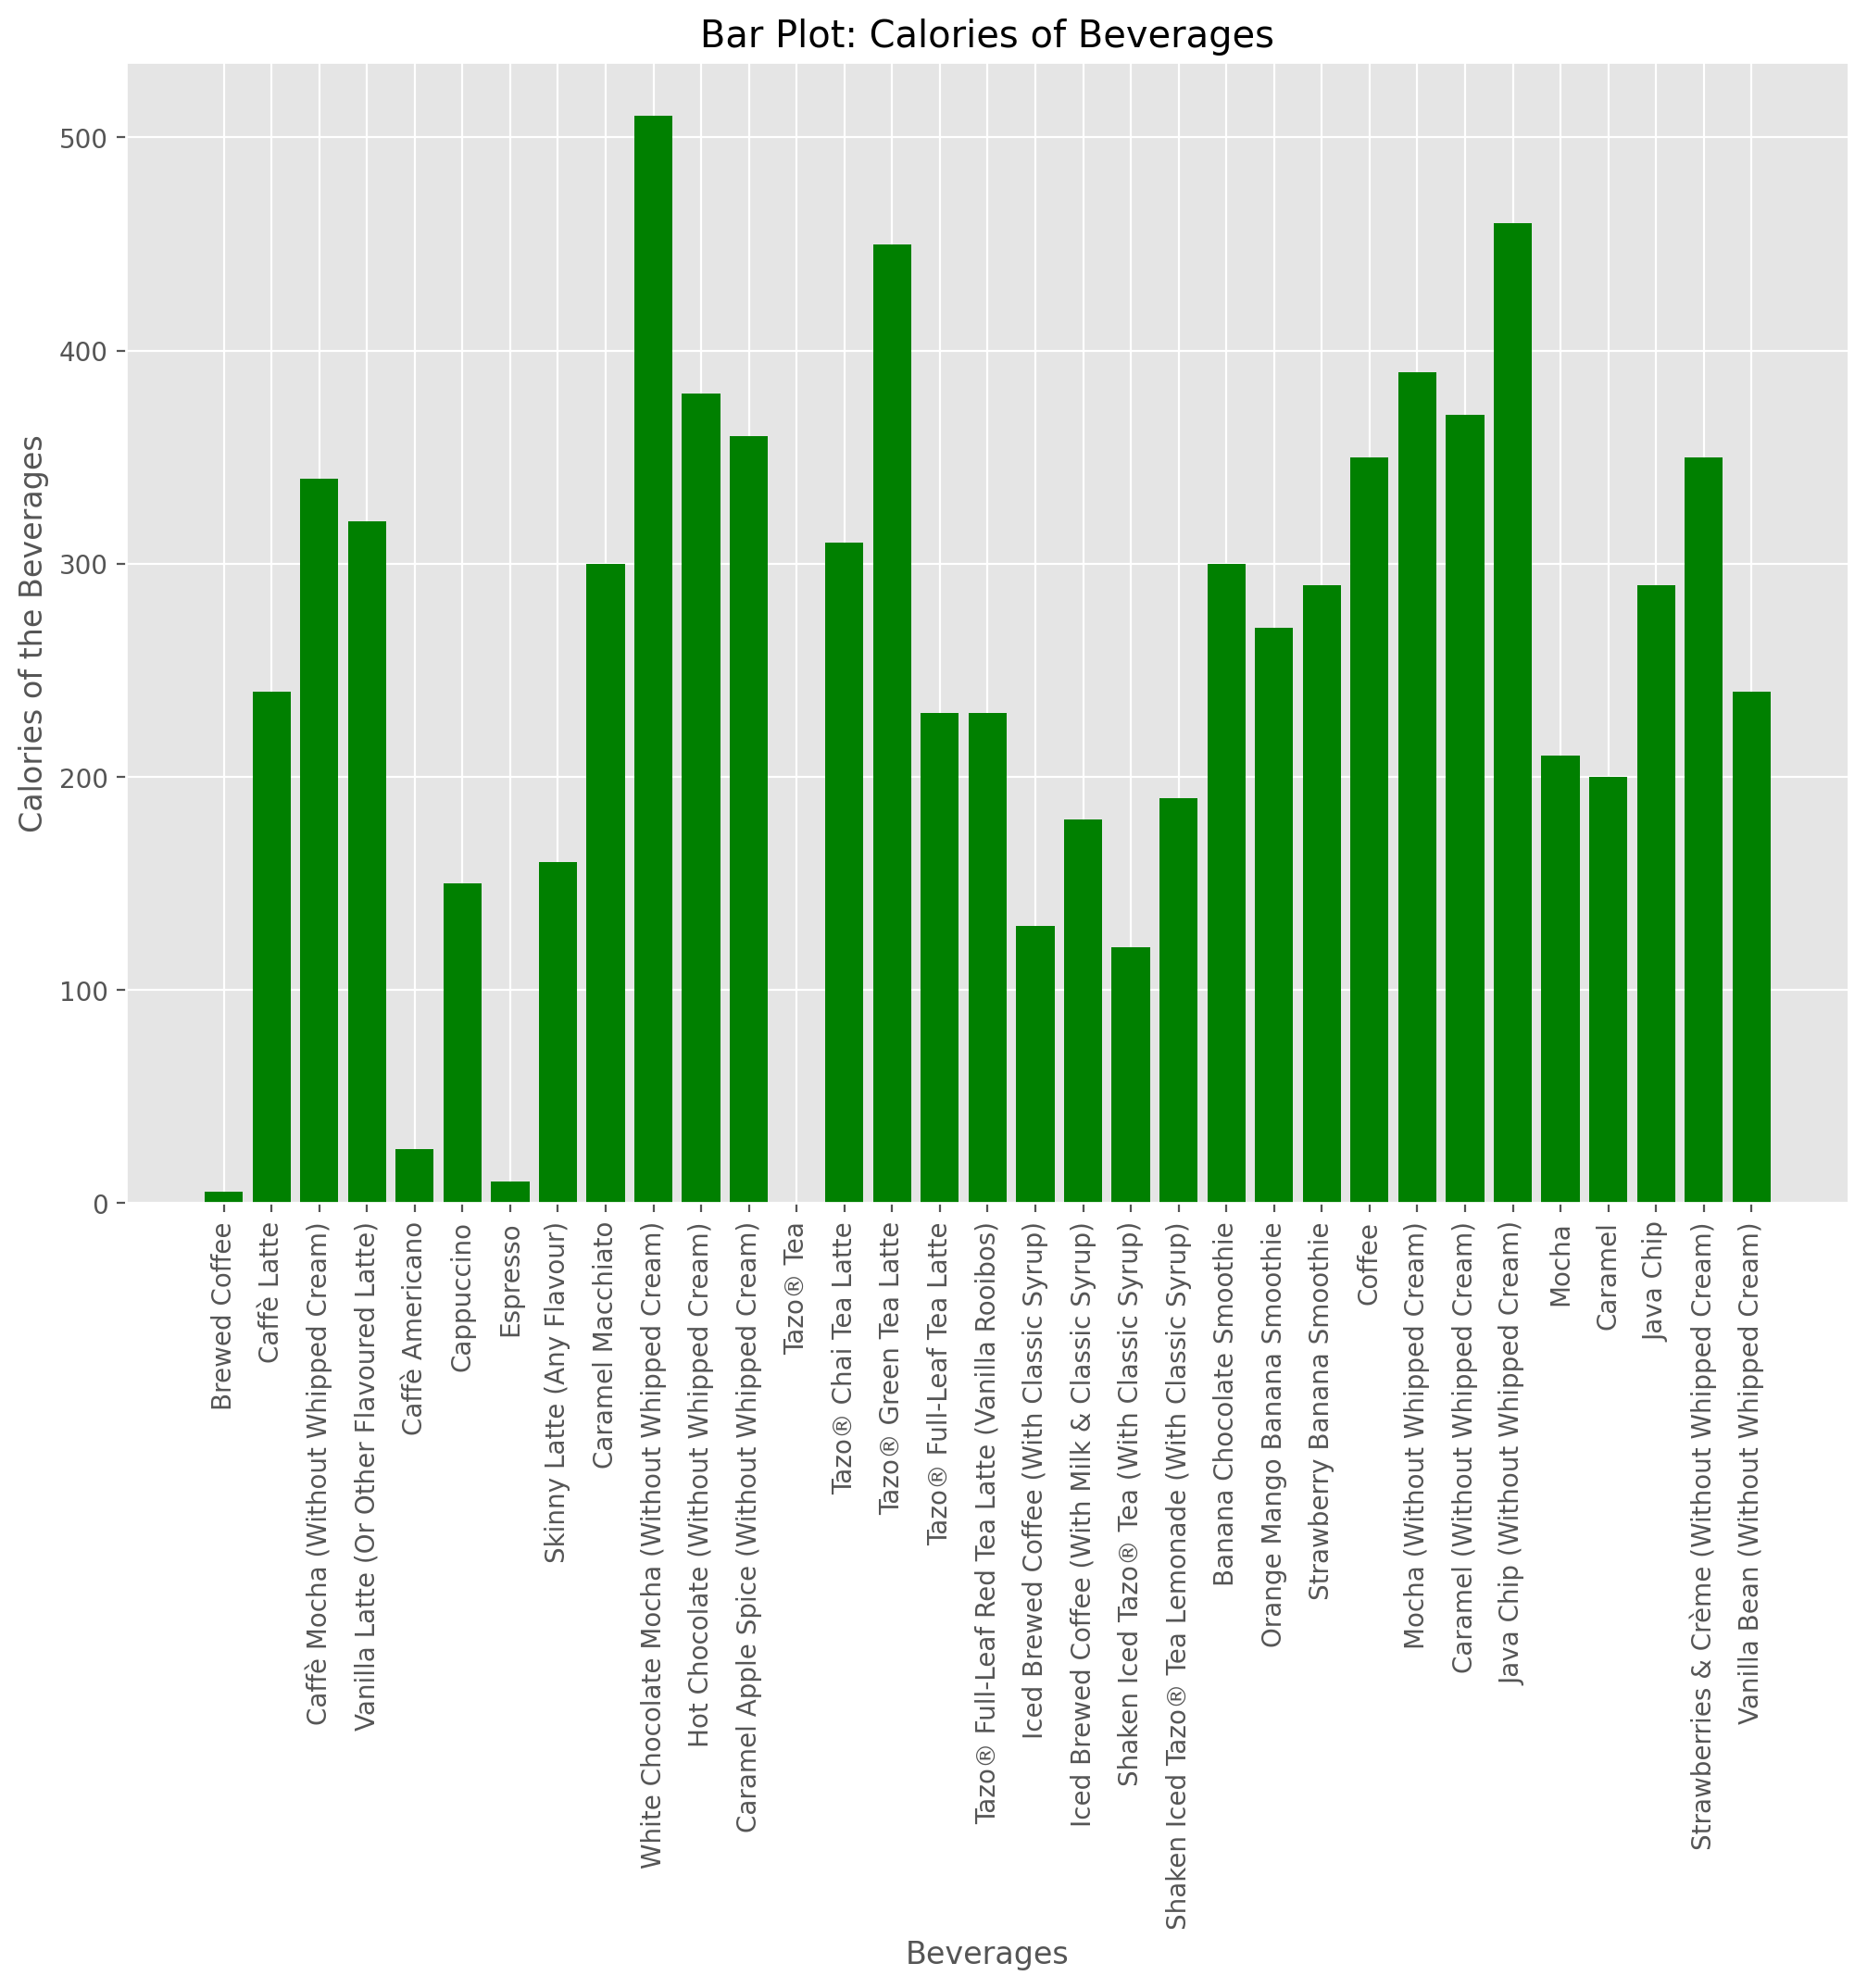

In [132]:
plt.figure(figsize=(12, 8), dpi=200)
plt.bar(Beverage, Calories, color='green')
plt.xlabel('Beverages')
plt.xticks(rotation=90)
plt.ylabel('Calories of the Beverages')
plt.title('Bar Plot: Calories of Beverages')
plt.show()


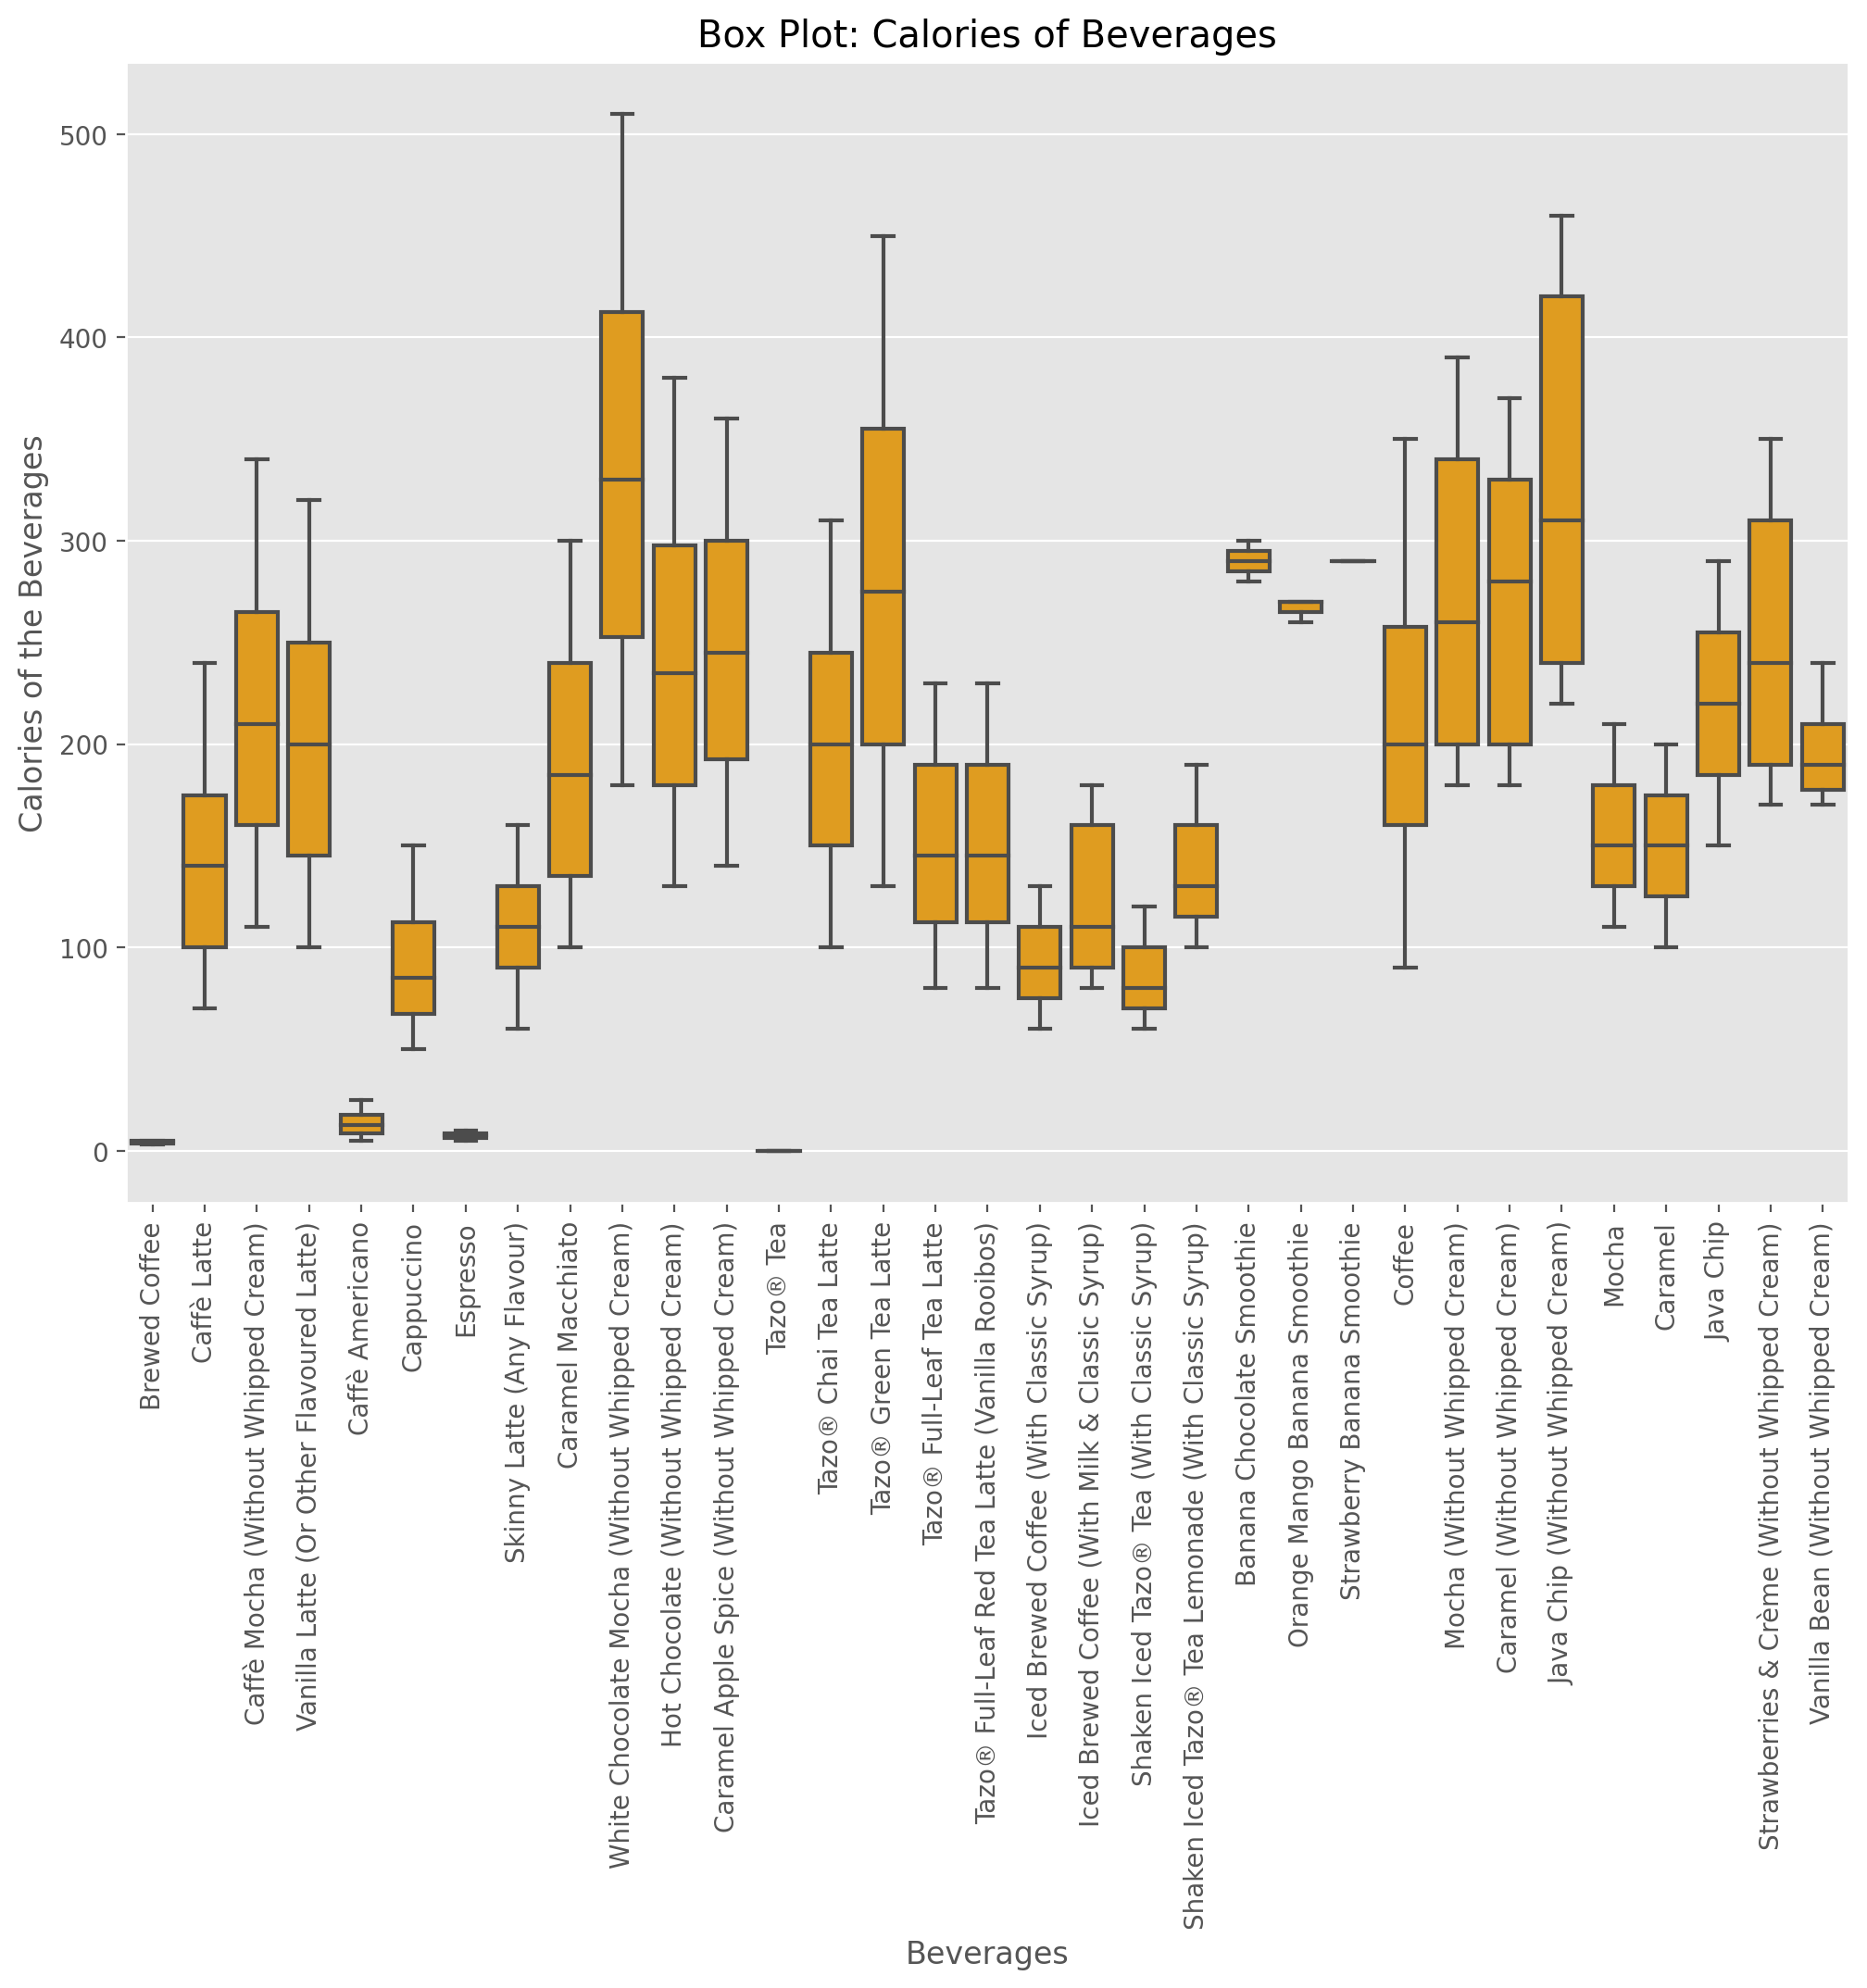

In [133]:
plt.figure(figsize=(12, 8), dpi=200)
sns.boxplot(x=Beverage, y=Calories, color='orange')
plt.xlabel('Beverages')
plt.xticks(rotation=90)
plt.ylabel('Calories of the Beverages')
plt.title('Box Plot: Calories of Beverages')
plt.show()


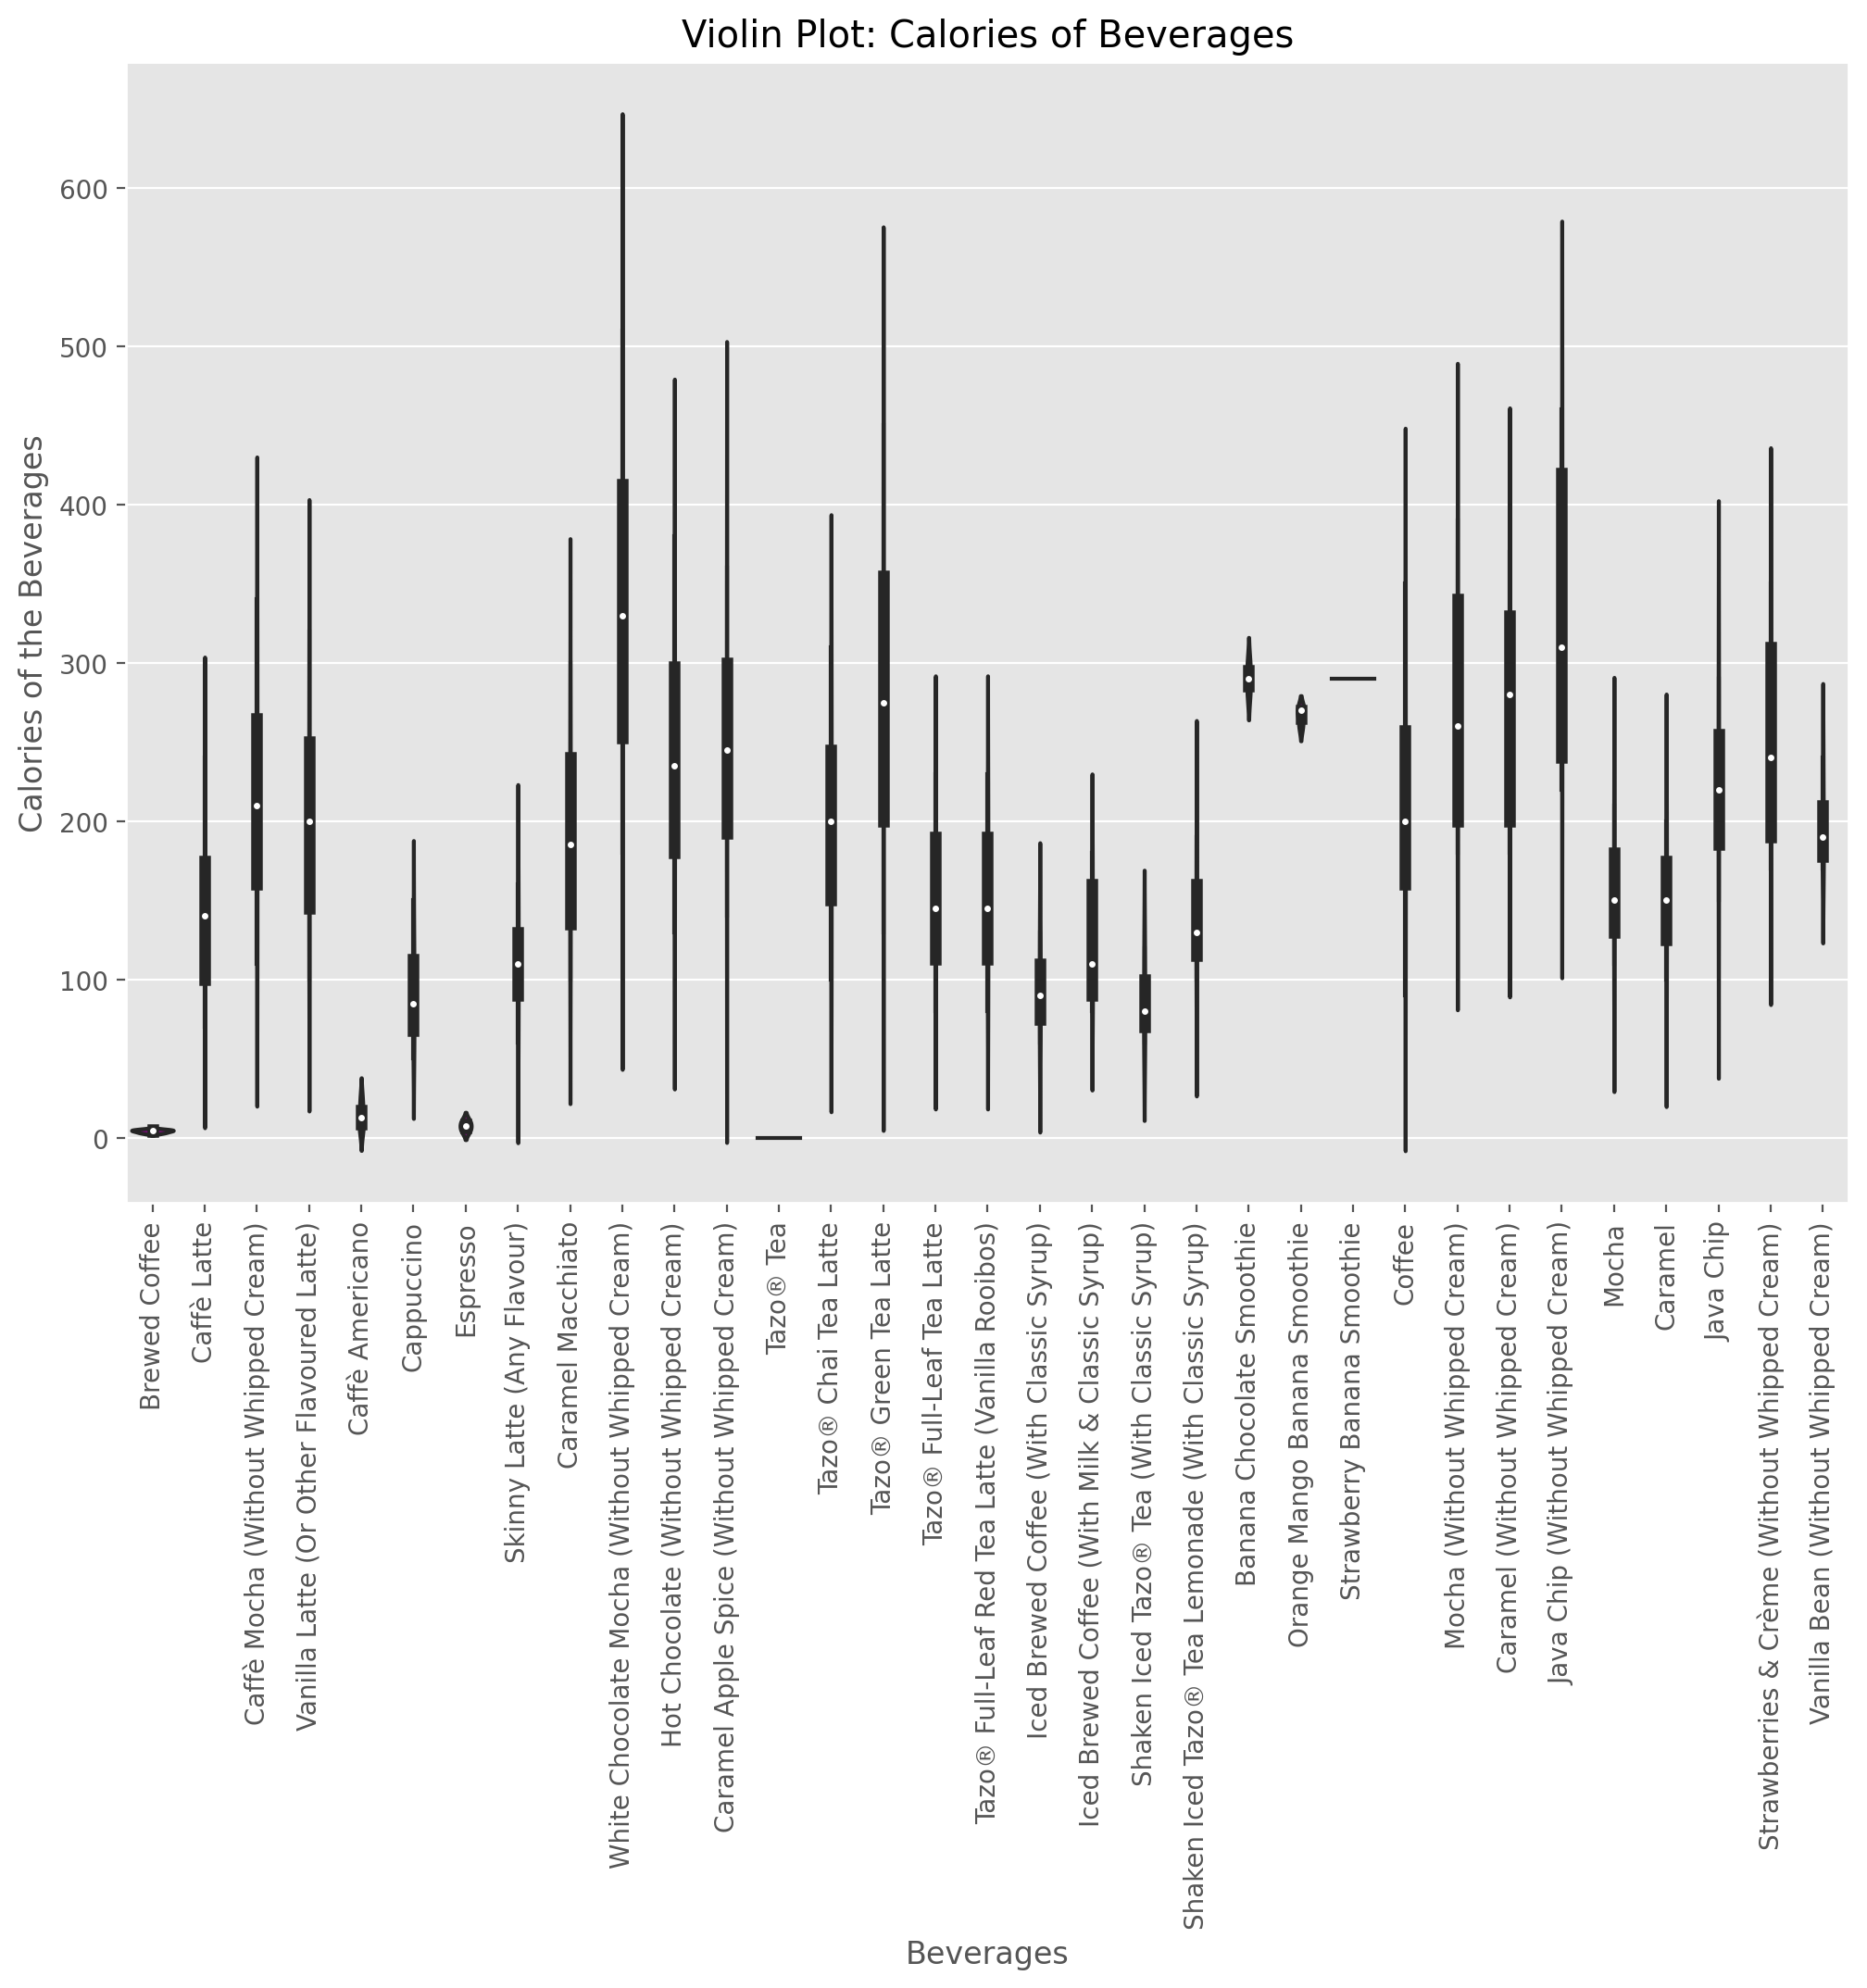

In [134]:
plt.figure(figsize=(12, 8), dpi=200)
sns.violinplot(x=Beverage, y=Calories, color='purple')
plt.xlabel('Beverages')
plt.xticks(rotation=90)
plt.ylabel('Calories of the Beverages')
plt.title('Violin Plot: Calories of Beverages')
plt.show()


In [135]:
max_calories_per_beverage = nutrition_drinks_extended.groupby('Beverage')['Calories'].max()

print(max_calories_per_beverage)


Beverage
Banana Chocolate Smoothie                              300
Brewed Coffee                                            5
Caffè Americano                                         25
Caffè Latte                                            240
Caffè Mocha (Without Whipped Cream)                    340
Cappuccino                                             150
Caramel                                                200
Caramel (Without Whipped Cream)                        370
Caramel Apple Spice (Without Whipped Cream)            360
Caramel Macchiato                                      300
Coffee                                                 350
Espresso                                                10
Hot Chocolate (Without Whipped Cream)                  380
Iced Brewed Coffee (With Classic Syrup)                130
Iced Brewed Coffee (With Milk & Classic Syrup)         180
Java Chip                                              290
Java Chip (Without Whipped Cream)              

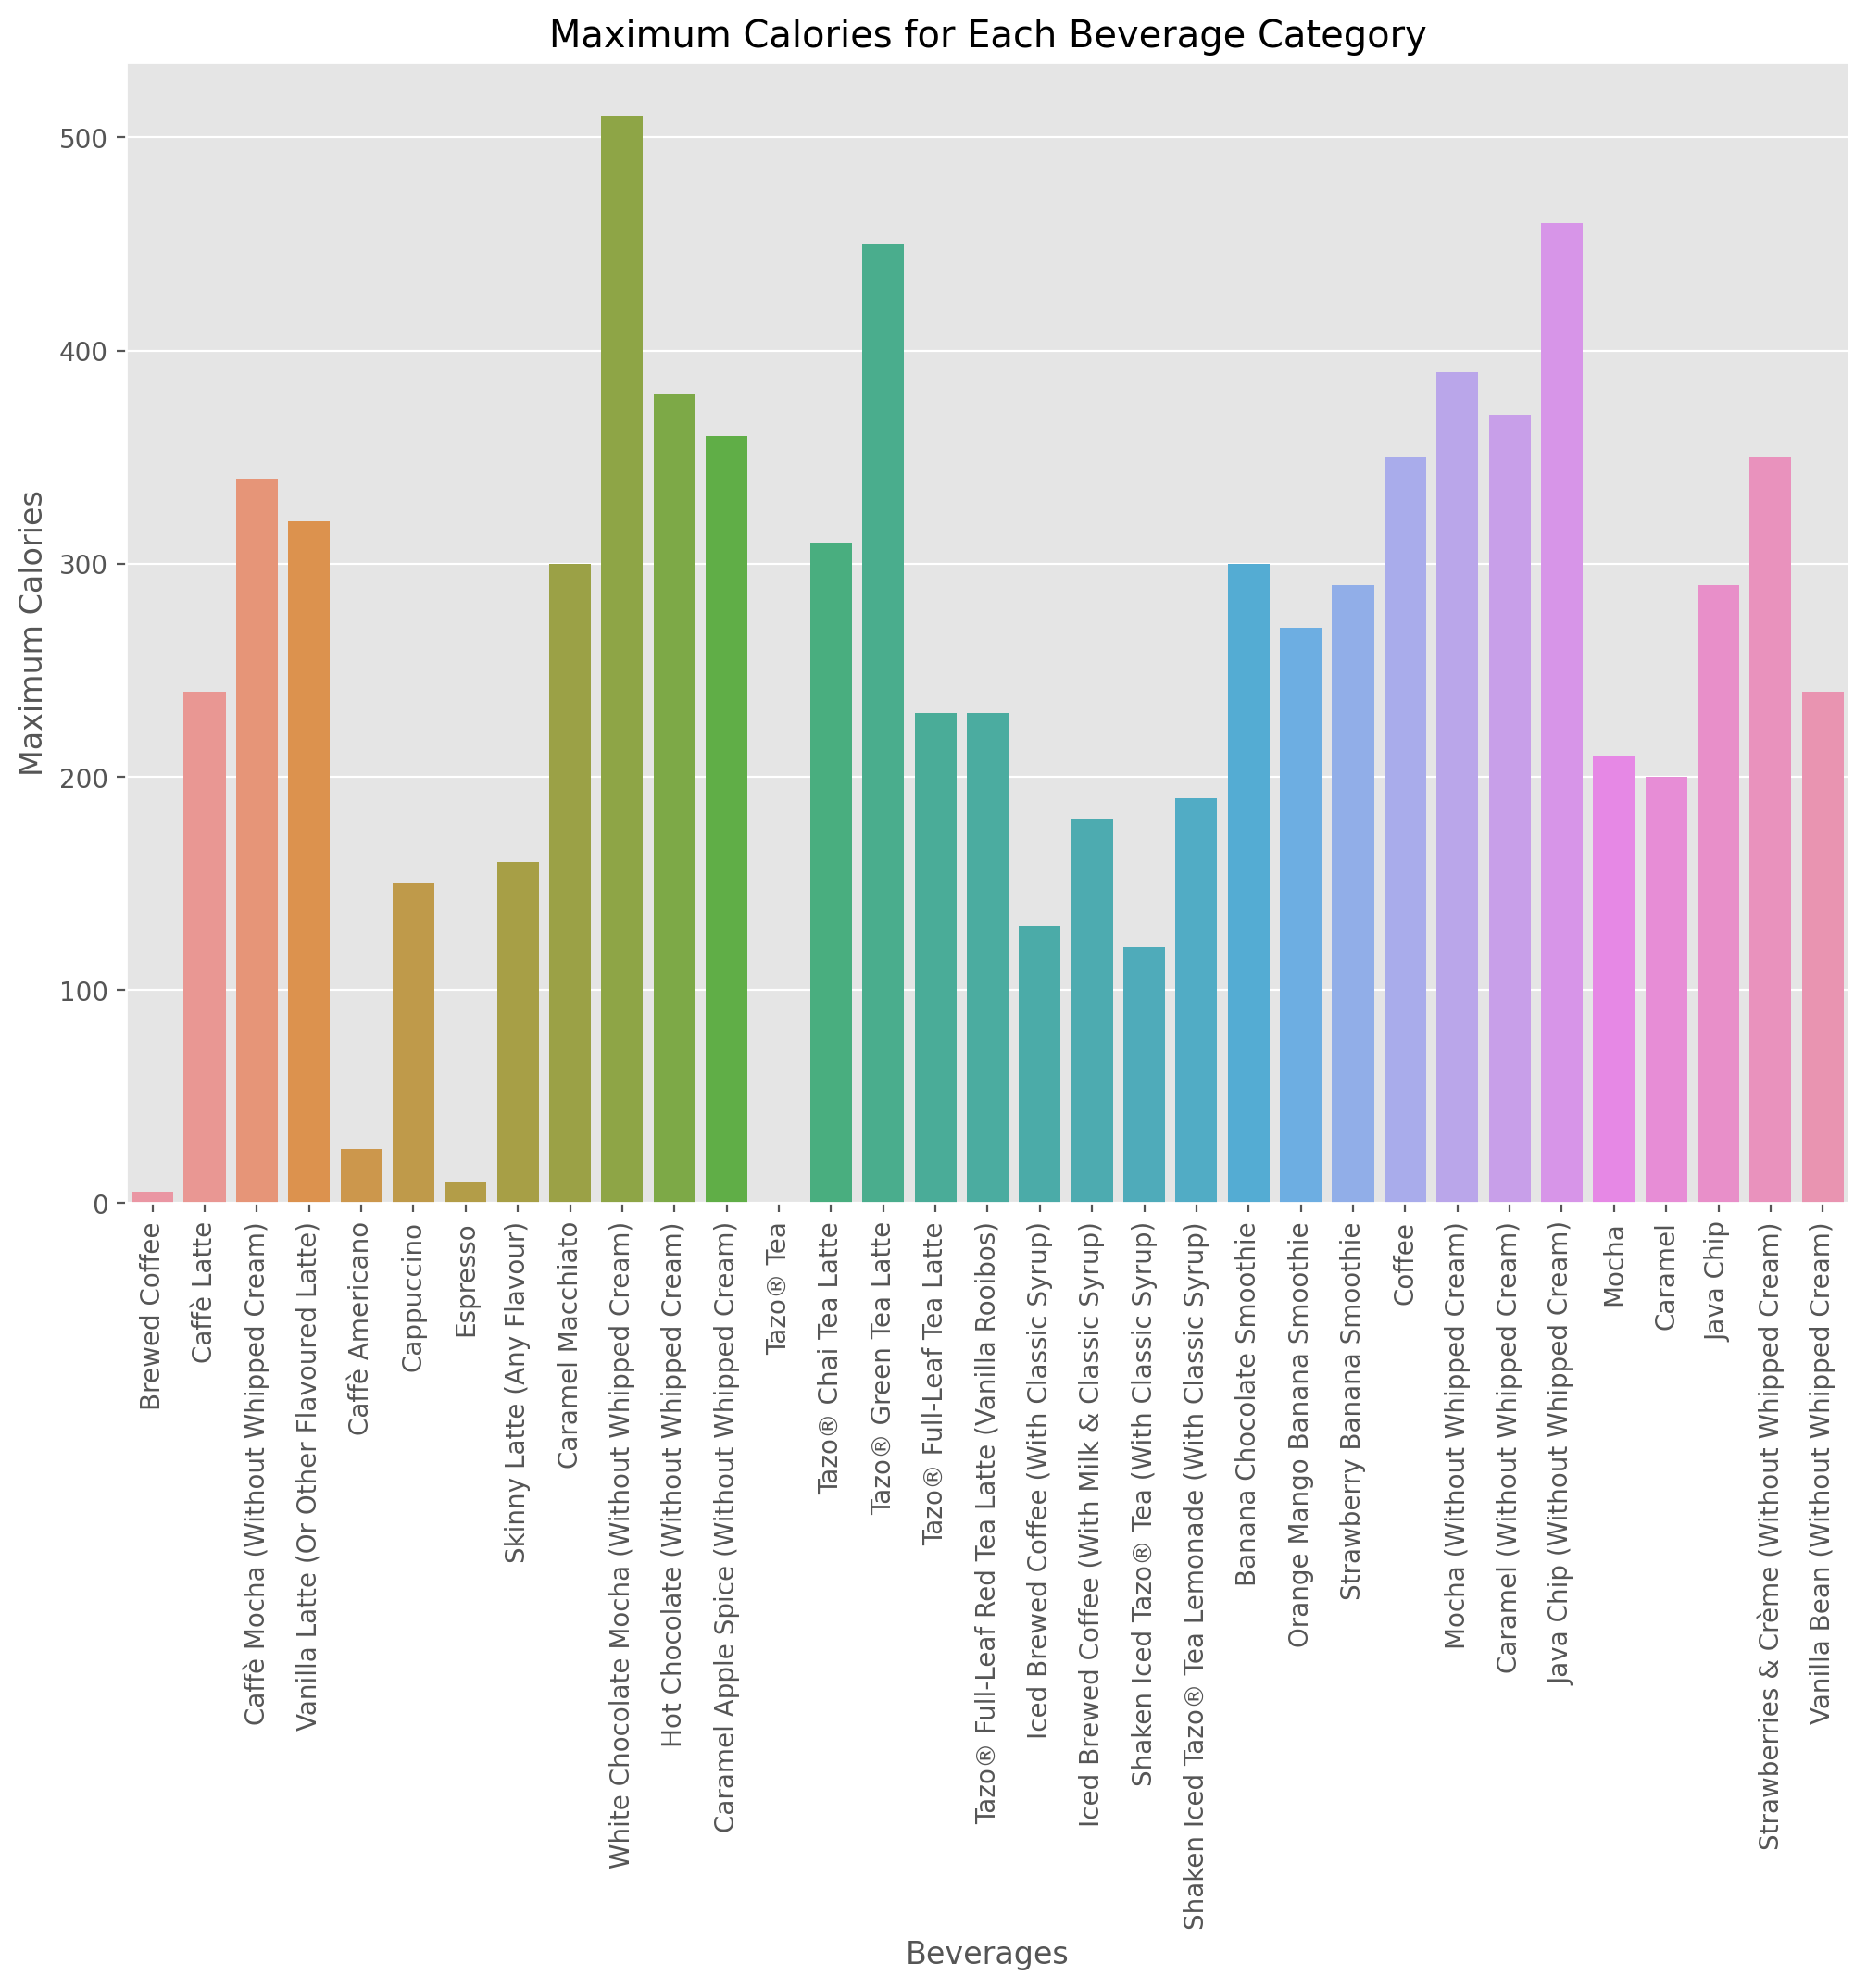

In [136]:
plt.figure(figsize=(12, 8), dpi=200)
sns.barplot(x='Beverage', y='Calories', data=nutrition_drinks_extended, estimator=max, ci=None)
plt.xlabel('Beverages')
plt.xticks(rotation=90)
plt.ylabel('Maximum Calories')
plt.title('Maximum Calories for Each Beverage Category')
plt.show()


In [137]:
max_calories_per_beverage = nutrition_drinks_extended.groupby('Beverage')['Calories'].max()

print(max_calories_per_beverage)


Beverage
Banana Chocolate Smoothie                              300
Brewed Coffee                                            5
Caffè Americano                                         25
Caffè Latte                                            240
Caffè Mocha (Without Whipped Cream)                    340
Cappuccino                                             150
Caramel                                                200
Caramel (Without Whipped Cream)                        370
Caramel Apple Spice (Without Whipped Cream)            360
Caramel Macchiato                                      300
Coffee                                                 350
Espresso                                                10
Hot Chocolate (Without Whipped Cream)                  380
Iced Brewed Coffee (With Classic Syrup)                130
Iced Brewed Coffee (With Milk & Classic Syrup)         180
Java Chip                                              290
Java Chip (Without Whipped Cream)              

In [138]:
# Assuming 'nutrition_drinks_extended' is your DataFrame
max_calories_per_beverage = nutrition_drinks_extended.groupby('Beverage')['Calories'].max()

# Sort the Series in descending order
sorted_max_calories = max_calories_per_beverage.sort_values(ascending=False)

# Select the top 10 values
top_10_max_calories = sorted_max_calories.head(10)

print("Top 10 beverages with maximum calories:")
print(top_10_max_calories)


Top 10 beverages with maximum calories:
Beverage
White Chocolate Mocha (Without Whipped Cream)    510
Java Chip (Without Whipped Cream)                460
Tazo® Green Tea Latte                            450
Mocha (Without Whipped Cream)                    390
Hot Chocolate (Without Whipped Cream)            380
Caramel (Without Whipped Cream)                  370
Caramel Apple Spice (Without Whipped Cream)      360
Coffee                                           350
Strawberries & Crème (Without Whipped Cream)     350
Caffè Mocha (Without Whipped Cream)              340
Name: Calories, dtype: int64


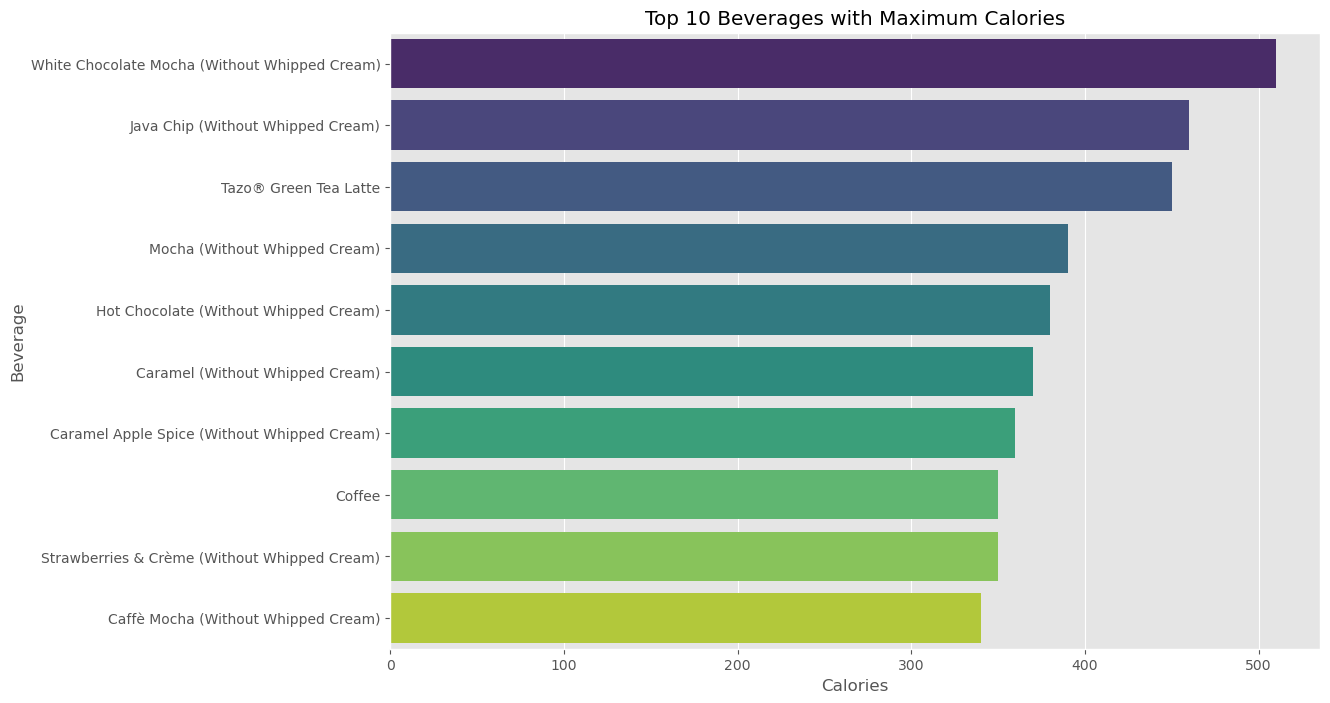

In [139]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_max_calories.values, y=top_10_max_calories.index, palette='viridis')

plt.xlabel('Calories')
plt.ylabel('Beverage')
plt.title('Top 10 Beverages with Maximum Calories')
plt.show()


In [140]:
min_calories_per_beverage = nutrition_drinks_extended.groupby('Beverage')['Calories'].min()

print(min_calories_per_beverage)


Beverage
Banana Chocolate Smoothie                              280
Brewed Coffee                                            3
Caffè Americano                                          5
Caffè Latte                                             70
Caffè Mocha (Without Whipped Cream)                    110
Cappuccino                                              50
Caramel                                                100
Caramel (Without Whipped Cream)                        180
Caramel Apple Spice (Without Whipped Cream)            140
Caramel Macchiato                                      100
Coffee                                                  90
Espresso                                                 5
Hot Chocolate (Without Whipped Cream)                  130
Iced Brewed Coffee (With Classic Syrup)                 60
Iced Brewed Coffee (With Milk & Classic Syrup)          80
Java Chip                                              150
Java Chip (Without Whipped Cream)              

In [141]:
min_calories_per_beverage = nutrition_drinks_extended.groupby('Beverage')['Calories'].min()

# Sorted the Series in descending order
sorted_min_calories = min_calories_per_beverage.sort_values(ascending=False)

# Select the top 10 values
top_10_min_calories = sorted_min_calories.head(10)

print("Top 10 beverages with maximum calories:")
print(top_10_min_calories)


Top 10 beverages with maximum calories:
Beverage
Strawberry Banana Smoothie                       290
Banana Chocolate Smoothie                        280
Orange Mango Banana Smoothie                     260
Java Chip (Without Whipped Cream)                220
Mocha (Without Whipped Cream)                    180
Caramel (Without Whipped Cream)                  180
White Chocolate Mocha (Without Whipped Cream)    180
Vanilla Bean (Without Whipped Cream)             170
Strawberries & Crème (Without Whipped Cream)     170
Java Chip                                        150
Name: Calories, dtype: int64


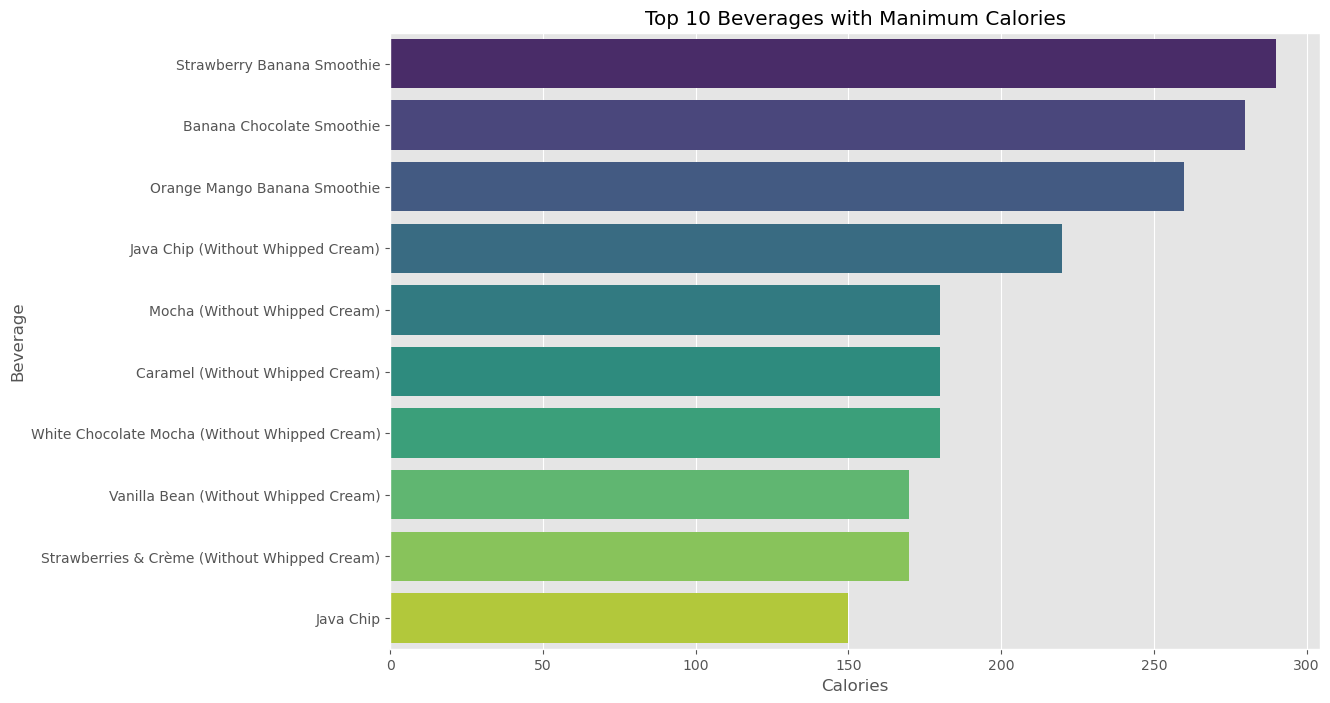

In [142]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_min_calories.values, y=top_10_min_calories.index, palette='viridis')

plt.xlabel('Calories')
plt.ylabel('Beverage')
plt.title('Top 10 Beverages with Manimum Calories')
plt.show()


In [143]:
# Assuming 'nutrition_drinks_extended' is your DataFrame
min_calories_per_beverage = nutrition_drinks_extended.groupby('Beverage')['Calories'].min()

# Find the beverage with the maximum calories from the minimum calories
max_calories_beverage = min_calories_per_beverage.idxmax()

print(f"The beverage with the maximum calories from the minimum calories is: {max_calories_beverage}")


The beverage with the maximum calories from the minimum calories is: Strawberry Banana Smoothie


In [144]:
max_calories_per_beverage = nutrition_drinks_extended.groupby('Beverage')['Calories'].max()

# Find the beverage with the maximum calories from the minimum calories
max_calories_beverage = min_calories_per_beverage.idxmax()

print(f"The beverage with the maximum calories from the maximum calories is: {max_calories_beverage}")


The beverage with the maximum calories from the maximum calories is: Strawberry Banana Smoothie


In [145]:
# Assuming 'nutrition_drinks_extended' is your DataFrame
min_calories_per_beverage = nutrition_drinks_extended.groupby('Beverage')['Calories'].min()

# Sort the Series in descending order
sorted_min_calories = min_calories_per_beverage.sort_values(ascending=False)

# Find the second maximum calories
second_max_calories_beverage = sorted_min_calories.index[1]

print(f"The beverage with the second maximum calories from the minimum calories is: {second_max_calories_beverage}")


The beverage with the second maximum calories from the minimum calories is: Banana Chocolate Smoothie


In [146]:
# Assuming 'nutrition_drinks_extended' is your DataFrame
max_calories_per_beverage = nutrition_drinks_extended.groupby('Beverage')['Calories'].max()

# Sort the Series in descending order
sorted_min_calories = min_calories_per_beverage.sort_values(ascending=False)

# Find the second maximum calories
second_max_calories_beverage = sorted_min_calories.index[1]

print(f"The beverage with the second maximum calories from the maximum calories is: {second_max_calories_beverage}")


The beverage with the second maximum calories from the maximum calories is: Banana Chocolate Smoothie


In [147]:
for col in nutrition_drinks_extended.columns:
    print(col)

Beverage_category
Beverage
Beverage_prep
Calories
 Total Fat (g)
Trans Fat (g) 
Saturated Fat (g)
 Sodium (mg)
 Total Carbohydrates (g) 
Cholesterol (mg)
 Dietary Fibre (g)
 Sugars (g)
 Protein (g) 
Vitamin A (% DV) 
Vitamin C (% DV)
 Calcium (% DV) 
Iron (% DV) 
Caffeine (mg)


In [148]:
# to remove the spaces rom left and right side
nutrition_drinks_extended.columns = nutrition_drinks_extended.columns.str.lstrip()

for col in nutrition_drinks_extended.columns:
    print(col)

Beverage_category
Beverage
Beverage_prep
Calories
Total Fat (g)
Trans Fat (g) 
Saturated Fat (g)
Sodium (mg)
Total Carbohydrates (g) 
Cholesterol (mg)
Dietary Fibre (g)
Sugars (g)
Protein (g) 
Vitamin A (% DV) 
Vitamin C (% DV)
Calcium (% DV) 
Iron (% DV) 
Caffeine (mg)


In [149]:
nutrition_drinks_extended.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g) ', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       'Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [150]:
nutrition_drinks_extended.columns = nutrition_drinks_extended.columns.str.rstrip()

In [151]:
nutrition_drinks_extended.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')

In [152]:
nutrition_drinks_extended.isna().any()

Beverage_category          False
Beverage                   False
Beverage_prep              False
Calories                   False
Total Fat (g)              False
Trans Fat (g)              False
Saturated Fat (g)          False
Sodium (mg)                False
Total Carbohydrates (g)    False
Cholesterol (mg)           False
Dietary Fibre (g)          False
Sugars (g)                 False
Protein (g)                False
Vitamin A (% DV)           False
Vitamin C (% DV)           False
Calcium (% DV)             False
Iron (% DV)                False
Caffeine (mg)               True
dtype: bool

In [153]:
nutrition_drinks_extended.isnull().sum()

Beverage_category          0
Beverage                   0
Beverage_prep              0
Calories                   0
Total Fat (g)              0
Trans Fat (g)              0
Saturated Fat (g)          0
Sodium (mg)                0
Total Carbohydrates (g)    0
Cholesterol (mg)           0
Dietary Fibre (g)          0
Sugars (g)                 0
Protein (g)                0
Vitamin A (% DV)           0
Vitamin C (% DV)           0
Calcium (% DV)             0
Iron (% DV)                0
Caffeine (mg)              1
dtype: int64

In [154]:
nutrition_drinks_extended.isnull().any(axis=1)
nutrition_drinks_extended[nutrition_drinks_extended.isnull().any(axis=1)]

Beverage_category                                        Beverage  \
158  Shaken Iced Beverages  Iced Brewed Coffee (With Milk & Classic Syrup)   

    Beverage_prep  Calories Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  \
158       2% Milk        90             1            0.5                0.0   

     Sodium (mg)  Total Carbohydrates (g)  Cholesterol (mg)  \
158            5                       25                18   

     Dietary Fibre (g)  Sugars (g)  Protein (g) Vitamin A (% DV)  \
158                  0          18          2.0               2%   

    Vitamin C (% DV) Calcium (% DV) Iron (% DV) Caffeine (mg)  
158               0%             6%       0.00%           NaN

In [155]:
new_drink = nutrition_drinks_extended.fillna(125)

In [156]:
new_drink.loc[[158]] # null values succesfully removed

Beverage_category                                        Beverage  \
158  Shaken Iced Beverages  Iced Brewed Coffee (With Milk & Classic Syrup)   

    Beverage_prep  Calories Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  \
158       2% Milk        90             1            0.5                0.0   

     Sodium (mg)  Total Carbohydrates (g)  Cholesterol (mg)  \
158            5                       25                18   

     Dietary Fibre (g)  Sugars (g)  Protein (g) Vitamin A (% DV)  \
158                  0          18          2.0               2%   

    Vitamin C (% DV) Calcium (% DV) Iron (% DV) Caffeine (mg)  
158               0%             6%       0.00%           125

In [157]:
new_drink.isna().any()

Beverage_category          False
Beverage                   False
Beverage_prep              False
Calories                   False
Total Fat (g)              False
Trans Fat (g)              False
Saturated Fat (g)          False
Sodium (mg)                False
Total Carbohydrates (g)    False
Cholesterol (mg)           False
Dietary Fibre (g)          False
Sugars (g)                 False
Protein (g)                False
Vitamin A (% DV)           False
Vitamin C (% DV)           False
Calcium (% DV)             False
Iron (% DV)                False
Caffeine (mg)              False
dtype: bool

In [158]:
new_drink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [159]:
print(new_drink["Total Fat (g)"].unique())

['0.1' '3.5' '2.5' '0.2' '6' '4.5' '0.3' '7' '5' '0.4' '9' '1.5' '4' '2'
 '8' '3' '11' '0' '1' '10' '15' '13' '0.5' '3 2']


In [160]:
new_drink.loc[new_drink['Total Fat (g)'] == '3 2']

Beverage_category                                      Beverage  \
237  Frappuccino® Blended Crème  Strawberries & Crème (Without Whipped Cream)   

    Beverage_prep  Calories Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  \
237       Soymilk       320           3 2            0.4                0.0   

     Sodium (mg)  Total Carbohydrates (g)  Cholesterol (mg)  \
237            0                      250                67   

     Dietary Fibre (g)  Sugars (g)  Protein (g) Vitamin A (% DV)  \
237                  1          64          5.0               6%   

    Vitamin C (% DV) Calcium (% DV) Iron (% DV) Caffeine (mg)  
237               8%            20%         10%             0

In [161]:
new_drink["Total Fat (g)"] = new_drink["Total Fat (g)"].str.replace('3 2','16')
print(new_drink["Total Fat (g)"].unique())

['0.1' '3.5' '2.5' '0.2' '6' '4.5' '0.3' '7' '5' '0.4' '9' '1.5' '4' '2'
 '8' '3' '11' '0' '1' '10' '15' '13' '0.5' '16']


In [162]:
new_drink.iloc[[237]]

Beverage_category                                      Beverage  \
237  Frappuccino® Blended Crème  Strawberries & Crème (Without Whipped Cream)   

    Beverage_prep  Calories Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  \
237       Soymilk       320            16            0.4                0.0   

     Sodium (mg)  Total Carbohydrates (g)  Cholesterol (mg)  \
237            0                      250                67   

     Dietary Fibre (g)  Sugars (g)  Protein (g) Vitamin A (% DV)  \
237                  1          64          5.0               6%   

    Vitamin C (% DV) Calcium (% DV) Iron (% DV) Caffeine (mg)  
237               8%            20%         10%             0

In [77]:
new_drink['Total Fat (g)'] = new_drink['Total Fat (g)'].astype(float)
print(new_drink["Total Fat (g)"].unique())

[ 0.1  3.5  2.5  0.2  6.   4.5  0.3  7.   5.   0.4  9.   1.5  4.   2.
  8.   3.  11.   0.   1.  10.  15.  13.   0.5 16. ]


In [78]:
print(new_drink['Total Fat (g)'].dtypes)

float64


In [79]:
print(new_drink["Vitamin A (% DV)"].unique())

['0%' '10%' '6%' '15%' '20%' '30%' '25%' '8%' '4%' '2%' '50%']


In [80]:
new_drink['Vitamin A (% DV)'] = new_drink['Vitamin A (% DV)'].str.replace('%', '')

print(new_drink["Vitamin A (% DV)"].unique())

['0' '10' '6' '15' '20' '30' '25' '8' '4' '2' '50']


In [81]:
new_drink['Vitamin A (% DV)'] = new_drink['Vitamin A (% DV)'].astype(int)
print(new_drink["Vitamin A (% DV)"].unique())

[ 0 10  6 15 20 30 25  8  4  2 50]


In [82]:
print(new_drink['Vitamin A (% DV)'].dtypes)

int32


In [83]:
print(new_drink["Vitamin C (% DV)"].unique())

['0%' '2%' '4%' '6%' '10%' '15%' '20%' '80%' '100%' '8%']


In [84]:
new_drink['Vitamin C (% DV)'] = new_drink['Vitamin C (% DV)'].str.replace('%', '')

print(new_drink["Vitamin C (% DV)"].unique())

['0' '2' '4' '6' '10' '15' '20' '80' '100' '8']


In [85]:
new_drink['Vitamin C (% DV)'] = new_drink['Vitamin C (% DV)'].astype(int)
print(new_drink["Vitamin C (% DV)"].unique())

[  0   2   4   6  10  15  20  80 100   8]


In [86]:
print(new_drink['Vitamin C (% DV)'].dtypes)

int32


In [ ]:
# to remmove % symbol

In [163]:
new_drink['Vitamin A (% DV)'] = new_drink['Vitamin A (% DV)'].str.replace('%', '')

print(new_drink["Vitamin A (% DV)"].unique())

['0' '10' '6' '15' '20' '30' '25' '8' '4' '2' '50']


In [164]:
 # tp convert as int type
    
new_drink['Vitamin A (% DV)'] = new_drink['Vitamin A (% DV)'].astype(int)
print(new_drink["Vitamin A (% DV)"].unique())

[ 0 10  6 15 20 30 25  8  4  2 50]


In [167]:
print(new_drink['Vitamin A (% DV)'].dtypes)

int32


In [168]:
print(new_drink["Vitamin C (% DV)"].unique())

['0%' '2%' '4%' '6%' '10%' '15%' '20%' '80%' '100%' '8%']


In [169]:
new_drink['Vitamin C (% DV)'] = new_drink['Vitamin C (% DV)'].str.replace('%', '')

print(new_drink["Vitamin C (% DV)"].unique())

['0' '2' '4' '6' '10' '15' '20' '80' '100' '8']


In [170]:
print(new_drink['Vitamin C (% DV)'].dtypes)

object


In [171]:
print(new_drink["Calcium (% DV)"].unique())

['0%' '2%' '20%' '30%' '40%' '50%' '15%' '25%' '35%' '45%' '10%' '60%'
 '6%' '8%']


In [172]:
new_drink['Calcium (% DV)'] = new_drink['Calcium (% DV)'].str.replace('%', '')

print(new_drink["Calcium (% DV)"].unique())

['0' '2' '20' '30' '40' '50' '15' '25' '35' '45' '10' '60' '6' '8']


In [173]:
new_drink['Calcium (% DV)'] = new_drink['Calcium (% DV)'].astype(int)
print(new_drink["Calcium (% DV)"].unique())

[ 0  2 20 30 40 50 15 25 35 45 10 60  6  8]


In [174]:
print(new_drink['Calcium (% DV)'].dtypes)

int32


In [175]:
print(new_drink["Iron (% DV)"].unique())

['0%' '8%' '15%' '25%' '10%' '20%' '30%' '40%' '50%' '6%' '2%' '4%'
 '0.00%' '6.00%' '8.00%' '10.00%' '15.00%' '35%']


In [176]:
new_drink['Iron (% DV)'] = new_drink['Iron (% DV)'].str.replace('%', '')
print(new_drink["Iron (% DV)"].unique())

['0' '8' '15' '25' '10' '20' '30' '40' '50' '6' '2' '4' '0.00' '6.00'
 '8.00' '10.00' '15.00' '35']


In [177]:
new_drink['Iron (% DV)'] = new_drink['Iron (% DV)'].astype(float)
print(new_drink["Iron (% DV)"].unique())

[ 0.  8. 15. 25. 10. 20. 30. 40. 50.  6.  2.  4. 35.]


In [178]:
print(new_drink["Caffeine (mg)"].unique())

['175' '260' '330' '410' '75' '150' '85' '95' '180' '225' '300' '10' '20'
 '25' '30' '0' 'Varies' '50' '70' '120' '55' '80' '110' 'varies' '165'
 '235' '90' 125 '125' '170' '15' '130' '140' '100' '145' '65' '105']


In [179]:
new_drink.loc[new_drink['Caffeine (mg)'] == 'varies']

Beverage_category                   Beverage       Beverage_prep  \
130  Tazo® Tea Drinks  Tazo® Full-Leaf Tea Latte   Short Nonfat Milk   
131  Tazo® Tea Drinks  Tazo® Full-Leaf Tea Latte             2% Milk   
132  Tazo® Tea Drinks  Tazo® Full-Leaf Tea Latte             Soymilk   
133  Tazo® Tea Drinks  Tazo® Full-Leaf Tea Latte    Tall Nonfat Milk   
134  Tazo® Tea Drinks  Tazo® Full-Leaf Tea Latte             2% Milk   
135  Tazo® Tea Drinks  Tazo® Full-Leaf Tea Latte             Soymilk   
136  Tazo® Tea Drinks  Tazo® Full-Leaf Tea Latte  Grande Nonfat Milk   
137  Tazo® Tea Drinks  Tazo® Full-Leaf Tea Latte             2% Milk   
138  Tazo® Tea Drinks  Tazo® Full-Leaf Tea Latte             Soymilk   
139  Tazo® Tea Drinks  Tazo® Full-Leaf Tea Latte   Venti Nonfat Milk   
140  Tazo® Tea Drinks  Tazo® Full-Leaf Tea Latte             2% Milk   
141  Tazo® Tea Drinks  Tazo® Full-Leaf Tea Latte             Soymilk   

     Calories Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  \
130        80           0.1            0.1                0.0            0   
131        90             2            1.0                0.1           10   
132        80           1.5            0.2                0.0            0   
133       120           0.1            0.1                0.0            5   
134       140             3            1.5                0.1           15   
135       130           2.5            0.3                0.0            0   
136       150           0.2            0.1                0.0            5   
137       190             4            2.0                0.1           15   
138       170           3.5            0.4                0.0            0   
139       190           0.2            0.1                0.0            5   
140       230             5            2.5                0.2           20   
141       210             4            0.5                0.0            0   

     Total Carbohydrates (g)  Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  \
130                       45                16                  0          16   
131                       50                15                  0          15   
132                       40                14                  0          13   
133                       65                23                  0          23   
134                       75                23                  0          23   
135                       60                21                  1          19   
136                       85                31                  0          31   
137                       95                31                  0          30   
138                       80                27                  1          25   
139                      110                39                  0          39   
140                      125                38                  0          38   
141                      100                34                  1          32   

     Protein (g)  Vitamin A (% DV) Vitamin C (% DV)  Calcium (% DV)  \
130          4.0                 6                0              10   
131          3.0                 6                0              10   
132          3.0                 4                0              10   
133          5.0                10                0              20   
134          5.0                 8                0              15   
135          4.0                 6                0              20   
136          7.0                15                0              25   
137          7.0                10                0              25   
138          6.0                 8                0              25   
139          9.0                15                0              30   
140          9.0                15                0              30   
141          7.0                10                0              30   

     Iron (% DV) Caffeine (mg)  
130          0.0        varies  
131     

Since 'Tazo® Full-Leaf Tea Latte' is the only beverage with 'varies' for 'Caffeine (mg)', let's assume it's 50



In [180]:
new_drink['Caffeine (mg)'] = new_drink['Caffeine (mg)'].replace('varies', '50')

print(new_drink["Caffeine (mg)"].unique())

['175' '260' '330' '410' '75' '150' '85' '95' '180' '225' '300' '10' '20'
 '25' '30' '0' 'Varies' '50' '70' '120' '55' '80' '110' '165' '235' '90'
 125 '125' '170' '15' '130' '140' '100' '145' '65' '105']


In [181]:
new_drink.loc[new_drink['Caffeine (mg)'] == 'Varies']

Beverage_category                                           Beverage  \
102       Tazo® Tea Drinks                                          Tazo® Tea   
103       Tazo® Tea Drinks                                          Tazo® Tea   
104       Tazo® Tea Drinks                                          Tazo® Tea   
105       Tazo® Tea Drinks                                          Tazo® Tea   
167  Shaken Iced Beverages         Shaken Iced Tazo® Tea (With Classic Syrup)   
168  Shaken Iced Beverages         Shaken Iced Tazo® Tea (With Classic Syrup)   
169  Shaken Iced Beverages  Shaken Iced Tazo® Tea Lemonade (With Classic S...   
170  Shaken Iced Beverages  Shaken Iced Tazo® Tea Lemonade (With Classic S...   
171  Shaken Iced Beverages  Shaken Iced Tazo® Tea Lemonade (With Classic S...   
172              Smoothies                          Banana Chocolate Smoothie   

          Beverage_prep  Calories Total Fat (g)  Trans Fat (g)  \
102               Short         0             0            0.0   
103                Tall         0             0            0.0   
104              Grande         0             0            0.0   
105               Venti         0             0            0.0   
167              Grande        80             0            0.0   
168               Venti       120             0            0.0   
169                Tall       100             0            0.0   
170              Grande       130             0            0.0   
171               Venti       190             0            0.0   
172  Grande Nonfat Milk       280           2.5            1.5   

     Saturated Fat (g)  Sodium (mg)  Total Carbohydrates (g)  \
102                0.0            0                        0   
103                0.0            0                        0   
104                0.0            0                        0   
105                0.0            0                        0   
167                0.0            0                        0   
168                0.0            0                        0   
169                0.0            0                        0   
170                0.0            0                        0   
171                0.0            0                        0   
172                0.0            5                      150   

     Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  Protein (g)  \
102                 0                  0           0          0.0   
103                 0                  0           0          0.0   
104                 0                  0           0          0.0   
105                 0                  0           0          0.0   
167                21                  0          21          0.0   
168                31                  0          31          0.0   
169                25                  0          24          0.1   
170                33                  0          33          0.1   
171                49                  0          49          0.1   
172                53                  7          34         20.0   

     Vitamin A (% DV) Vitamin C (% DV)  Calcium (% DV)  Iron (% DV)  \
102                 0                0               0          0.0   
103                 0                0               0          0.0   
104                 0                0               0          0.0   
105                 0                0               0          0.0   
167                 0                0               0          0.0   
168                 0                0               0          0.0   
169                 0               10               0          0.0   
170                 0               15               0          0.0   
171                 0               20               0          0.0   
172                10               15              20          0.0   

    Caffeine (mg)  
102        Varies  
103        Varies  
104        Varies  
105        Varies  
167        Varies  
168        Varies  
169

We will assume the caffeine content for the same beverage category is constant.

(Tazo® Tea Drinks = 10, Shaken Iced Beverages = 20, Smoothies = 30)

In [182]:
new_drink.iloc[102:106] = new_drink.iloc[102:106].replace('Varies', '10')
new_drink.iloc[102:106]

Beverage_category   Beverage Beverage_prep  Calories Total Fat (g)  \
102  Tazo® Tea Drinks  Tazo® Tea         Short         0             0   
103  Tazo® Tea Drinks  Tazo® Tea          Tall         0             0   
104  Tazo® Tea Drinks  Tazo® Tea        Grande         0             0   
105  Tazo® Tea Drinks  Tazo® Tea         Venti         0             0   

     Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  Total Carbohydrates (g)  \
102            0.0                0.0            0                        0   
103            0.0                0.0            0                        0   
104            0.0                0.0            0                        0   
105            0.0                0.0            0                        0   

     Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  Protein (g)  \
102                 0                  0           0          0.0   
103                 0                  0           0          0.0   
104                 0                  0           0          0.0   
105                 0                  0           0          0.0   

     Vitamin A (% DV) Vitamin C (% DV)  Calcium (% DV)  Iron (% DV)  \
102                 0                0               0          0.0   
103                 0                0               0          0.0   
104                 0                0               0          0.0   
105                 0                0               0          0.0   

    Caffeine (mg)  
102            10  
103            10  
104            10  
105            10

In [183]:
new_drink.iloc[167:172] = new_drink.iloc[167:172].replace('Varies', '20')
new_drink.iloc[167:172]

Beverage_category                                           Beverage  \
167  Shaken Iced Beverages         Shaken Iced Tazo® Tea (With Classic Syrup)   
168  Shaken Iced Beverages         Shaken Iced Tazo® Tea (With Classic Syrup)   
169  Shaken Iced Beverages  Shaken Iced Tazo® Tea Lemonade (With Classic S...   
170  Shaken Iced Beverages  Shaken Iced Tazo® Tea Lemonade (With Classic S...   
171  Shaken Iced Beverages  Shaken Iced Tazo® Tea Lemonade (With Classic S...   

    Beverage_prep  Calories Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  \
167        Grande        80             0            0.0                0.0   
168         Venti       120             0            0.0                0.0   
169          Tall       100             0            0.0                0.0   
170        Grande       130             0            0.0                0.0   
171         Venti       190             0            0.0                0.0   

     Sodium (mg)  Total Carbohydrates (g)  Cholesterol (mg)  \
167            0                        0                21   
168            0                        0                31   
169            0                        0                25   
170            0                        0                33   
171            0                        0                49   

     Dietary Fibre (g)  Sugars (g)  Protein (g)  Vitamin A (% DV)  \
167                  0          21          0.0                 0   
168                  0          31          0.0                 0   
169                  0          24          0.1                 0   
170                  0          33          0.1                 0   
171                  0          49          0.1                 0   

    Vitamin C (% DV)  Calcium (% DV)  Iron (% DV) Caffeine (mg)  
167                0               0          0.0            20  
168                0               0          0.0            20  
169               10               0          0.0            20  
170               15               0          0.0            20  
171               20               0          0.0            20

In [184]:
new_drink.iloc[172] = new_drink.iloc[172].replace('Varies', '30')
new_drink.iloc[[172]]

Beverage_category                   Beverage       Beverage_prep  \
172         Smoothies  Banana Chocolate Smoothie  Grande Nonfat Milk   

     Calories Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  \
172       280           2.5            1.5                0.0            5   

     Total Carbohydrates (g)  Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  \
172                      150                53                  7          34   

     Protein (g)  Vitamin A (% DV) Vitamin C (% DV)  Calcium (% DV)  \
172         20.0                10               15              20   

     Iron (% DV) Caffeine (mg)  
172          0.0            30

In [185]:
print(new_drink["Caffeine (mg)"].unique())

['175' '260' '330' '410' '75' '150' '85' '95' '180' '225' '300' '10' '20'
 '25' '30' '0' '50' '70' '120' '55' '80' '110' '165' '235' '90' 125 '125'
 '170' '15' '130' '140' '100' '145' '65' '105']


In [186]:
new_drink['Caffeine (mg)'] = new_drink['Caffeine (mg)'].astype(int)
print(new_drink["Caffeine (mg)"].unique())

[175 260 330 410  75 150  85  95 180 225 300  10  20  25  30   0  50  70
 120  55  80 110 165 235  90 125 170  15 130 140 100 145  65 105]


In [187]:
print(new_drink['Caffeine (mg)'].dtypes)

int32


In [188]:
new_drink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    int32  
 14  Vitamin C (% DV)         2

In [189]:
new_drink.Beverage_category.unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

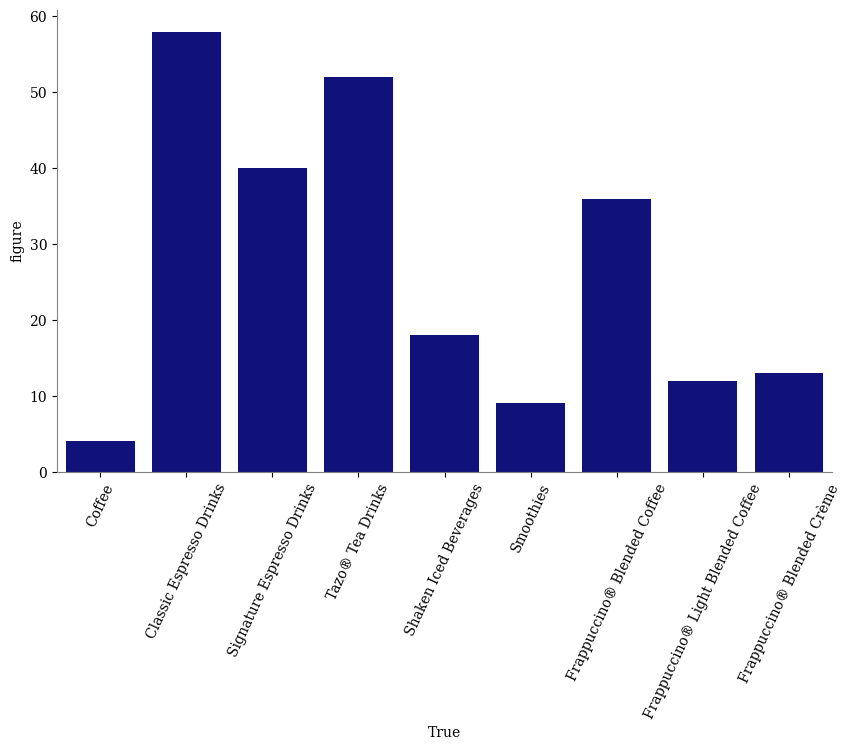

In [191]:
plt.style.use('default')
plt.figure(figsize=(10,6),edgecolor='1',dpi=100)
a=sns.countplot(x='Beverage_category',color='darkblue',data=new_drink)


xticks=plt.xticks(rotation=65,family='serif')
yticks=plt.yticks(family='serif')

plt.xlabel(new_drink['Beverage_category'].all(),font='serif')
plt.ylabel('figure',font='serif')

a.spines['bottom'].set_color('gray')
a.spines['left'].set_color('gray')
sns.despine()

 We are able to observe that 'Classic Espresso Drinks' has most number of items, following 'Tazo Tea Drinks' and 'Signature Espresso Drinks'.

In [192]:
new_drink.Beverage.unique()

array(['Brewed Coffee', 'Caffè Latte',
       'Caffè Mocha (Without Whipped Cream)',
       'Vanilla Latte (Or Other Flavoured Latte)', 'Caffè Americano',
       'Cappuccino', 'Espresso', 'Skinny Latte (Any Flavour)',
       'Caramel Macchiato',
       'White Chocolate Mocha (Without Whipped Cream)',
       'Hot Chocolate (Without Whipped Cream)',
       'Caramel Apple Spice (Without Whipped Cream)', 'Tazo® Tea',
       'Tazo® Chai Tea Latte', 'Tazo® Green Tea Latte',
       'Tazo® Full-Leaf Tea Latte',
       'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)',
       'Iced Brewed Coffee (With Classic Syrup)',
       'Iced Brewed Coffee (With Milk & Classic Syrup)',
       'Shaken Iced Tazo® Tea (With Classic Syrup)',
       'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)',
       'Banana Chocolate Smoothie', 'Orange Mango Banana Smoothie',
       'Strawberry Banana Smoothie', 'Coffee',
       'Mocha (Without Whipped Cream)', 'Caramel (Without Whipped Cream)',
       'Java Chip (Wi

Text(0.5, 1.05, 'Calories vs sugars')

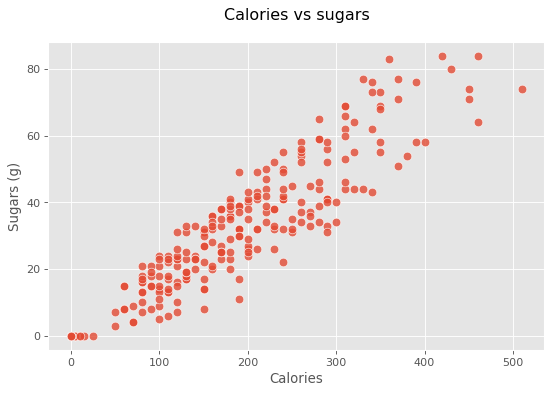

In [198]:
plt.style.use('ggplot')
plt.figure(figsize=(8,5),dpi=80)
sns.scatterplot(x='Calories',y='Sugars (g)',data=new_drink,alpha=0.8,s=60)
plt.title('Calories vs sugars',x=0.5,y=1.05)

In [200]:
new_nutrients= new_drink.drop(['Trans Fat (g)','Saturated Fat (g)','Sodium (mg)','Total Carbohydrates (g)',
                            'Cholesterol (mg)','Dietary Fibre (g)','Vitamin A (% DV)','Vitamin C (% DV)','Calcium (% DV)','Iron (% DV)'],axis=1)
new_nutrients.head()

Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

  Total Fat (g)  Sugars (g)  Protein (g)  Caffeine (mg)  
0           0.1           0          0.3            175  
1           0.1           0          0.5            260  
2           0.1           0          1.0            330  
3           0.1           0          1.0            410  
4           0.1           9          6.0             75

In [201]:
Hot_drink = new_nutrients.drop(new_nutrients.index[154:]) # index starts from 0, so 154 is actually number 155 so 155 ~ at the end.
Hot_drink.head()

Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

  Total Fat (g)  Sugars (g)  Protein (g)  Caffeine (mg)  
0           0.1           0          0.3            175  
1           0.1           0          0.5            260  
2           0.1           0          1.0            330  
3           0.1           0          1.0            410  
4           0.1           9          6.0             75

In [202]:
Hot_drink.iloc[-1] #check if it is the last Hot_drink

Beverage_category                                   Tazo® Tea Drinks
Beverage             Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)
Beverage_prep                                                Soymilk
Calories                                                         210
Total Fat (g)                                                      4
Sugars (g)                                                        32
Protein (g)                                                      7.0
Caffeine (mg)                                                      0
Name: 153, dtype: object

In [203]:
Cold_drink = new_nutrients.drop(new_nutrients.index[0:156]) # 0~155
Cold_drink.head()

Beverage_category                                        Beverage  \
156  Shaken Iced Beverages         Iced Brewed Coffee (With Classic Syrup)   
157  Shaken Iced Beverages  Iced Brewed Coffee (With Milk & Classic Syrup)   
158  Shaken Iced Beverages  Iced Brewed Coffee (With Milk & Classic Syrup)   
159  Shaken Iced Beverages  Iced Brewed Coffee (With Milk & Classic Syrup)   
160  Shaken Iced Beverages  Iced Brewed Coffee (With Milk & Classic Syrup)   

          Beverage_prep  Calories Total Fat (g)  Sugars (g)  Protein (g)  \
156               Venti       130           0.1          31          0.4   
157    Tall Nonfat Milk        80           0.1          18          2.0   
158             2% Milk        90             1          18          2.0   
159             Soymilk        80             1          17          2.0   
160  Grande Nonfat Milk       110           0.1          24          2.0   

     Caffeine (mg)  
156            235  
157             90  
158            125  
159             90  
160             90

In [212]:
print(Cold_drink)

              Beverage_category  \
156       Shaken Iced Beverages   
157       Shaken Iced Beverages   
158       Shaken Iced Beverages   
159       Shaken Iced Beverages   
160       Shaken Iced Beverages   
..                          ...   
237  Frappuccino® Blended Crème   
238  Frappuccino® Blended Crème   
239  Frappuccino® Blended Crème   
240  Frappuccino® Blended Crème   
241  Frappuccino® Blended Crème   

                                           Beverage       Beverage_prep  \
156         Iced Brewed Coffee (With Classic Syrup)               Venti   
157  Iced Brewed Coffee (With Milk & Classic Syrup)    Tall Nonfat Milk   
158  Iced Brewed Coffee (With Milk & Classic Syrup)             2% Milk   
159  Iced Brewed Coffee (With Milk & Classic Syrup)             Soymilk   
160  Iced Brewed Coffee (With Milk & Classic Syrup)  Grande Nonfat Milk   
..                                              ...                 ...   
237    Strawberries & Crème (Without Whipped Cream)   

In [216]:
high_calorie_cold_drink = Cold_drink.loc[Cold_drink['Calories'].idxmax()]


print("Max Calorie Cold Drink:",high_calorie_cold_drink)


Max Calorie Cold Drink: Beverage_category          Frappuccino® Blended Coffee
Beverage             Java Chip (Without Whipped Cream)
Beverage_prep                               Whole Milk
Calories                                           460
Total Fat (g)                                       10
Sugars (g)                                          84
Protein (g)                                        7.0
Caffeine (mg)                                      145
Name: 215, dtype: object


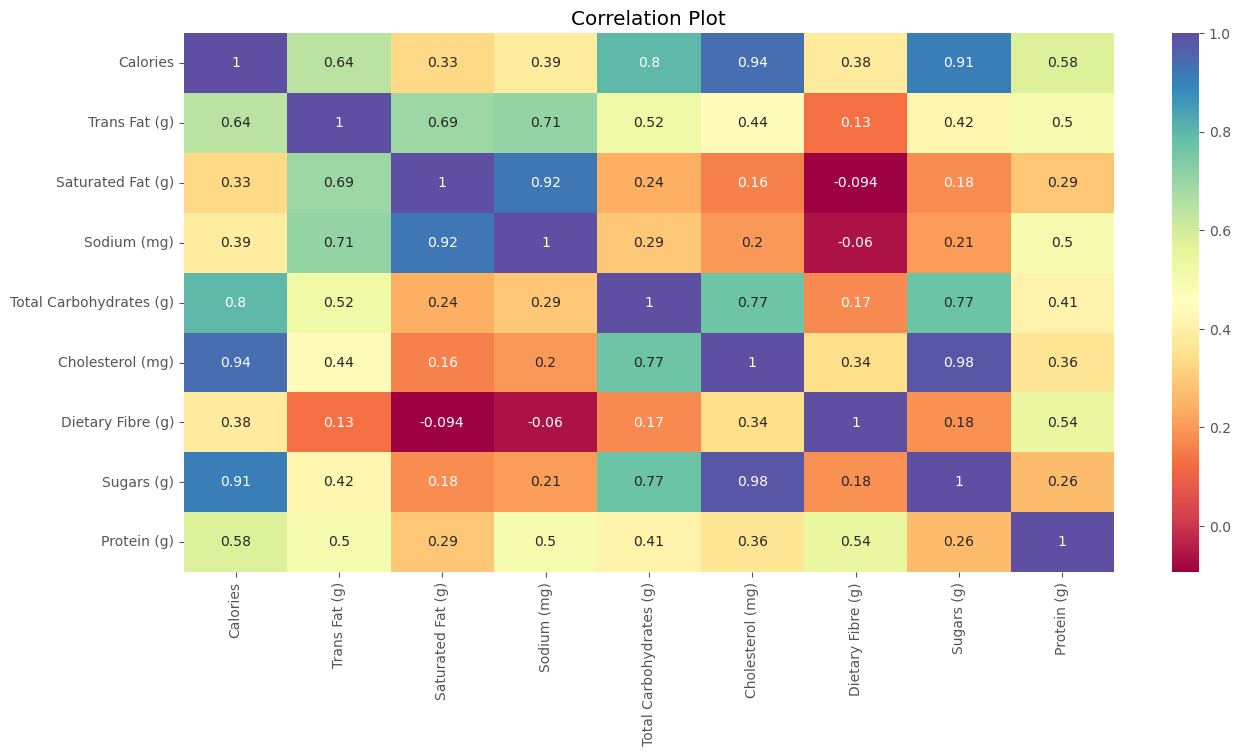

In [240]:
numeric_columns = nutrition_drinks_extended.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15, 7))
corrplot = sns.heatmap(numeric_columns.corr(), annot=True, cmap='Spectral').set_title("Correlation Plot")
plt.show()

In [1]:
numeric_columns = nutrition_drinks_extended.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 7))
corrplot = sns.heatmap(numeric_columns.corr(), vmin=-1, vmax=1, annot=True, cmap='viridis').set_title("Correlation Plot of nutrition_drinks menu")
plt.show()

NameError: name 'nutrition_drinks_extended' is not defined

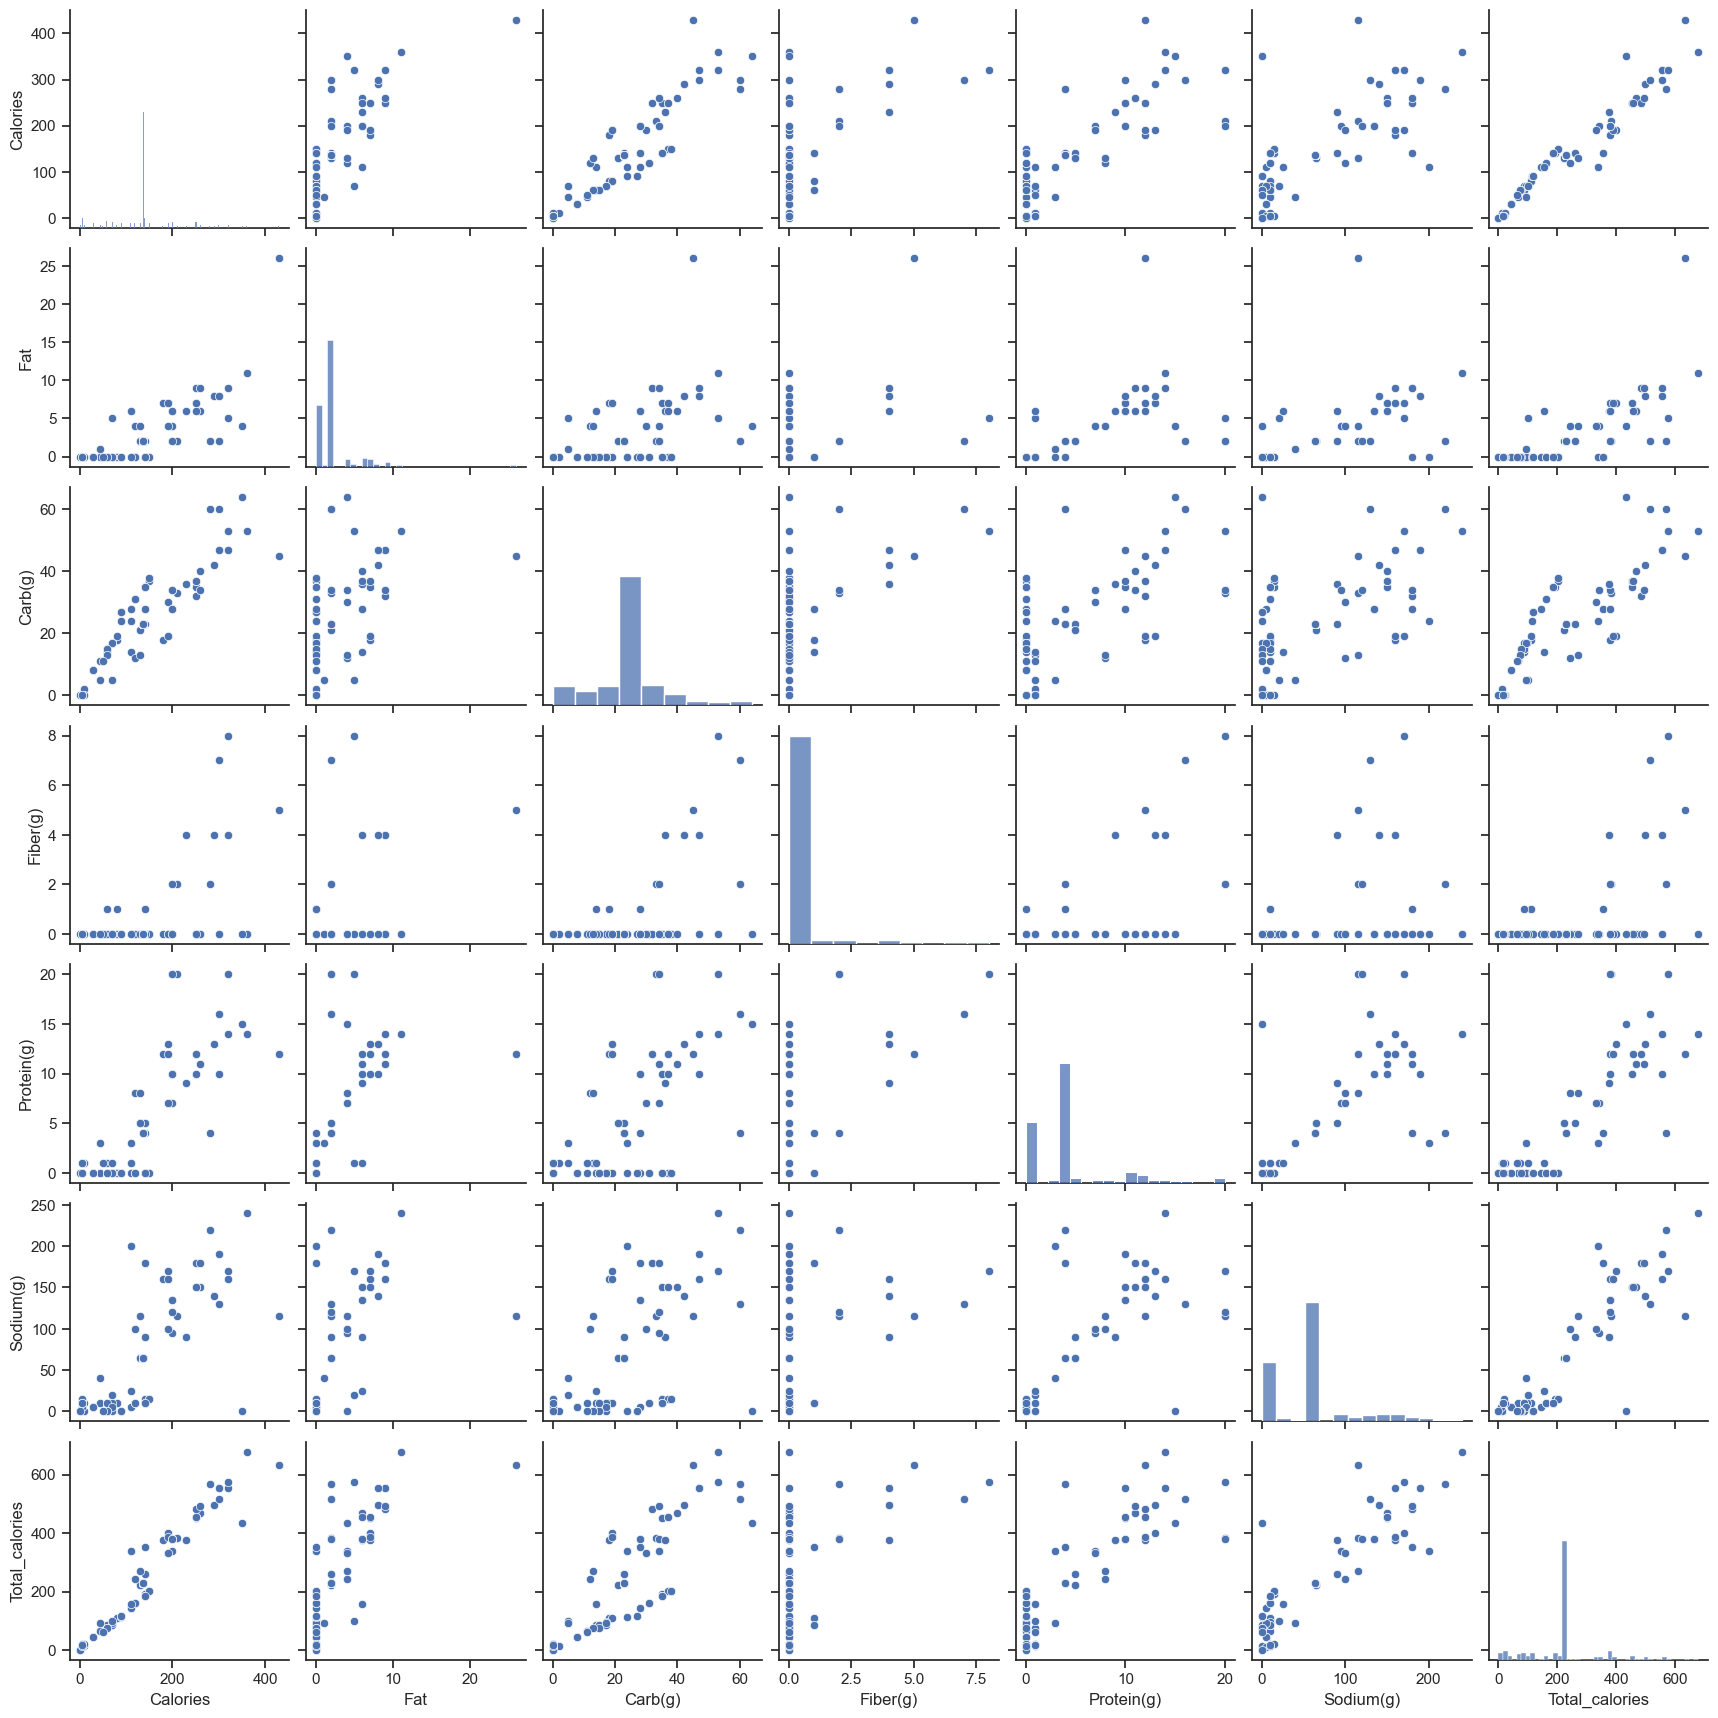

In [269]:
sns.set_theme(style='ticks')
sns.pairplot(data=nutrition_drinks)
plt.show()